## Review v. 3 <a class="tocSkip">

Your corrections look great, you've improved your work significantly! I'm glad to say that your project has been accepted. Keep at it. You're improving every day! 

In [1]:
### pip install seaborn -U to run alone, to upgrade seaborn library to its last version. Kernel restart needed.

In [2]:
pip install seaborn -U

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


I work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from the open sources. I need to identify patterns that determine whether a game succeeds or not and to spot potential big winners and plan advertising campaigns.

The main goal is to plan a campain for the year 2017.

# Step 1. Open the data file and study the general information

In [3]:
### Opening the file and starting studying general information of the dataset
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from collections import Counter
from scipy import stats as st

games = pd.read_csv('/datasets/games.csv')

print('Displaying the table of content:')
print('')
display(games)

Displaying the table of content:



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
games.info()

print('')
print('The presented dataset has', games.shape[0],'rows and', games.shape[1],'columns.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

The presented dataset has 16715 rows and 11 columns.


In [5]:
print('The types for columns are:')
print('')
print(games.dtypes)
print('')
print('I Expected Year_of_release, Critic_Score and User_Score as integer.')

The types for columns are:

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

I Expected Year_of_release, Critic_Score and User_Score as integer.


In [6]:
print('Printing out the value counts for Name column:')
print('')
print(games['Name'].value_counts(dropna=False))
print('')
print('The number of None values is:', games['Name'].isna().sum())
print('')
print('The number of unique names in the column is:', games['Name'].nunique())

Printing out the value counts for Name column:

Need for Speed: Most Wanted      12
Madden NFL 07                     9
FIFA 14                           9
LEGO Marvel Super Heroes          9
Ratatouille                       9
                                 ..
Chocobo's Dungeon 2               1
Pole Position                     1
Dai-2-Ji Super Robot Taisen α     1
Vantage Master Portable           1
Tekken 3D: Prime Edition          1
Name: Name, Length: 11560, dtype: int64

The number of None values is: 2

The number of unique names in the column is: 11559


In [7]:
print('Printing out the value counts for Platform column:')
print('')
print(games['Platform'].value_counts(dropna=False))
print('')
print('The number of None values is:', games['Platform'].isna().sum())
print('')
print('The number of unique platforms in the column is:', games['Platform'].nunique())

Printing out the value counts for Platform column:

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

The number of None values is: 0

The number of unique platforms in the column is: 31


In [8]:
print('Printing out the value counts for Year_of_Release column:')
print('')
print(games['Year_of_Release'].value_counts(dropna=False))
print('')
print('The number of None values is:', games['Year_of_Release'].isna().sum())
print('')
print('The number of unique year of release in the column is:', games['Year_of_Release'].nunique())

Printing out the value counts for Year_of_Release column:

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

The number of None values is: 269

The number of unique year of release in the column is: 37


In [9]:
print('Printing out the value counts for Genre column:')
print('')
print(games['Genre'].value_counts(dropna=False))
print('')
print('The number of None values is:', games['Genre'].isna().sum())
print('')
print('The number of unique genres in the column is:', games['Genre'].nunique())

Printing out the value counts for Genre column:

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
NaN                2
Name: Genre, dtype: int64

The number of None values is: 2

The number of unique genres in the column is: 12


In [10]:
print('Printing out the value counts for NA_sales (America) column:')
print('')
print(games['NA_sales'].value_counts(dropna=False))
print('')
print('The number of None values is:', games['NA_sales'].isna().sum())

Printing out the value counts for NA_sales (America) column:

0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.12       1
8.41       1
1.97       1
3.70       1
3.43       1
Name: NA_sales, Length: 402, dtype: int64

The number of None values is: 0


In [11]:
print('Printing out the value counts for EU_sales (Europa) column:')
print('')
print(games['EU_sales'].value_counts(dropna=False))
print('')
print('The number of None values is:', games['EU_sales'].isna().sum())

Printing out the value counts for EU_sales (Europa) column:

0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: EU_sales, Length: 307, dtype: int64

The number of None values is: 0


In [12]:
print('Printing out the value counts for JP_sales (Japan) column:')
print('')
print(games['JP_sales'].value_counts(dropna=False))
print('')
print('The number of None values is:', games['JP_sales'].isna().sum())

Printing out the value counts for JP_sales (Japan) column:

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: JP_sales, Length: 244, dtype: int64

The number of None values is: 0


In [13]:
print('Printing out the value counts for Other_sales column:')
print('')
print(games['Other_sales'].value_counts(dropna=False))
print('')
print('The number of None values is:', games['Other_sales'].isna().sum())

Printing out the value counts for Other_sales column:

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: Other_sales, Length: 155, dtype: int64

The number of None values is: 0


In [14]:
print('Printing out the value counts for Critic_Score () column:')
print('')
print(games['Critic_Score'].value_counts(dropna=False))
print('')
print('The number of None values is:', games['Critic_Score'].isna().sum())

Printing out the value counts for Critic_Score () column:

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
29.0       3
21.0       1
22.0       1
13.0       1
17.0       1
Name: Critic_Score, Length: 83, dtype: int64

The number of None values is: 8578


In [15]:
print('Printing out the value counts for User_Score column:')
print('')
print(games['User_Score'].value_counts(dropna=False))
print('')
print('The number of None values is:', games['User_Score'].isna().sum())

Printing out the value counts for User_Score column:

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
9.6       2
1.9       2
2.3       2
0         1
9.7       1
Name: User_Score, Length: 97, dtype: int64

The number of None values is: 6701


In [16]:
print('Printing out the value counts for Rating column:')
print('')
print(games['Rating'].value_counts(dropna=False))
print('')
print('The number of None values is:', games['Rating'].isna().sum())

Printing out the value counts for Rating column:

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

The number of None values is: 6766


In [17]:
print('The number of duplicates in the dataframe is:', games.duplicated().sum())

The number of duplicates in the dataframe is: 0


I Analyzed the dataset for the online store Ice, the presented dataset has 16715 rows and 11 columns.

Columns description:
—Name 
—Platform
—Year_of_Release
—Genre
—NA_sales (North American sales in USD million)
—EU_sales (sales in Europe in USD million)
—JP_sales (sales in Japan in USD million)
—Other_sales (sales in other countries in USD million)
—Critic_Score (maximum of 100)
—User_Score (maximum of 10)
—Rating (ESRB)


The types for columns are:

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object

The number of unique names is: 11559
The number of unique platforms is: 31
The number of unique year of release is: 37
The number of unique genres in the column is: 12

# Step 2. Prepare the data

In [18]:
#Renaming columns.
games.columns = (['name','platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales','critic_score', 'user_score','rating'])

In [19]:
#Working on 'name' column missing values.

print(games.name.isna().sum())

games.name = games.name.fillna("Unknow")

display(games.loc[games.name == "Unknow"])
print('Those are the only two games with an Unknow name.')
print('')
print('Through researches I was able to indentify the first with "Mortal Kombat II".')
print('')
games.iloc[659, games.columns.get_loc('name')] = "Mortal Kombat II"
display(games.iloc[659])
print('I will remove the second record, since it is almost empty.')
#games = games.drop(labels=14244, axis='index')

2


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknow,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknow,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Those are the only two games with an Unknow name.

Through researches I was able to indentify the first with "Mortal Kombat II".



name               Mortal Kombat II
platform                        GEN
year_of_release              1993.0
genre                           NaN
na_sales                       1.78
eu_sales                       0.53
jp_sales                        0.0
other_sales                    0.08
critic_score                    NaN
user_score                      NaN
rating                          NaN
Name: 659, dtype: object

I will remove the second record, since it is almost empty.


In [20]:
#Working on year_of_release columnn missing values.
games.year_of_release = games.year_of_release.fillna(0)
games['year_of_release'] = np.where((games['year_of_release'] == 0), games.groupby('name')['year_of_release'].transform('max'), games['year_of_release'])

In [21]:
display(games.loc[games['year_of_release'] == 0])
print('')
print('After transforming the year of release for cross platform games, we have still 146 empty rows.')
print('In order to fill those missing value, I am gonna do it manually, through researching on the internet the release date.')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,0.0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,0.0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,0.0,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,0.0,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,0.0,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,0.0,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,0.0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,0.0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN



After transforming the year of release for cross platform games, we have still 146 empty rows.
In order to fill those missing value, I am gonna do it manually, through researching on the internet the release date.


In [22]:
#I know this was quite a lot of work. But I didn't found other solutions about and I didn't wanted to lose the 146 rows.
#even tried to replace them with a dictionary but that was unsuccessful!
games.iloc[475, games.columns.get_loc('year_of_release')] = 2005
games.iloc[627, games.columns.get_loc('year_of_release')] = 2009
games.iloc[657, games.columns.get_loc('year_of_release')] = 2001
games.iloc[805, games.columns.get_loc('year_of_release')] = 2009
games.iloc[1142, games.columns.get_loc('year_of_release')] = 2009
games.iloc[1301, games.columns.get_loc('year_of_release')] = 1998
games.iloc[1506, games.columns.get_loc('year_of_release')] = 1980
games.iloc[1585, games.columns.get_loc('year_of_release')] = 1977
games.iloc[1840, games.columns.get_loc('year_of_release')] = 2009
games.iloc[1984, games.columns.get_loc('year_of_release')] = 1999
games.iloc[2010, games.columns.get_loc('year_of_release')] = 1997
games.iloc[2106, games.columns.get_loc('year_of_release')] = 1977
games.iloc[2108, games.columns.get_loc('year_of_release')] = 2002
games.iloc[2169, games.columns.get_loc('year_of_release')] = 2010
games.iloc[2773, games.columns.get_loc('year_of_release')] = 2004
games.iloc[2969, games.columns.get_loc('year_of_release')] = 2011
games.iloc[3187, games.columns.get_loc('year_of_release')] = 2006
games.iloc[3233, games.columns.get_loc('year_of_release')] = 2011
games.iloc[3289, games.columns.get_loc('year_of_release')] = 2008
games.iloc[3883, games.columns.get_loc('year_of_release')] = 1980
games.iloc[4132, games.columns.get_loc('year_of_release')] = 1982
games.iloc[4220, games.columns.get_loc('year_of_release')] = 1977
games.iloc[4294, games.columns.get_loc('year_of_release')] = 2004
games.iloc[4337, games.columns.get_loc('year_of_release')] = 1980
games.iloc[4373, games.columns.get_loc('year_of_release')] = 2008
games.iloc[4437, games.columns.get_loc('year_of_release')] = 1978
games.iloc[4445, games.columns.get_loc('year_of_release')] = 2008
games.iloc[4635, games.columns.get_loc('year_of_release')] = 2010
games.iloc[4648, games.columns.get_loc('year_of_release')] = 2011
games.iloc[4775, games.columns.get_loc('year_of_release')] = 2002
games.iloc[4848, games.columns.get_loc('year_of_release')] = 2001
games.iloc[4945, games.columns.get_loc('year_of_release')] = 2008
games.iloc[4959, games.columns.get_loc('year_of_release')] = 2008
games.iloc[5041, games.columns.get_loc('year_of_release')] = 1978
games.iloc[5194, games.columns.get_loc('year_of_release')] = 2002
games.iloc[5294, games.columns.get_loc('year_of_release')] = 2006
games.iloc[5642, games.columns.get_loc('year_of_release')] = 1980
games.iloc[5655, games.columns.get_loc('year_of_release')] = 2004
games.iloc[5800, games.columns.get_loc('year_of_release')] = 1979
games.iloc[5857, games.columns.get_loc('year_of_release')] = 2000
games.iloc[6101, games.columns.get_loc('year_of_release')] = 2002
games.iloc[6133, games.columns.get_loc('year_of_release')] = 2005
games.iloc[6255, games.columns.get_loc('year_of_release')] = 2004 
games.iloc[6266, games.columns.get_loc('year_of_release')] = 1977
games.iloc[6293, games.columns.get_loc('year_of_release')] = 2008
games.iloc[6299, games.columns.get_loc('year_of_release')] = 1978
games.iloc[6954, games.columns.get_loc('year_of_release')] = 2002
games.iloc[7008, games.columns.get_loc('year_of_release')] = 2002
games.iloc[7108, games.columns.get_loc('year_of_release')] = 2010
games.iloc[7332, games.columns.get_loc('year_of_release')] = 2004
games.iloc[7353, games.columns.get_loc('year_of_release')] = 1989
games.iloc[7354, games.columns.get_loc('year_of_release')] = 1978
games.iloc[7387, games.columns.get_loc('year_of_release')] = 2011
games.iloc[7391, games.columns.get_loc('year_of_release')] = 2011
games.iloc[7406, games.columns.get_loc('year_of_release')] = 2011
games.iloc[7605, games.columns.get_loc('year_of_release')] = 1997
games.iloc[7735, games.columns.get_loc('year_of_release')] = 2011
games.iloc[7848, games.columns.get_loc('year_of_release')] = 2011
games.iloc[8067, games.columns.get_loc('year_of_release')] = 2009
games.iloc[8150, games.columns.get_loc('year_of_release')] = 2001
games.iloc[8151, games.columns.get_loc('year_of_release')] = 2011
games.iloc[8250, games.columns.get_loc('year_of_release')] = 2010
games.iloc[8260, games.columns.get_loc('year_of_release')] = 2009
games.iloc[8364, games.columns.get_loc('year_of_release')] = 2005
games.iloc[8547, games.columns.get_loc('year_of_release')] = 2001
games.iloc[8632, games.columns.get_loc('year_of_release')] = 2009
games.iloc[8680, games.columns.get_loc('year_of_release')] = 2011
games.iloc[8740, games.columns.get_loc('year_of_release')] = 1978
games.iloc[8884, games.columns.get_loc('year_of_release')] = 2002
games.iloc[8918, games.columns.get_loc('year_of_release')] = 2004
games.iloc[9119, games.columns.get_loc('year_of_release')] = 2009
games.iloc[9293, games.columns.get_loc('year_of_release')] = 2006
games.iloc[9516, games.columns.get_loc('year_of_release')] = 2003
games.iloc[9664, games.columns.get_loc('year_of_release')] = 2009
games.iloc[9738, games.columns.get_loc('year_of_release')] = 2012
games.iloc[9761, games.columns.get_loc('year_of_release')] = 2006
games.iloc[9855, games.columns.get_loc('year_of_release')] = 2010
games.iloc[10258, games.columns.get_loc('year_of_release')] = 2003
games.iloc[10486, games.columns.get_loc('year_of_release')] = 2006
games.iloc[10612, games.columns.get_loc('year_of_release')] = 2009
games.iloc[10764, games.columns.get_loc('year_of_release')] = 2008 
games.iloc[10837, games.columns.get_loc('year_of_release')] = 2005
games.iloc[10993, games.columns.get_loc('year_of_release')] = 2010
games.iloc[11000, games.columns.get_loc('year_of_release')] = 2005
games.iloc[11092, games.columns.get_loc('year_of_release')] = 2000
games.iloc[11119, games.columns.get_loc('year_of_release')] = 1996
games.iloc[11338, games.columns.get_loc('year_of_release')] = 2009
games.iloc[11377, games.columns.get_loc('year_of_release')] = 2011
games.iloc[11433, games.columns.get_loc('year_of_release')] = 2008
games.iloc[11455, games.columns.get_loc('year_of_release')] = 2011
games.iloc[11790, games.columns.get_loc('year_of_release')] = 2009
games.iloc[11925, games.columns.get_loc('year_of_release')] = 2012
games.iloc[11943, games.columns.get_loc('year_of_release')] = 2011
games.iloc[11957, games.columns.get_loc('year_of_release')] = 2011
games.iloc[12003, games.columns.get_loc('year_of_release')] = 2008
games.iloc[12011, games.columns.get_loc('year_of_release')] = 2004
games.iloc[12046, games.columns.get_loc('year_of_release')] = 2018
games.iloc[12209, games.columns.get_loc('year_of_release')] = 2010
games.iloc[12221, games.columns.get_loc('year_of_release')] = 2012
games.iloc[12241, games.columns.get_loc('year_of_release')] = 2006
games.iloc[12524, games.columns.get_loc('year_of_release')] = 2006
games.iloc[12568, games.columns.get_loc('year_of_release')] = 2009 
games.iloc[12584, games.columns.get_loc('year_of_release')] = 2005
games.iloc[12718, games.columns.get_loc('year_of_release')] = 2010
games.iloc[12734, games.columns.get_loc('year_of_release')] = 2008
games.iloc[12784, games.columns.get_loc('year_of_release')] = 2006
games.iloc[12880, games.columns.get_loc('year_of_release')] = 2012
games.iloc[12959, games.columns.get_loc('year_of_release')] = 2007
games.iloc[12970, games.columns.get_loc('year_of_release')] = 2005
games.iloc[13195, games.columns.get_loc('year_of_release')] = 2011
games.iloc[13289, games.columns.get_loc('year_of_release')] = 2011
games.iloc[13672, games.columns.get_loc('year_of_release')] = 2016
games.iloc[13711, games.columns.get_loc('year_of_release')] = 1998
games.iloc[13929, games.columns.get_loc('year_of_release')] = 2006
games.iloc[14105, games.columns.get_loc('year_of_release')] = 2011
games.iloc[14126, games.columns.get_loc('year_of_release')] = 2006
games.iloc[14210, games.columns.get_loc('year_of_release')] = 2004
games.iloc[14252, games.columns.get_loc('year_of_release')] = 2007
games.iloc[14325, games.columns.get_loc('year_of_release')] = 2012
games.iloc[14350, games.columns.get_loc('year_of_release')] = 2007
games.iloc[14449, games.columns.get_loc('year_of_release')] = 2009
games.iloc[14546, games.columns.get_loc('year_of_release')] = 2005
games.iloc[14597, games.columns.get_loc('year_of_release')] = 2014
games.iloc[14769, games.columns.get_loc('year_of_release')] = 2003
games.iloc[14931, games.columns.get_loc('year_of_release')] = 2005
games.iloc[14950, games.columns.get_loc('year_of_release')] = 0 ##this game was never released for wii.
games.iloc[15006, games.columns.get_loc('year_of_release')] = 2003 
games.iloc[15022, games.columns.get_loc('year_of_release')] = 2011
games.iloc[15079, games.columns.get_loc('year_of_release')] = 2006
games.iloc[15081, games.columns.get_loc('year_of_release')] = 2011
games.iloc[15119, games.columns.get_loc('year_of_release')] = 2009
games.iloc[15267, games.columns.get_loc('year_of_release')] = 2009
games.iloc[15292, games.columns.get_loc('year_of_release')] = 2008
games.iloc[15557, games.columns.get_loc('year_of_release')] = 2009
games.iloc[15704, games.columns.get_loc('year_of_release')] = 2008
games.iloc[15754, games.columns.get_loc('year_of_release')] = 2004
games.iloc[15795, games.columns.get_loc('year_of_release')] = 2010
games.iloc[15998, games.columns.get_loc('year_of_release')] = 2007
games.iloc[16017, games.columns.get_loc('year_of_release')] = 2009
games.iloc[16079, games.columns.get_loc('year_of_release')] = 2006
games.iloc[16080, games.columns.get_loc('year_of_release')] = 2010
games.iloc[16277, games.columns.get_loc('year_of_release')] = 2015
games.iloc[16288, games.columns.get_loc('year_of_release')] = 2009
games.iloc[16348, games.columns.get_loc('year_of_release')] = 2011
games.iloc[16458, games.columns.get_loc('year_of_release')] = 2014
games.iloc[16522, games.columns.get_loc('year_of_release')] = 2004

In [23]:
display(games.loc[games['year_of_release'] == 0])
print('The only game remained was never released for Wii. Gonna delete the entire row.')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14950,Combat Wings: The Great Battles of WWII,Wii,0.0,Simulation,0.02,0.0,0.0,0.0,NaN,NaN,NaN


The only game remained was never released for Wii. Gonna delete the entire row.


In [24]:
games = games.drop(labels=14950, axis='index')
display(games.loc[games['year_of_release'] == 0])
print('Now the column year_of_release has:', games.year_of_release.isna().sum(),'NaN values')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Now the column year_of_release has: 0 NaN values


In [25]:
print('Eliminating values from the dataset with year_of_release > 2016.')
print(games.query('year_of_release > 2016'))

games = games.drop(labels=12046, axis='index')

Eliminating values from the dataset with year_of_release > 2016.
                          name platform  year_of_release    genre  na_sales  \
12046  Drake of the 99 Dragons       XB           2018.0  Shooter      0.05   

       eu_sales  jp_sales  other_sales  critic_score user_score rating  
12046      0.01       0.0          0.0          22.0        1.8      T  


In [26]:
#Changing year_of_release data type.
games.year_of_release = games.year_of_release.astype('int16')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int16  
 3   genre            16711 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(5), int16(1), object(5)
memory usage: 1.4+ MB


In [27]:
#Working on 'genre' column missing values.

print(games.name.isna().sum())

games.genre = games.genre.fillna("Unknow")

display(games.loc[games.genre == "Unknow"])
print('Those are the only two games with an Unknow genre.')
print('')
print('Through researches I was able to indentify the first with "Mortal Kombat II".')
print('Going to replace the genre with "Fighting"')
games.iloc[659, games.columns.get_loc('genre')] = "Fighting"
display(games.iloc[659])
print('I will remove the second!')
games = games.drop(labels=14244, axis='index')

0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Mortal Kombat II,GEN,1993,Unknow,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknow,GEN,1993,Unknow,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Those are the only two games with an Unknow genre.

Through researches I was able to indentify the first with "Mortal Kombat II".
Going to replace the genre with "Fighting"


name               Mortal Kombat II
platform                        GEN
year_of_release                1993
genre                      Fighting
na_sales                       1.78
eu_sales                       0.53
jp_sales                        0.0
other_sales                    0.08
critic_score                    NaN
user_score                      NaN
rating                          NaN
Name: 659, dtype: object

I will remove the second!


In [28]:
#Working on critic_score column
games.critic_score = games.critic_score.fillna(-50)
games['critic_score'] = np.where((games['critic_score'] == -50), games.groupby('name')['critic_score'].transform('max'), games['critic_score'])

In [29]:
display(games.critic_score)

0        76.0
1       -50.0
2        82.0
3        80.0
4       -50.0
         ... 
16710   -50.0
16711   -50.0
16712   -50.0
16713   -50.0
16714   -50.0
Name: critic_score, Length: 16712, dtype: float64

In [30]:
display(games.loc[games.critic_score == -50])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-50.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-50.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-50.0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-50.0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-50.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-50.0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-50.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-50.0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-50.0,NaN,NaN


In [31]:
games.critic_score = games.critic_score.replace(-50,"NA") 
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')
games.critic_score = games.critic_score.astype('float16')

In [32]:
print(games.critic_score.value_counts(dropna=False))

NaN     7615
70.0     289
75.0     280
71.0     278
80.0     271
        ... 
29.0       4
24.0       4
21.0       1
13.0       1
17.0       1
Name: critic_score, Length: 82, dtype: int64


In [33]:
#Working on user_score column.
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')


In [34]:
games.user_score = games.user_score.fillna(-50)
games['user_score'] = np.where((games['user_score'] == -50), games.groupby('name')['user_score'].transform('max'), games['user_score'])
games.user_score = games.user_score.replace(-50,"NA") 
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.user_score = games.user_score.astype('float16')

In [35]:
#Working on rating column.
games.rating = games.rating.fillna("1")
games['rating'] = np.where((games['rating'] == "1"), games.groupby('name')['rating'].transform('max'), games['rating'])

In [36]:
games['rating'] = games['rating'].replace("1", np.nan)

In [37]:
#Calculating total_sales.
games['total_sales'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales

In [38]:
games = games.reset_index()
games = games.drop(columns=['index'])
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.296875,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16709,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


I renamed the dataset columns to be lowercases.
FILLING MISSING VALUES.
For name column: 
- I replaced the only two games as None with Mortal Kombat II (Identified trough researches) and I removed the other since, pretty almost every value was NaN or 0. (empty record0
For year_of_release:
- I filled in all the year for the games out on more platform. 
- They were left 146 rows, since I wanted to don't lose any of my records I decided to look for them on the internet and I completed the column.
- Only one left game (Combat Wings: The Great Battles of WWII) that was never released on Wii, was removed.
- Trough a query I looked for all the games realeased after 2016, only one (Drake of the 99 Dragons, 2018) was removed.
For genre column:
- I replaced the only missing value with Fighting, because the game was identified as Mortal Kombat II for Genesis.
For critic_score:
- I assigned -50 to all NaN values then I filled in the -50 where the games were out on more platform with the same critic score. I replaced the -50 with "NA" and trough pd.to_numeric function changed them back to NaN. I checked that I was able to fill almost a 1000 records.
For user_score:
- Same as critic_score.
For rating:
- Same as critic_score. Only difference here, instead to use pd.to_numeric for strings, I just replaced them with replace function and np.nan

ADDING COLUMNS
For total_sales:
- Calculated the total_sales columns adding na, eu, pj and other sales.

CHANGING DATA TYPE 
For year_of_release:
- Changed type in int16.

NaN LEFT
- I decided to leave NaN values in critic_score, user_score, rating. Because I didn't wanted to drop the entire row because the numeric values about sales were all filled in (same for name and year of release). 

RESET INDEXES.
- I resetted the index of my df, obtaining a new df of 16712 rows in 12 columns.

# STEP 3 - Analyze the data

In [39]:
print(games.query('year_of_release == 0'))

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, total_sales]
Index: []


In [40]:
# How many games were released in different years?
print('Count of games grouped by year:')
games_per_year = (games.groupby('year_of_release')['name'].count())
print(games_per_year)

Count of games grouped by year:
year_of_release
1977       4
1978       5
1979       1
1980      13
1981      46
1982      37
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      18
1990      16
1991      41
1992      43
1993      61
1994     121
1995     219
1996     264
1997     291
1998     381
1999     340
2000     352
2001     488
2002     852
2003     789
2004     775
2005     956
2006    1032
2007    1206
2008    1452
2009    1450
2010    1281
2011    1173
2012     667
2013     547
2014     584
2015     607
2016     503
Name: name, dtype: int64


Plotting the graph showing the count of games sold per year:



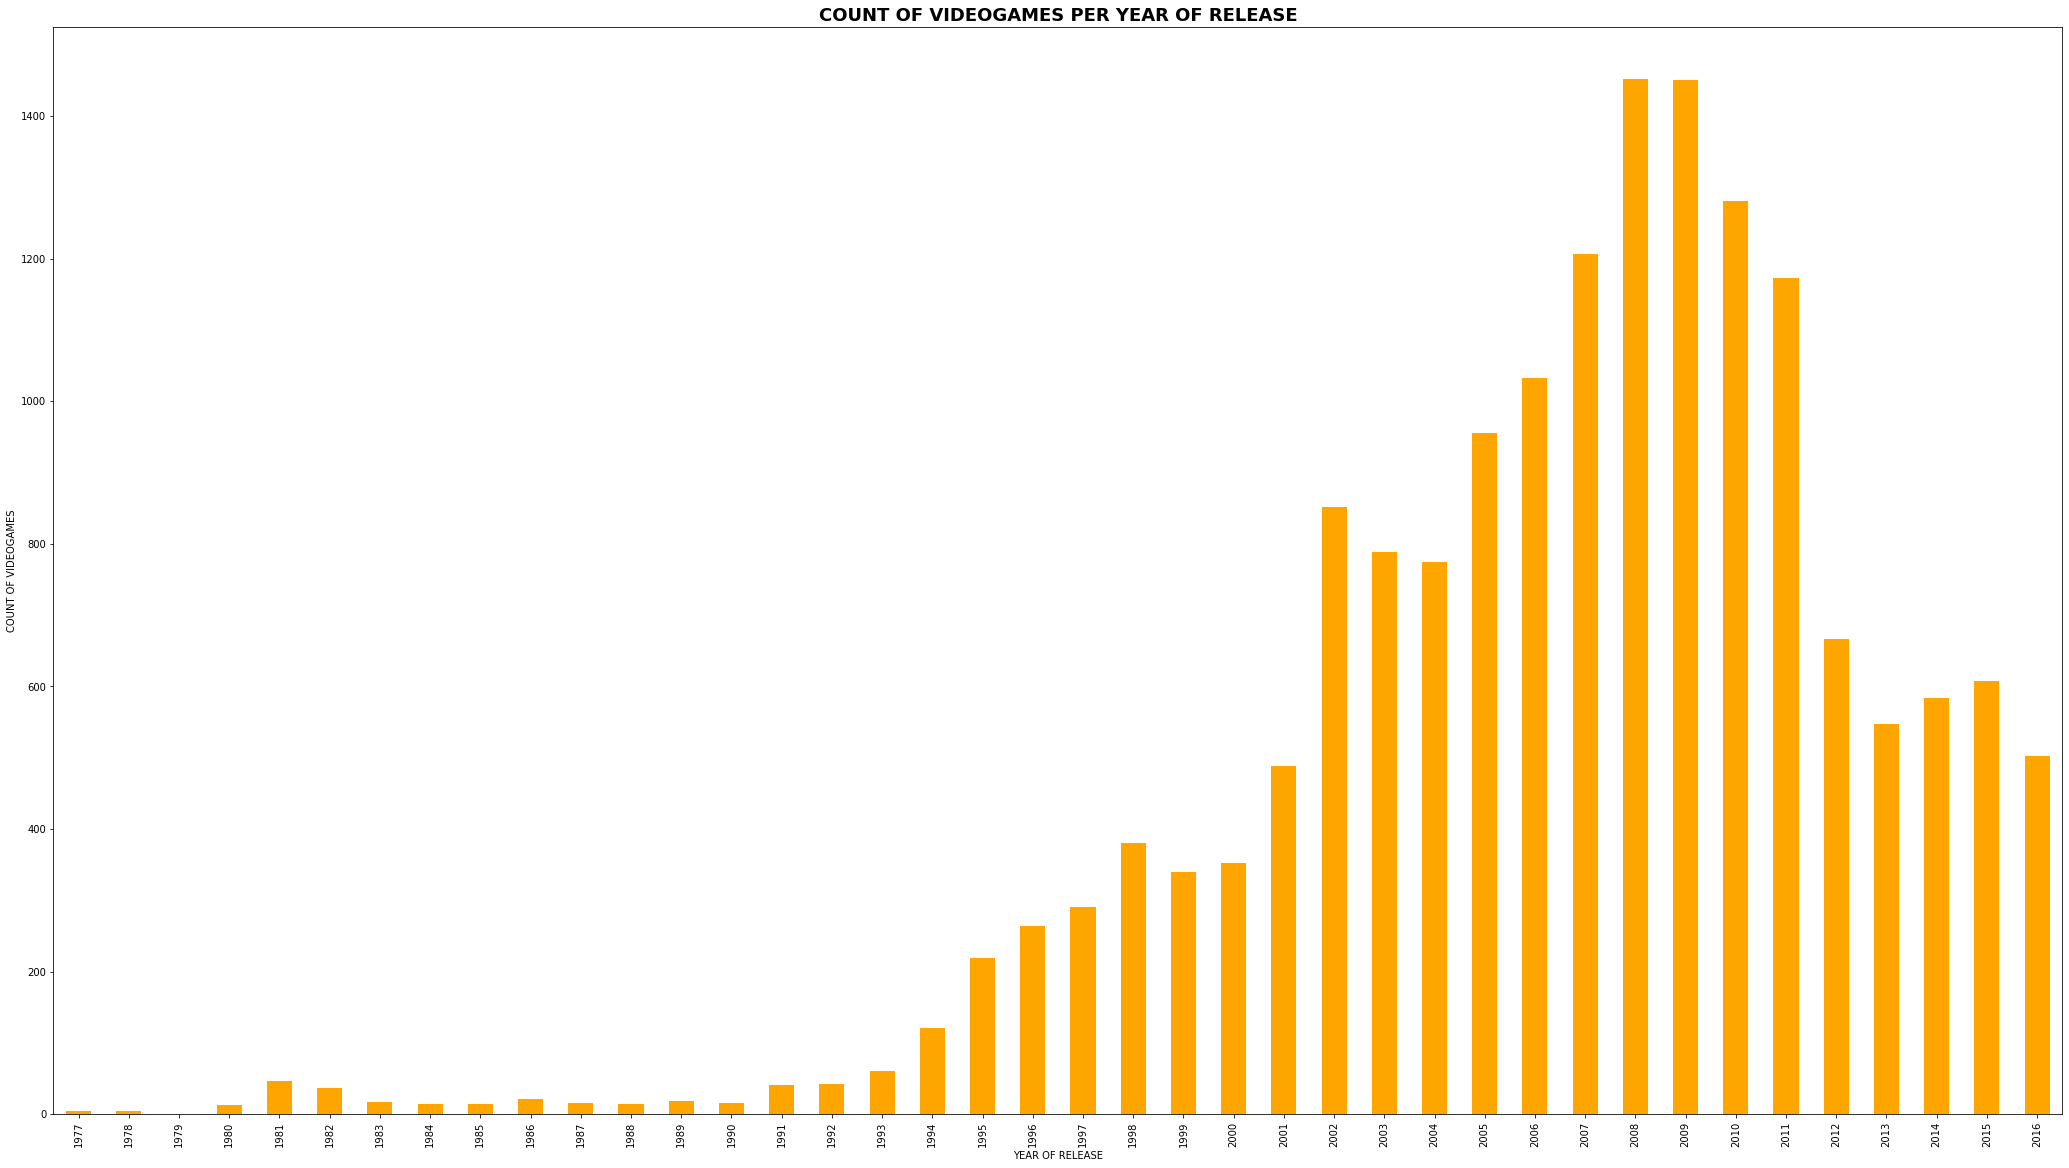

In [41]:
#Plotting the bar graph to show how many games were released in different years.
print('Plotting the graph showing the count of games sold per year:')
print('')
plt.figure(figsize = (36,20))
games_per_year.plot(kind='bar', color='orange')
plt.title('COUNT OF VIDEOGAMES PER YEAR OF RELEASE', size=18, weight='bold')
plt.xlabel('YEAR OF RELEASE')
plt.ylabel('COUNT OF VIDEOGAMES')
plt.show()

COUNT OF VIDEOGAMES PER YEAR OF RELEASE. ALL TIME. BAR GRAPH. 
- 2009/2010 historical maximum.
- Increase from 1977 to 1993.
- Boom period from 1994 to 2009
- After 2010 count of videogames started to decrease.

Dividing the graph in games out before 1994 and after 1994.
year_of_release
1977     4
1978     5
1979     1
1980    13
1981    46
1982    37
1983    17
1984    14
1985    14
1986    21
1987    16
1988    15
1989    18
1990    16
1991    41
1992    43
1993    61
Name: name, dtype: int64
year_of_release
1994     121
1995     219
1996     264
1997     291
1998     381
1999     340
2000     352
2001     488
2002     852
2003     789
2004     775
2005     956
2006    1032
2007    1206
2008    1452
2009    1450
2010    1281
2011    1173
2012     667
2013     547
2014     584
2015     607
2016     503
Name: name, dtype: int64


/home/jovyan/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


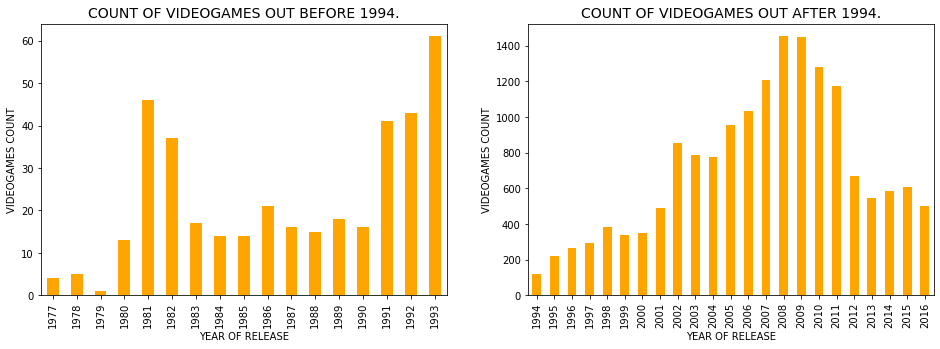

In [42]:
print('Dividing the graph in games out before 1994 and after 1994.')
games_per_year_before_2000 = (games.query('year_of_release < 1994').groupby('year_of_release')['name'].count())
games_per_year_after_2000 = (games.query('year_of_release >= 1994').groupby('year_of_release')['name'].count())


print(games_per_year_before_2000)
print(games_per_year_after_2000)

plt.figure(figsize=(16,5)) # specifying figure size
ax1 = plt.subplot(1,2,1)
games_per_year_before_2000.plot(kind='bar', color = 'orange', ax = ax1)
plt.title('COUNT OF VIDEOGAMES OUT BEFORE 1994.', size =14)
plt.xlabel('YEAR OF RELEASE')
plt.ylabel('VIDEOGAMES COUNT')
ax2 = plt.subplot(1,2,2)
games_per_year_after_2000.plot(kind='bar', color = 'orange', ax = ax2)
plt.title('COUNT OF VIDEOGAMES OUT AFTER 1994.', size =14)
plt.xlabel('YEAR OF RELEASE')
plt.ylabel('VIDEOGAMES COUNT')
plt.show()

COUNT OF VIDEOGAMES PER PLATFORMS. BEFORE AND AFTER HISTORICAL BOOM OF RELEASES. SUBPLOTS.
- SUBPLOT N.1 (GAMES RELEASED BEFORE 1994.)
- SUBPLOT N.2 (GAMES RELEASED AFTER 1994.)

# How many games were released in different years?

To answer this question, I plotted a bar graph were on x axis were figured years and on the y axis the count of videogames released.

I decided to divede further the graph in games out before 1994 (with a max count of 60), and games out after 1994 (with a min count of 150 and max on 1400 units). The pairplot is much more understandable.

Answer comment v.1: The three presented graphs are showing the count of videogames sold per year of release, as we can see in the first graph there is a big difference between the count of games till 1994 (with a max count of 60 values) and from 1995 pointing foward (min count 150 till 1450 of max value). For this reason I thought that the significant data comes after 1994.

The reason is easy understandable, Windows wasn't realease before 1985 but only in 1995 (Win '95) it began to be available and understandable from the most of the population. (Cause of it's Graphic User Interface much more user friendly as it was before). 

I personally played some videogames on really old machines, and there you just had a command line (Prompt MsDOS) where run programs from floppy disks (A:). Was a little tricky for an average user, that's why with an easy graphic interface became easier to use systems and obviously to play videogames as well.

Another possible reason is the avvent of CD-ROMS. Compact Disks wasn't release before 1982 but began to be popular  only after 1988.

Plotting the graph showing the count of games sold per year:



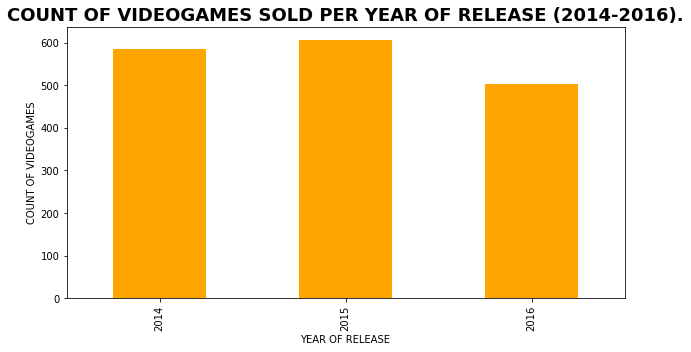

In [43]:
#Plotting the bar graph to show how many games were released after 2014:

games_after_2014 =games.query('year_of_release >=2014').groupby('year_of_release')['name'].count()
print('Plotting the graph showing the count of games sold per year:')
print('')
plt.figure(figsize = (10,5))
games_after_2014.plot(kind='bar', color='orange')
plt.title('COUNT OF VIDEOGAMES SOLD PER YEAR OF RELEASE (2014-2016).', size=18, weight='bold')
plt.xlabel('YEAR OF RELEASE')
plt.ylabel('COUNT OF VIDEOGAMES')
plt.show()

COUNT OF VIDEOGAMES SOLD PER YEAR OF RELEASE (2014-2016).
- 2014 and 2015 saw the born of 600 videogames.
- In 2016 we see a decrease to 500 units.

Plotting the graph showing the count of games sold per year:



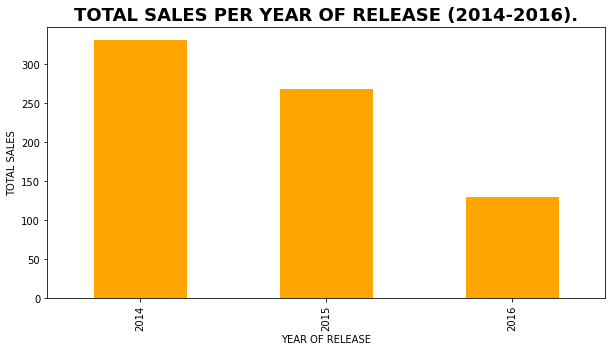

In [44]:
#Plotting the bar graph to show how many games were released after 2014:

games_after_2014 =games.query('year_of_release >=2014').groupby('year_of_release')['total_sales'].sum()
print('Plotting the graph showing the count of games sold per year:')
print('')
plt.figure(figsize = (10,5))
games_after_2014.plot(kind='bar', color='orange')
plt.title('TOTAL SALES PER YEAR OF RELEASE (2014-2016).', size=18, weight='bold')
plt.xlabel('YEAR OF RELEASE')
plt.ylabel('TOTAL SALES')
plt.show()

TOTAL SALES PER YEAR OF RELEASE (2014-2016).
- In 2014 and 2015 we have 300 and 250 USD Million made by the industry.
- In 2016 the sommatory is reduced to 150 USD Million dollars.
The decrease in count of videogames was confirmed by the sales.

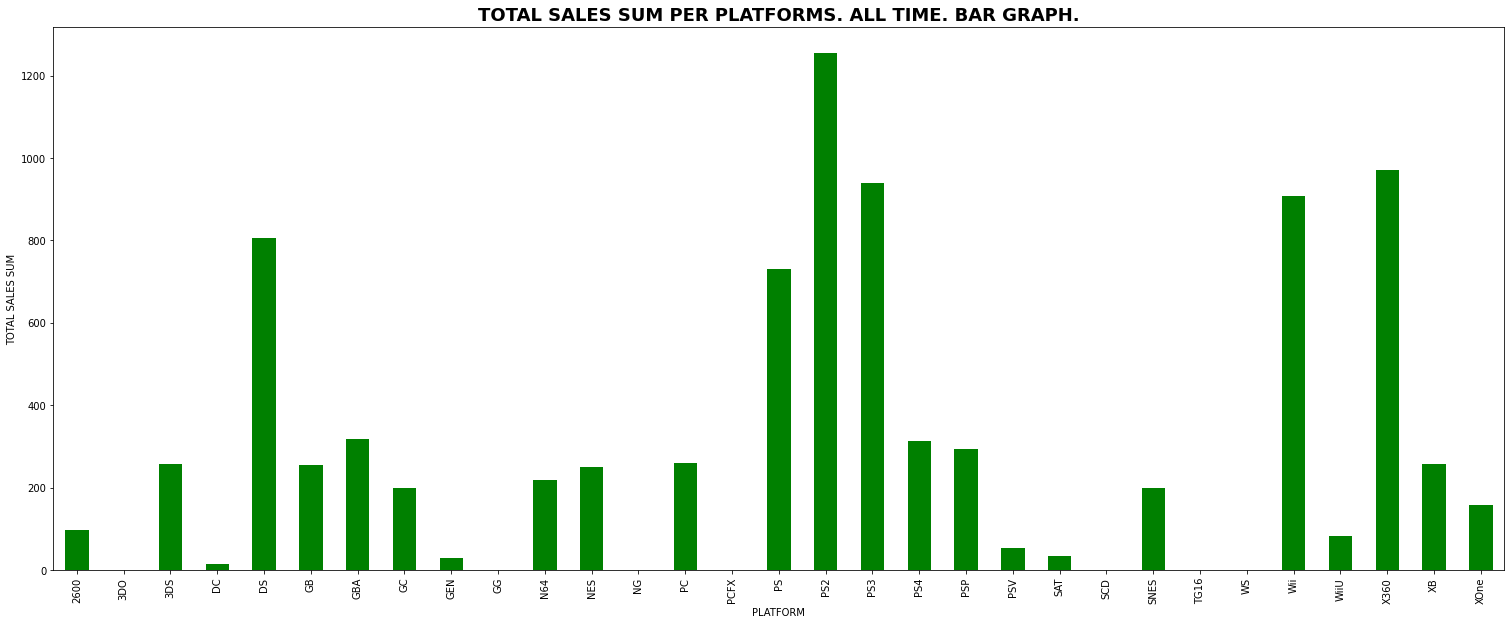

In [45]:
#Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. 

sales_per_platform = (games.groupby('platform')['total_sales'].sum())
plt.figure(figsize=(26,10)) # specifying figure size
sales_per_platform.plot(kind='bar', color = 'green')
plt.title('TOTAL SALES SUM PER PLATFORMS. ALL TIME. BAR GRAPH.', size =18, weight='bold')
plt.xlabel('PLATFORM')
plt.ylabel('TOTAL SALES SUM')
plt.show()

TOTAL SALES SUM PER PLATFORMS. ALL TIME. BAR GRAPH.
- Showing the count of videogames out per platforms.
- PS2, Xbox 360, Wii, PS3 and DS leads the all time chart.
- 3DO, GG, NG, PCFX, SDC, TG16 and WS where the much "unlucky" consoles in the history.

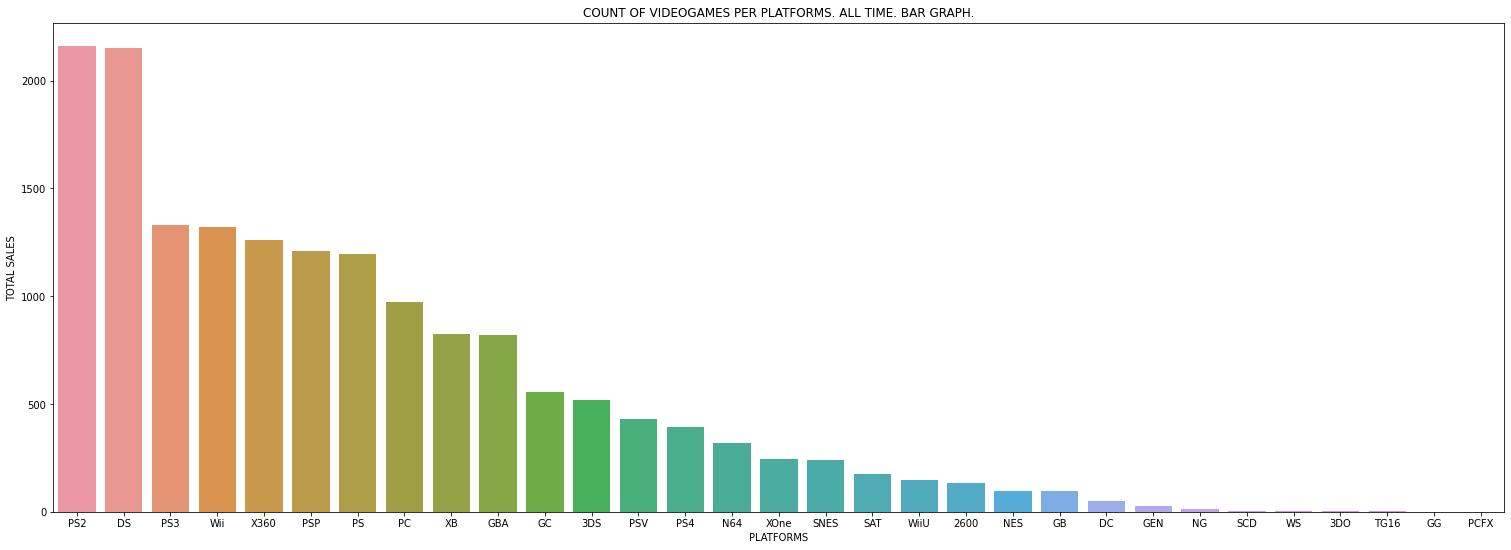

In [46]:
#Looking at videogames count per platforms. All time.

platforms = Counter(games['platform'].tolist()).most_common(32)
platform_name = [name[0] for name in platforms]
platform_counts = [name[1] for name in platforms]

fig,ax = plt.subplots(figsize=(26,9))
sns.barplot(x=platform_name,y=platform_counts,ax=ax)
plt.title('COUNT OF VIDEOGAMES PER PLATFORMS. ALL TIME. BAR GRAPH.')
plt.xlabel('PLATFORMS')
plt.ylabel('VIDEOGAMES COUNT')
plt.show()

COUNT OF VIDEOGAMES PER PLATFORMS. ALL TIME. BAR GRAPH. 
- Showing the count of videogames out per platform.
- PS and DS leads this all time chart.
- PS3, Wii, X360, PSP, PS and PC follow.
- As before, NG, SCD, WS, 3DO, TG16, GG, PCFX where the much "unlucky" consoles in the history.

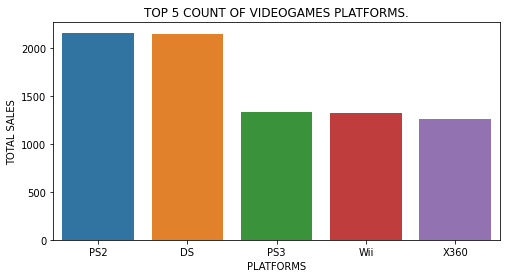

In [47]:
platforms_top_5 = Counter(games['platform'].tolist()).most_common(5)
platform_name = [name[0] for name in platforms_top_5]
platform_counts = [name[1] for name in platforms_top_5]

fig,ax = plt.subplots(figsize=(8,4))
sns.barplot(x=platform_name,y=platform_counts,ax=ax)
plt.title('TOP 5 COUNT OF VIDEOGAMES PLATFORMS.')
plt.xlabel('PLATFORMS')
plt.ylabel('TOTAL SALES')
plt.show()

TOP 5 COUNT OF VIDEOGAMES PLATFORMS. 
- Total sales per platform TOP 5.
- PS2 (2.000 videogames released)  DS(2.000), PS3(1200), Wii(1200), XBOX 360(1.100).

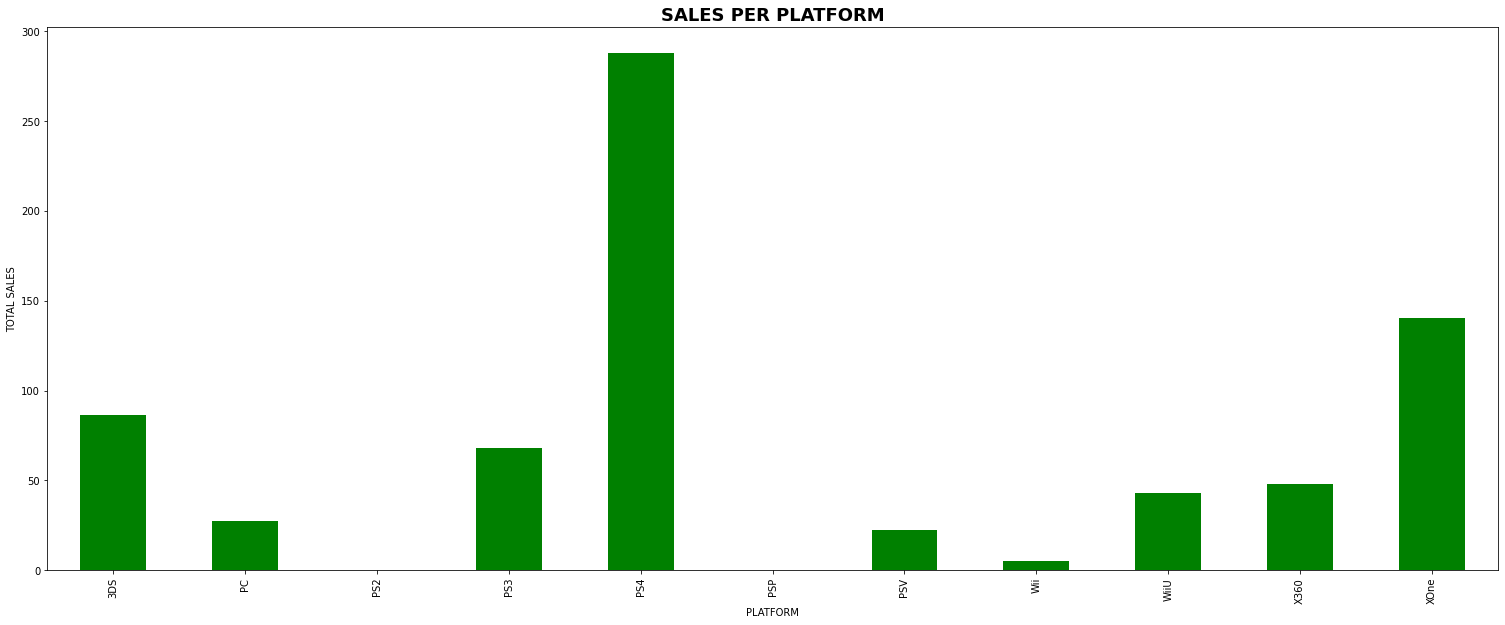

In [48]:
sales_per_platform = games.query('year_of_release >=2014').groupby('platform')['total_sales'].sum()
plt.figure(figsize=(26,10)) # specifying figure size
sales_per_platform.plot(kind='bar', color = 'purple')
plt.title('SALES PER PLATFORM', size =18, weight='bold')
plt.xlabel('PLATFORM')
plt.ylabel('TOTAL SALES')
plt.show()

TOTAL SALES PER PLATFORMS. 2014/2016. BAR GRAPH.
- PS4 and XOne leads 2014/2016 market.
- 3DS, PS3, 3DS third/fourth/fifth position.
- Nowdays games for PS2, PSP, Wii are not sold anymore even if they used to be real famous platforms.

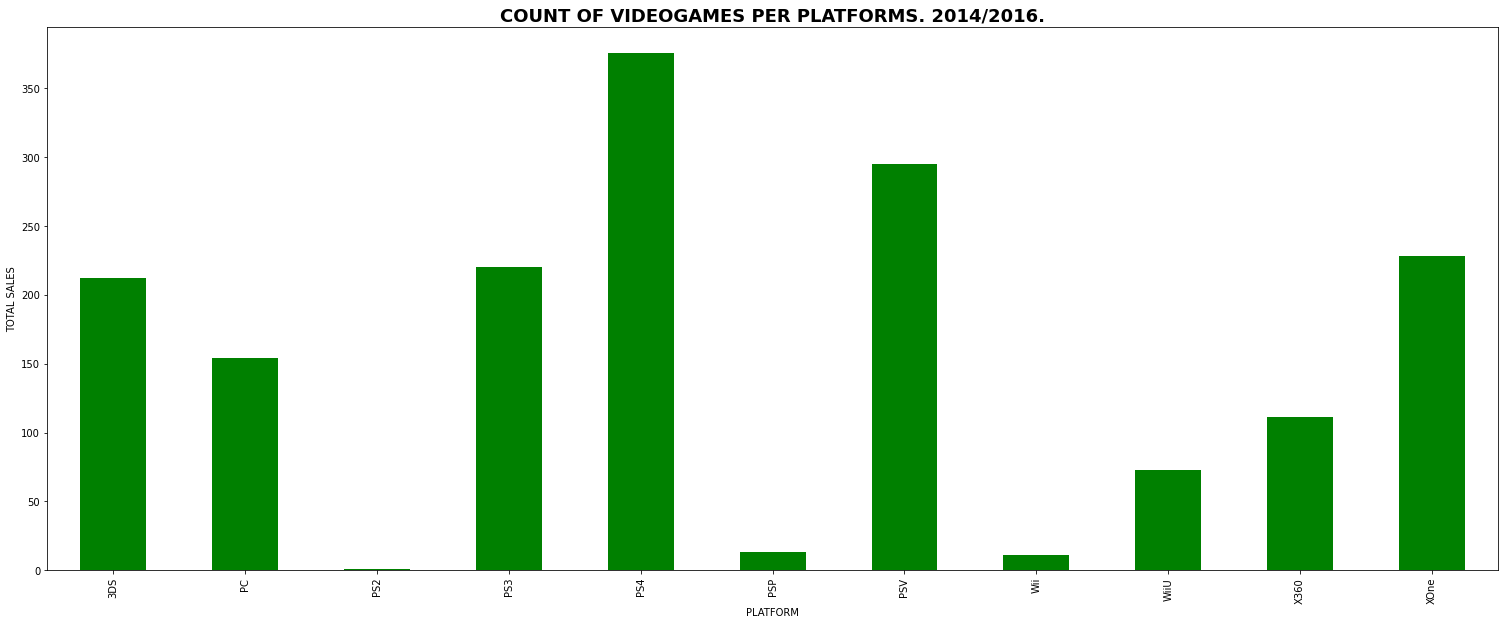

In [49]:
count_per_platform = games.query('year_of_release >=2014').groupby('platform')['total_sales'].count()
plt.figure(figsize=(26,10)) # specifying figure size
count_per_platform.plot(kind='bar', color = 'purple')
plt.title('COUNT OF VIDEOGAMES PER PLATFORMS. 2014/2016.', size =18, weight='bold')
plt.xlabel('PLATFORM')
plt.ylabel('TOTAL SALES')
plt.show()

COUNT OF VIDEOGAMES PER PLATFORMS. 2014/2016. BAR GRAPH.
- PS4 and PSV counts the higher number of videogames released. (Here is strange to see PSV in second position considering that in sales sommatory is neither in the first 5 position).
- XOne, PS3 and 3DS third/fourth and fifth position.
- Really few games are still released for PSP and Wii, while PS2 doesn't anymore.

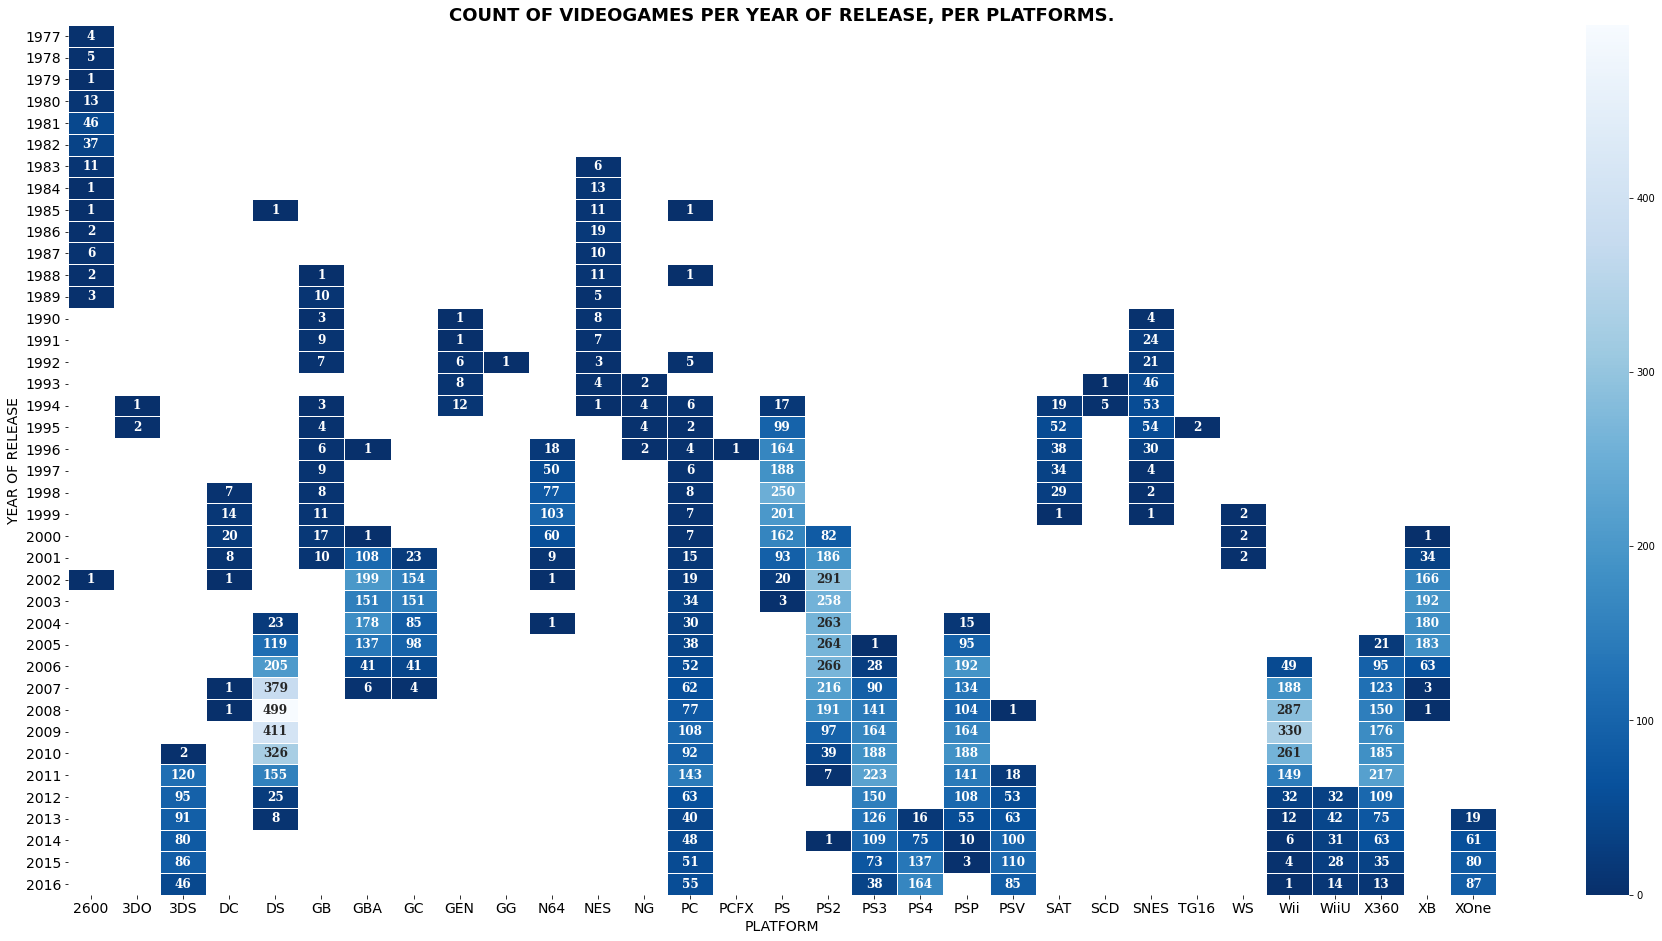

In [50]:
#We find that there are 31 unique platforms.
#Looks good. We notice that (besides for the PC), games are released consecutive years for a given platform.
#Anomoly for the DS in 1985 (the DS wasn't released until 2004)
table_platforms = pd.pivot_table(games,values=['total_sales'],index=['year_of_release'],columns=['platform'],aggfunc='count',margins=False)

plt.figure(figsize=(32,16))
sns.heatmap(table_platforms['total_sales'],linewidths=.5,annot=True,fmt='.0f',vmin=0, cmap='Blues_r', annot_kws={'fontsize':12, 'fontweight':'bold', 'fontfamily':'serif'})
plt.title('COUNT OF VIDEOGAMES PER YEAR OF RELEASE, PER PLATFORMS.', fontsize=18, weight='bold', va='center')
plt.xlabel('PLATFORM', size = 14)
plt.ylabel('YEAR OF RELEASE', size = 14)
plt.tick_params(axis='both', labelsize=14)
plt.show()

COUNT OF VIDEOGAMES PER YEAR OF RELEASE, PER PLATFORMS. HEATMAP.
- The higher number of count of videogames released are among the years 2007 and 2010 for DS console. (More then 300/400 units) 
- Wii among 2007 and 2010 counted as well a really high number of videogames. (more then 250 units).

- PS2 never released more then 291 games in an year (2002)
- DS never released more then 499 games in an year  (2008)
- Wii never released more then 330 games in an year (2009)
- PC never released more then 143 games in an year  (2010)
- 3DS never released more then 120 games in an year (2011)
- X360 never released more then 217 games in an year(2011)
- PS3 never released more then 223 games in an year (2011)
- PSV never released more then 110 games in an year (2015)
- PS4 never released more then 164 games in an year (2016)
- XOne never released more then 87 games in an year (2016)

PLATFORM THAT USED TO BE POPULAR AND NOW HAVE ZERO SALES:
- PS2, PS, GC, GBA, DS, PSP, XB, SNES, N64 (Just choose the majors.) Wii actually count 1 game in 2016 but is already faded.

HOW LONG TAKE FOR PLATFORMS TO FADE?
- Looking at the heatmap, I determined this period in a range between 6 and 12 years.

From this graph, I recognize 2 anomalies of videogames sold in a "strange" period:
- 1 videogame sold for DS, in 1985 (DS was released in 2004). 
- A game for 2006 in 2002, this is possible but it resulted after researches in a fake.

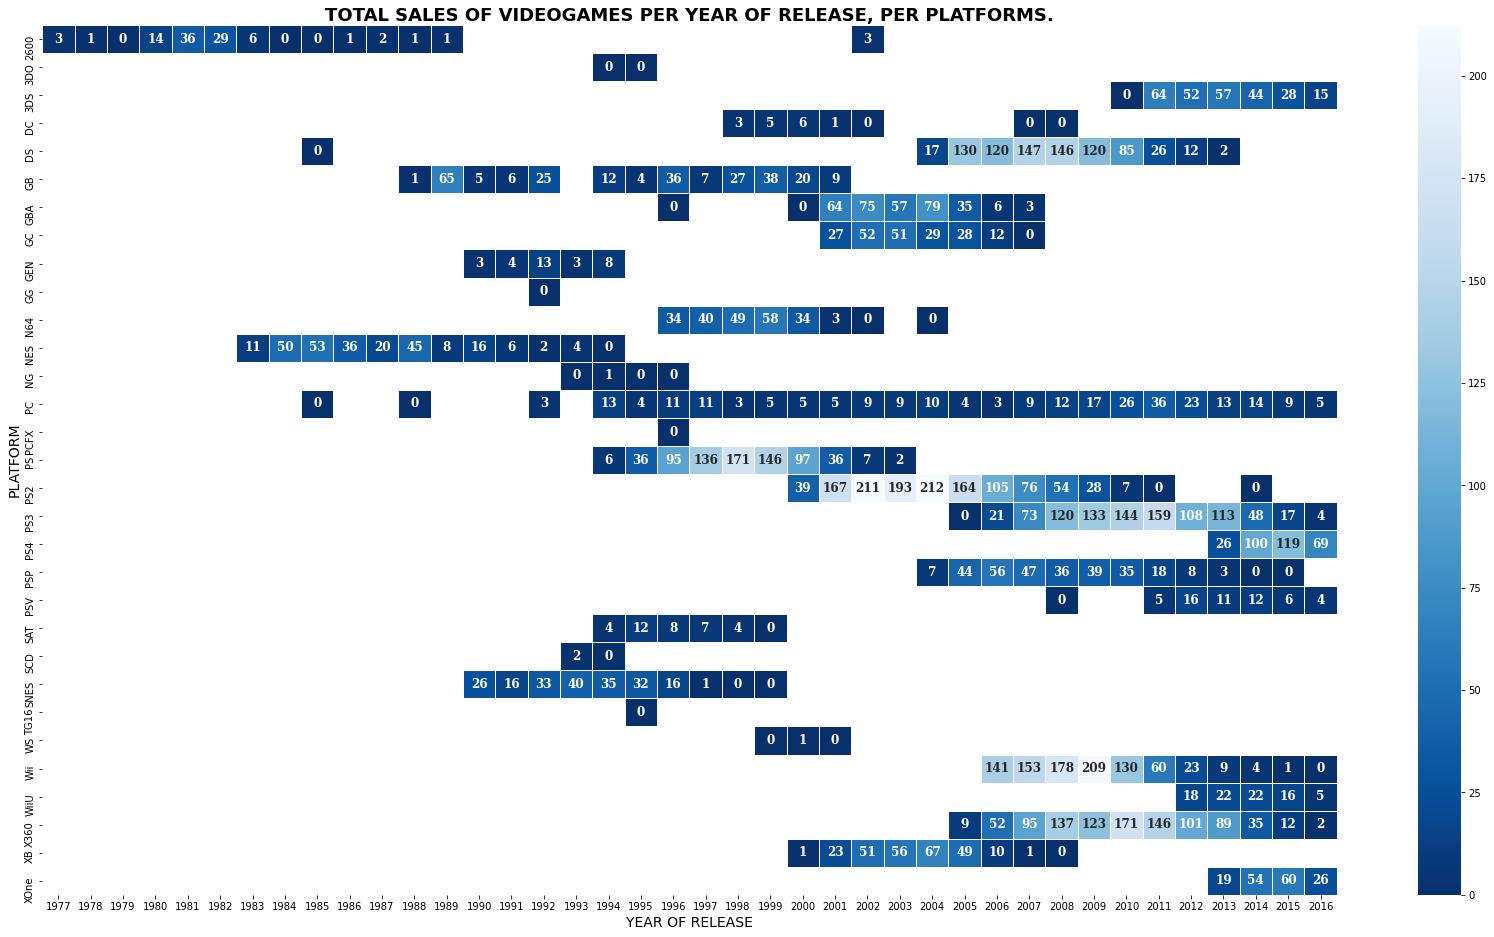

In [51]:
plt.figure(figsize=(29,16))
table_platforms_x = pd.pivot_table(games,values=['total_sales'],index=['year_of_release'],columns=['platform'],aggfunc='sum',margins=False)
sns.heatmap(table_platforms_x['total_sales'].T,linewidths=.5,annot=True,fmt='.0f',vmin=0, cmap ='Blues_r', annot_kws={'fontsize':12, 'fontweight':'bold', 'fontfamily':'serif'})
plt.title('TOTAL SALES OF VIDEOGAMES PER YEAR OF RELEASE, PER PLATFORMS.', fontsize=18, weight='bold', va='center')
plt.xlabel('YEAR OF RELEASE', size=14)
plt.ylabel('PLATFORM', size=14)
plt.show()

TOTAL SALES OF VIDEOGAMES PER YEAR OF RELEASE, PER PLATFORMS. TRANSPOSED HEATMAP.
- The higher total sales sommatories were reached from PS2 in the years among 2002 and 2004.

- PS2 never gain more then 212 USD Millions (2004)
- DS never gain more then 147 USD Millions  (2007)
- Wii never gain more then 209 USD Millions (2009)
- PC never gain more then 36 USD Millions   (2011)
- 3DS never gain more then 120 USD Millions (2011)
- X360 never gain more then 171 USD Millions(2010)
- PS3 never gain more then 159 USD Millions (2011)
- PSV never gain more then 16  USD Millions (2012)
- PS4 never gain more then 119 USD Millions (2015)
- XOne never gain more then 60 USD Millions (2015)

PLATFORM THAT USED TO BE POPULAR AND NOW HAVE ZERO SALES:
- PS2, PS, PSP, Wii, GC, GBA, DS, PSP, XB, SNES, N64 (Just choose the majors.) 

HOW LONG TAKE FOR PLATFORMS TO FADE?
- Looking at the heatmap, I determined this period in a range between 4 and 10 years. Period in wich they are able to make at     least 10 USD Million.

Important things to notice about this graph:
- PSV even if released many many games, was definitely the worst Sony console. Reached a maximal value of 16 Million USD.
- PC even counting the first videogames in the far 1962 never was able to make money from videogames (cause mostly of free games   and softwares available trough PC) reaching a maximal value of 36 USD Million. 
- MOST IMPORTANT: In 2016 the entire industry counted 132 USD Million dollars gained. Lower value compared to the only       year 2004 from PS2.

In [52]:
display(games.query('year_of_release == 1985 and platform == "DS"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15954,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [53]:
print('I did not found any information on the internet about this "Strongest Tokyo University Shogi DS" release date')
print('For this reason I am gonna delete the entire record and reset indexes.')
games = games.drop(labels=15955, axis='index')

I did not found any information on the internet about this "Strongest Tokyo University Shogi DS" release date
For this reason I am gonna delete the entire record and reset indexes.


In [54]:
display(games.query('year_of_release == 1985 and platform == "DS"'))
games = games.reset_index()
games = games.drop(columns=('index'))
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15954,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.296875,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16708,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


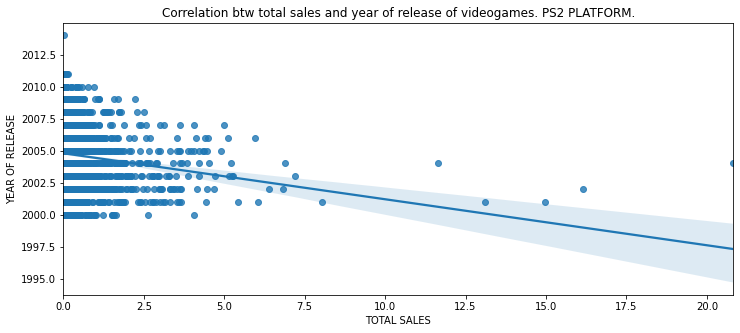

In [55]:
ps2 = games.query('platform == "PS2"')
ds = games.query('platform == "DS"')
ps3 = games.query('platform == "PS3"')
wii = games.query('platform == "Wii"')
xbox360 = games.query('platform == "X360"')


plt.figure(figsize=(12,5))
sns.regplot( x = 'total_sales', y='year_of_release', data=ps2)
plt.title('Correlation btw total sales and year of release of videogames. PS2 PLATFORM.')
plt.xlabel('TOTAL SALES')
plt.ylabel('YEAR OF RELEASE')
plt.show()

STUDIED CORRELATION BTW TOTAL SALES AND YEAR OF RELEASE FOR THE MAJOR PLATFORMS.
CORRELATION BTW TOTAL SALES AND YEAR OF RELEASE FOR THE MAJOR PLATFORMS. For PS2:
- Most of videogames earned till 5 Million Dollars.
- the best years for ps2 were from 2001 to 2006, the scatterplots here is more uniform and points are distributed in this range for the years. (5 years golden period)
- looking at total sales we can see few outliers around 15 Millions Dollar btw 2001 and 2005 and one at 20 Million around 2003.

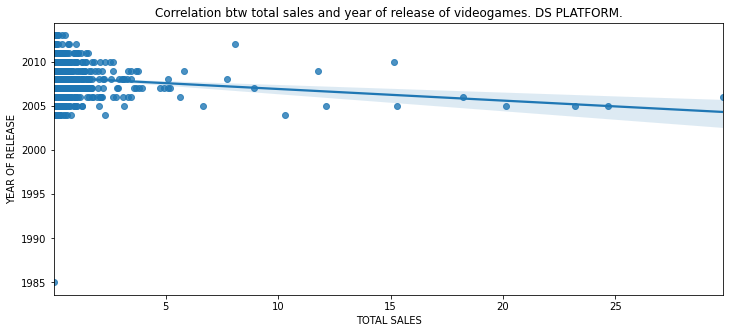

In [56]:
plt.figure(figsize=(12,5))
sns.regplot( x = 'total_sales', y='year_of_release', data=ds)
plt.title('Correlation btw total sales and year of release of videogames. DS PLATFORM.')
plt.xlabel('TOTAL SALES')
plt.ylabel('YEAR OF RELEASE')
plt.show()

CORRELATION BTW TOTAL SALES AND YEAR OF RELEASE FOR THE MAJOR PLATFORMS. For DS:
- Mostly DS games earned till 3,5 Million Dollars.
- about years we can say that best years for DS were between 2006 and 2009. Here are distribuited more points. (3 years golden period)
- about total sales, we have many outliers from 3,5 to a maximum of 30 Millions. (4 of them over 20 Million, PS2 MAX)

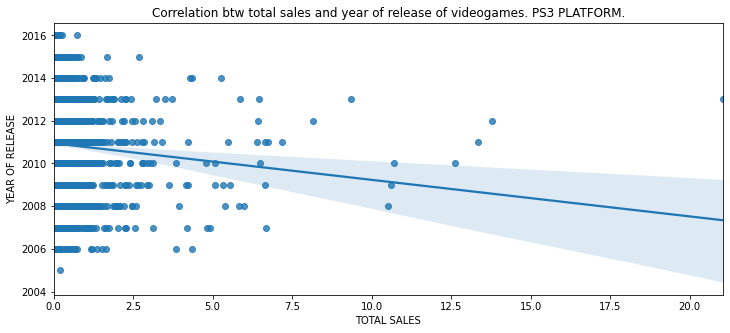

In [57]:
plt.figure(figsize=(12,5))
sns.regplot( x = 'total_sales', y='year_of_release', data=ps3)
plt.title('Correlation btw total sales and year of release of videogames. PS3 PLATFORM.')
plt.xlabel('TOTAL SALES')
plt.ylabel('YEAR OF RELEASE')
plt.show()

CORRELATION BTW TOTAL SALES AND YEAR OF RELEASE FOR THE MAJOR PLATFORMS. For PS3:
- Mostly PS3 games earned till 3,5 Million Dollars.
- Better years of PS3 from 2007 to 2012. (5 years golden period)
- Total sales outliers many of them around 10 millions with an high value on 22 Million.

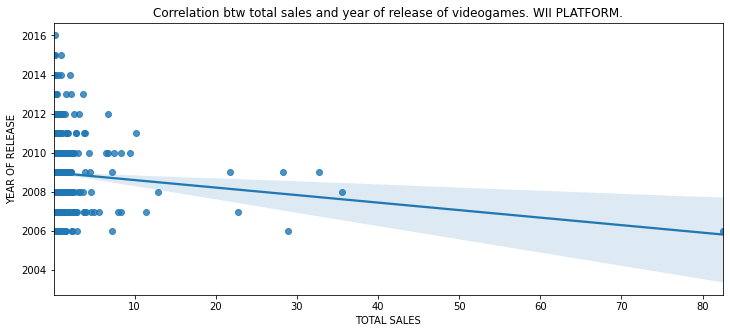

In [58]:
plt.figure(figsize=(12,5))
sns.regplot( x = 'total_sales', y='year_of_release', data=wii)
plt.title('Correlation btw total sales and year of release of videogames. WII PLATFORM.')
plt.xlabel('TOTAL SALES')
plt.ylabel('YEAR OF RELEASE')
plt.show()

CORRELATION BTW TOTAL SALES AND YEAR OF RELEASE FOR THE MAJOR PLATFORMS. For Wii:
- Mostly Wii games earned till 2 Million Dollars.
- Better years of Wii goes from 2007 to 2010. (almost 3 years golden period)
- Total sales outliers many of them beetween 20 and 40 Million dollars with an high value more then 80 Million. (Wii Sports)

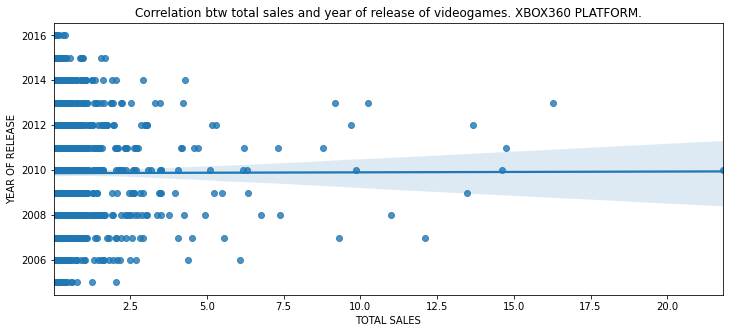

In [59]:
plt.figure(figsize=(12,5))
sns.regplot( x = 'total_sales', y='year_of_release', data=xbox360)
plt.title('Correlation btw total sales and year of release of videogames. XBOX360 PLATFORM.')
plt.xlabel('TOTAL SALES')
plt.ylabel('YEAR OF RELEASE')
plt.show()

CORRELATION BTW TOTAL SALES AND YEAR OF RELEASE FOR THE MAJOR PLATFORMS. For Xbox 360:
- Mostly XBOX 360 games earned till 2 / 2,5 Million Dollars.
- Better years of XBOX 360 goes from 2007 to 2013. (almost 6 years golden period)
- Total sales outliers many of them around 5/10/15 millions with an high value on 22 Million.

In the beginning of my analisy, I started to see how the count of videogames sold changed during the history. We took a long journey that brought us from 1977 (first year ever in the history to have seen a video-games) till 2016 (year where we are calculating data) We saw a big increase that reached the historical maximum in the 2009/2010, to have a slight and then an almost 70% of dicrease in the further years. 

The four shown graph in this section are in orange and show the count of videogames grouped by year of release of the game itself, here we have the first graph wich describe the history of all times videogame (count). 

The subplot divides the history into two part before advent of videogames and after (I choose the 1994) to make this classification. 

After that I plotted the graph of the interested period for our analisy(2014-2016) as we can see in this graph, from the 2015 to the 2016, the count of videogames decreased a lot. What about sales? I plotted as well, the graph of total sales sum per year of release. This graph basically confirmed the decrease in releases. 2014(300 USD Million), 2015(250 USD Million) and 2016(150 USD Million). 

From those data we understood that the market is having a slow down in this current period.

After that, I plotted the total sales of videogames out per platforms in the green bar graph shown finding that PS2 and Xbox360 were the consoles that made more money in the history.

Plotted as well, the count of videogames out per platforms all time, then the top 5 in the history (both multicolored). Here PS2 and DS counted much more videogames released.

What about our period? In green we can find, sales sommatory per platforms (2014-2016) and videogames per platforms count (2014-2016). In this period, PS4 and XOne lead the market, followed by 3DS, X360, WiiU and PSV for the sales. While for the count of videogames released we find PS4 and PSV in the first two position followed by XOne, PS3 and 3DS. In both graphs we can understand that PS2, PSP and Wii faded definitely as consoles.

I studied the heatmap of number videogames released per platform trying to indentify patterns helpful and find good keys to conduct the analisy. I recognised in PS2, PS, GC, GBA, DS, PSP, XB, SNES, N64 platform famous that todays doesn't count anymore games released. I determined as weel in a range between 6 and 12 years the mean of consoles lifetime (This can basically change by how this console led the market in the lifetime period).

To have an answer and even confirm my ideas, I created a second heatmap. A transposed one, to show the sommatory of total sales, let's take a look on it. From the transposed heatmap I was able to describe the gain of the industry divided by platforms and years. What resulted from the analysi of this section is that PS2 has the highest value in the heatmap with 212 USD Million gained in the 2004 itself. This is an higher value compared to the total gain of the industry in the year of 2010 for every consoles.

I continued my study, analyzing the correlation and dispersion between total sales and year of release for the best sold 5 consoles.

# PROGNOSIS 2017 (LAST 6 YEARS.)

In [60]:
#Building a prognosis for 2017.
#Keeping only relevant data for the analysi.
#Keeping only platforms still sold in 2016.
prognosis_2017 = games.query('platform == "3DS" or platform == "PC" or platform == "PS3" or platform == "PS4" or platform == "PSV" or platform == "Wii" or platform == "WiiU" or platform == "X360" or platform == "XOne"')
#Keeping only the last 6 years data.
prognosis_2017 = prognosis_2017.query('year_of_release >= 2011')
display(prognosis_2017)                

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.203125,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.101562,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.400391,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16703,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16706,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


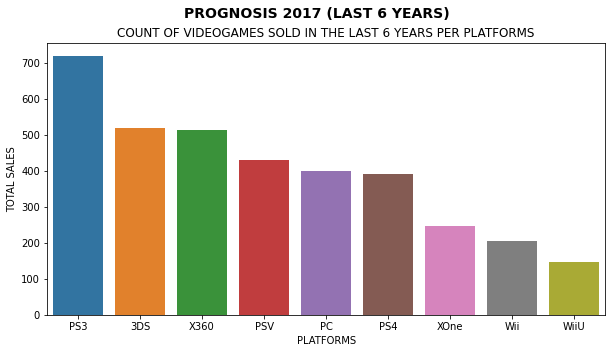

In [61]:
#Looking at every platform sold in the last six years. Determining wich are leading sales.
prognosis_platforms = Counter(prognosis_2017['platform'].tolist()).most_common(9)
platform_name_prog = [name[0] for name in prognosis_platforms]
platform_counts_prog = [name[1] for name in prognosis_platforms]

fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x=platform_name_prog,y=platform_counts_prog,ax=ax)
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS)', size=14, weight='bold')
plt.title('COUNT OF VIDEOGAMES SOLD IN THE LAST 6 YEARS PER PLATFORMS')
plt.xlabel('PLATFORMS')
plt.ylabel('TOTAL SALES')
plt.show()

COUNT OF VIDEOGAMES SOLD IN THE LAST 6 YEARS PER PLATFORMS.
- PS3 is the absolute leader of sales, in the last 6 years.
- Following we have X360 and PC in the top 3.

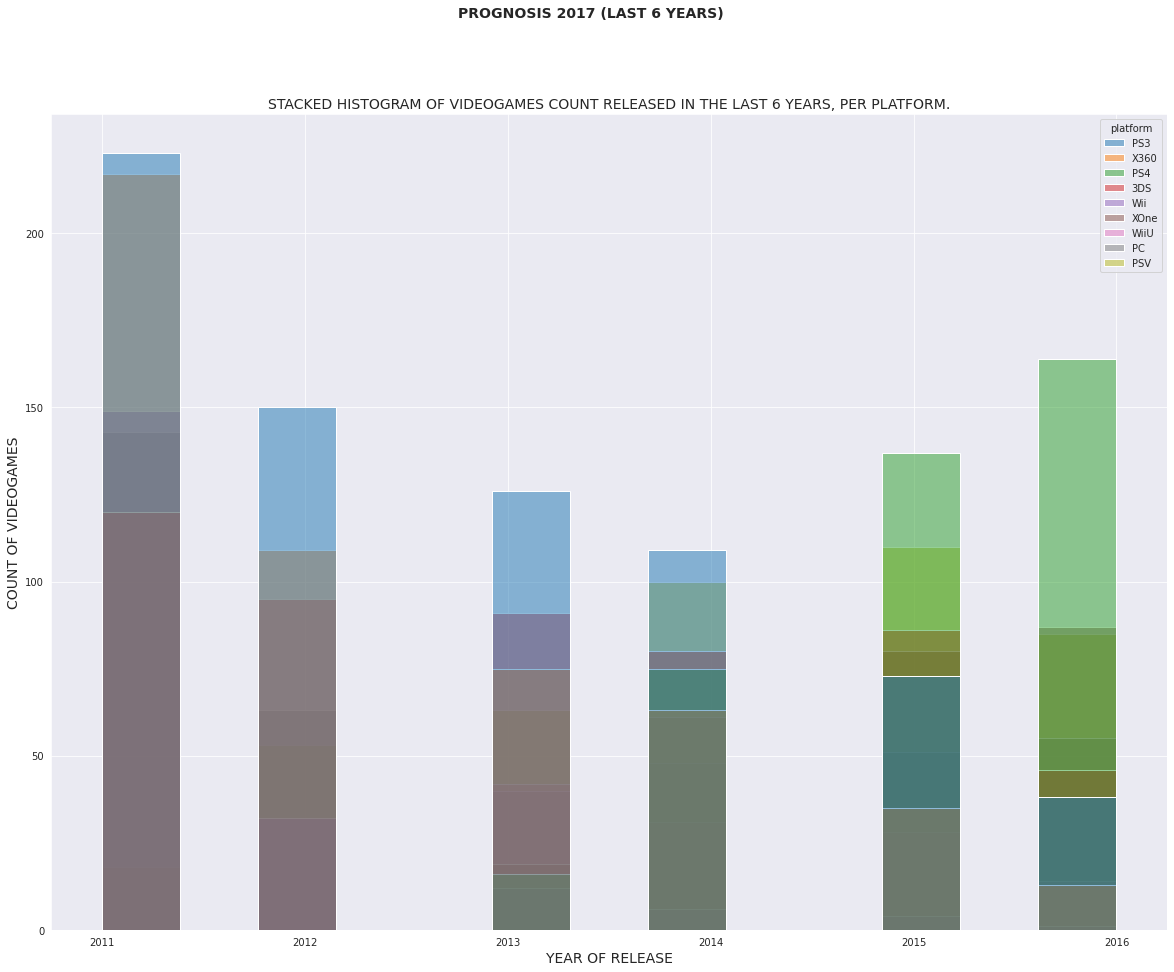

In [62]:
#Plotting histogram of the prognosis_2017 database (last 6 years)
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
sns.histplot(x='year_of_release', data= prognosis_2017, hue='platform')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS)', size=14, weight='bold')
plt.title('STACKED HISTOGRAM OF VIDEOGAMES COUNT RELEASED IN THE LAST 6 YEARS, PER PLATFORM.', size=14)
plt.xlabel('YEAR OF RELEASE', size=14)
plt.ylabel('COUNT OF VIDEOGAMES',  size=14)
plt.show()

STACKED HISTOGRAM OF VIDEOGAMES COUNT RELEASED IN THE LAST 6 YEARS, PER PLATFORM.
- From 2011 to 2014 PS3 had more release.
- From 2015 to 2016 PS4 had more release.

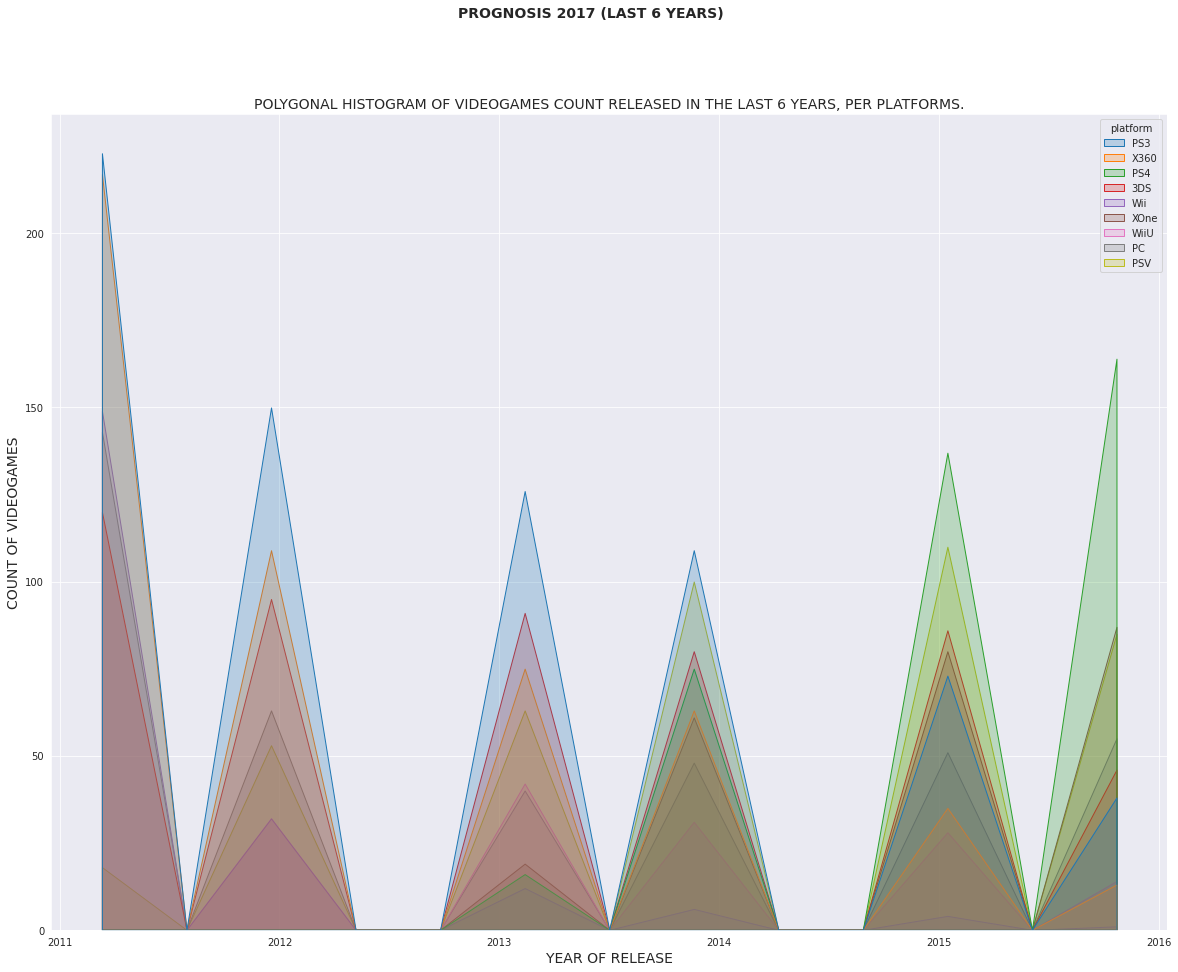

In [63]:
#Histogram with polygonal figures of prognosis_2017 (last 6 years)
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
sns.histplot(x='year_of_release', data= prognosis_2017, hue='platform', element='poly')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS)', size=14, weight='bold')
plt.title('POLYGONAL HISTOGRAM OF VIDEOGAMES COUNT RELEASED IN THE LAST 6 YEARS, PER PLATFORMS.', size=14)
plt.xlabel('YEAR OF RELEASE', size=14)
plt.ylabel('COUNT OF VIDEOGAMES',  size=14)
plt.show()

POLYGONAL HISTOGRAM OF VIDEOGAMES COUNT RELEASED IN THE LAST 6 YEARS, PER PLATFORMS.
- From 2011 to 2014 PS3 had more release.
- From 2015 to 2016 PS4 had more release.

In [64]:
#Plotting histograms for each platform. Break down by year of release and total sales. (9 hist in total).
#Creating datasets to store videogames sold for each platform in last 6 years.
ps3_prog = prognosis_2017.query('platform == "PS3"')
three_ds_prog = prognosis_2017.query('platform == "3DS"')
x360_prog = prognosis_2017.query('platform == "X360"')
psv_prog = prognosis_2017.query('platform == "PSV"')
pc_prog = prognosis_2017.query('platform == "PC"')
ps4_prog = prognosis_2017.query('platform == "PS4"')
xone_prog = prognosis_2017.query('platform == "XOne"')
wii_prog = prognosis_2017.query('platform == "Wii"')
wiiu_prog = prognosis_2017.query('platform == "WiiU"')

PROGNOSIS 2017 (LAST 6 YEARS)


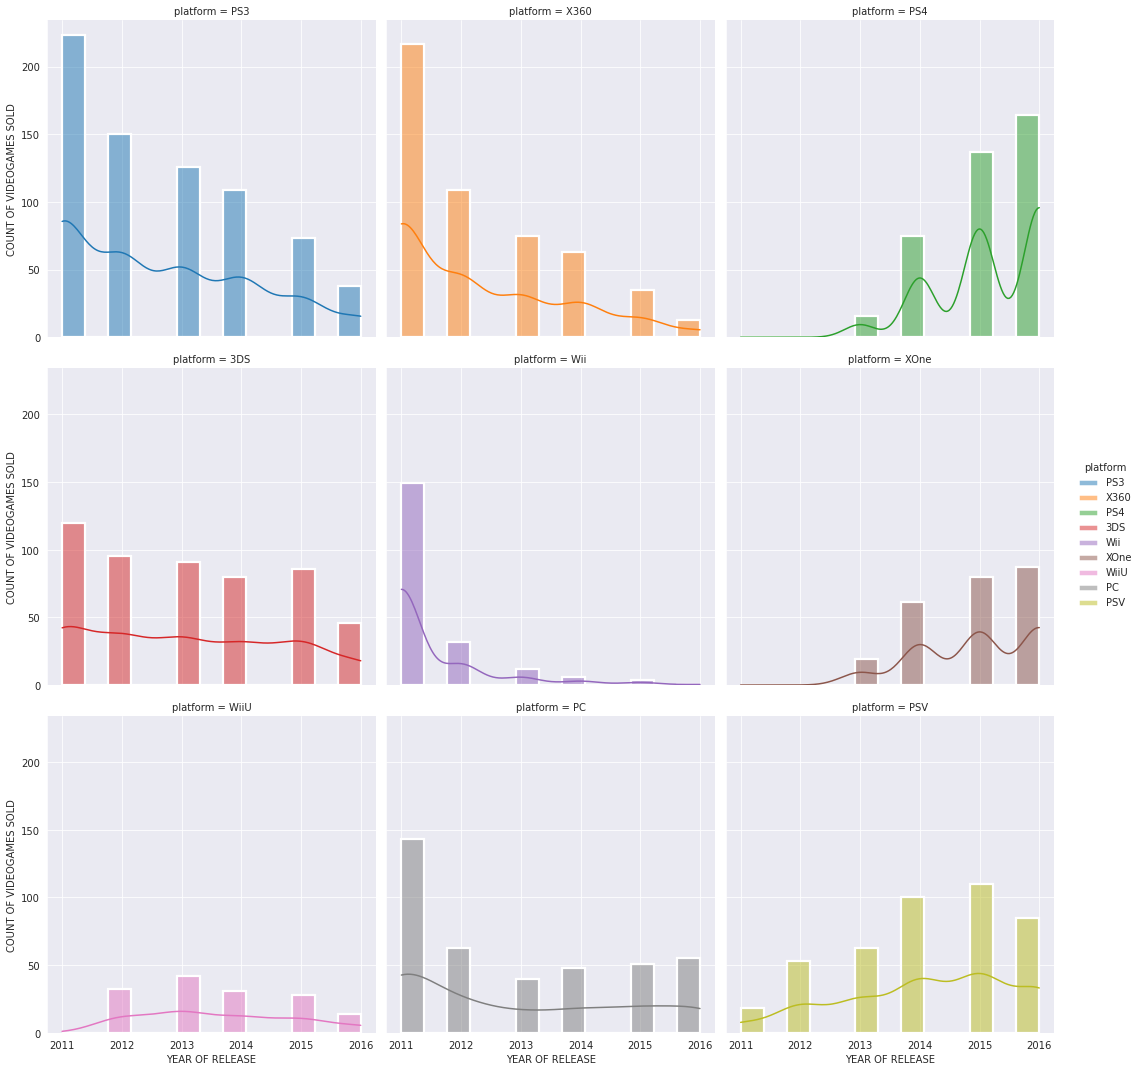

In [65]:
#Representing distribution plot for each platform about the solds in the last six years.
print('PROGNOSIS 2017 (LAST 6 YEARS)')
displot = sns.displot(x='year_of_release', data=prognosis_2017, hue='platform', col='platform', col_wrap = 3, kde=True, lw=2.5)
displot.set_xlabels('YEAR OF RELEASE')
displot.set_ylabels('COUNT OF VIDEOGAMES SOLD')
plt.show()

DISPLOT OF PLATFORM PER YEAR. LAST 6 YEARS
- PS4, PSV and XOne have a positive trend 
- PS3, XBOX 360, 3DS, Wii, WiiU and PCs have a negative trend.

In [66]:
#Showing the skews of each platform.
print('PROGNOSIS 2017 (LAST 6 YEARS)')
print('')
print("The Skewness of distribution plot for the PS3 is: %f" % ps3_prog['year_of_release'].skew())
print("The Skewness of distribution plot for the XBOX 360 is: %f" % x360_prog['year_of_release'].skew())
print("The Skewness of distribution plot for the PS4 is: %f" % ps4_prog['year_of_release'].skew())
print("The Skewness of distribution plot for the 3DS is: %f" % three_ds_prog['year_of_release'].skew())
print("The Skewness of distribution plot for the Wii is: %f" % wii_prog['year_of_release'].skew())
print("The Skewness of distribution plot for the XBOX ONE is: %f" % xone_prog['year_of_release'].skew())
print("The Skewness of distribution plot for the WiiU is: %f" % wiiu_prog['year_of_release'].skew())
print("The Skewness of distribution plot for the PC is: %f" % pc_prog['year_of_release'].skew())
print("The Skewness of distribution plot for the PS Vita is: %f" % psv_prog['year_of_release'].skew())
print('')
print('POSITIVE VALUES == RIGHT SKEWED (NEGATIVE TREND)')
print('NEGATIVE VALUES == LEFT SKEWED (POSITIVE TREND)')
print('')
print('In the last six years PS3, XBOX 360, 3DS, Wii, WiiU and PCs, have a negative trend.')
print('While PS4, XBOX ONE AND PS Vita have a positive trend.')

PROGNOSIS 2017 (LAST 6 YEARS)

The Skewness of distribution plot for the PS3 is: 0.541963
The Skewness of distribution plot for the XBOX 360 is: 0.880312
The Skewness of distribution plot for the PS4 is: -0.662976
The Skewness of distribution plot for the 3DS is: 0.218873
The Skewness of distribution plot for the Wii is: 2.412115
The Skewness of distribution plot for the XBOX ONE is: -0.442295
The Skewness of distribution plot for the WiiU is: 0.300885
The Skewness of distribution plot for the PC is: 0.425659
The Skewness of distribution plot for the PS Vita is: -0.426028

POSITIVE VALUES == RIGHT SKEWED (NEGATIVE TREND)
NEGATIVE VALUES == LEFT SKEWED (POSITIVE TREND)

In the last six years PS3, XBOX 360, 3DS, Wii, WiiU and PCs, have a negative trend.
While PS4, XBOX ONE AND PS Vita have a positive trend.


PROGNOSIS 2017 (LAST 6 YEARS)
Total sales linear plot per years of release per platforms.


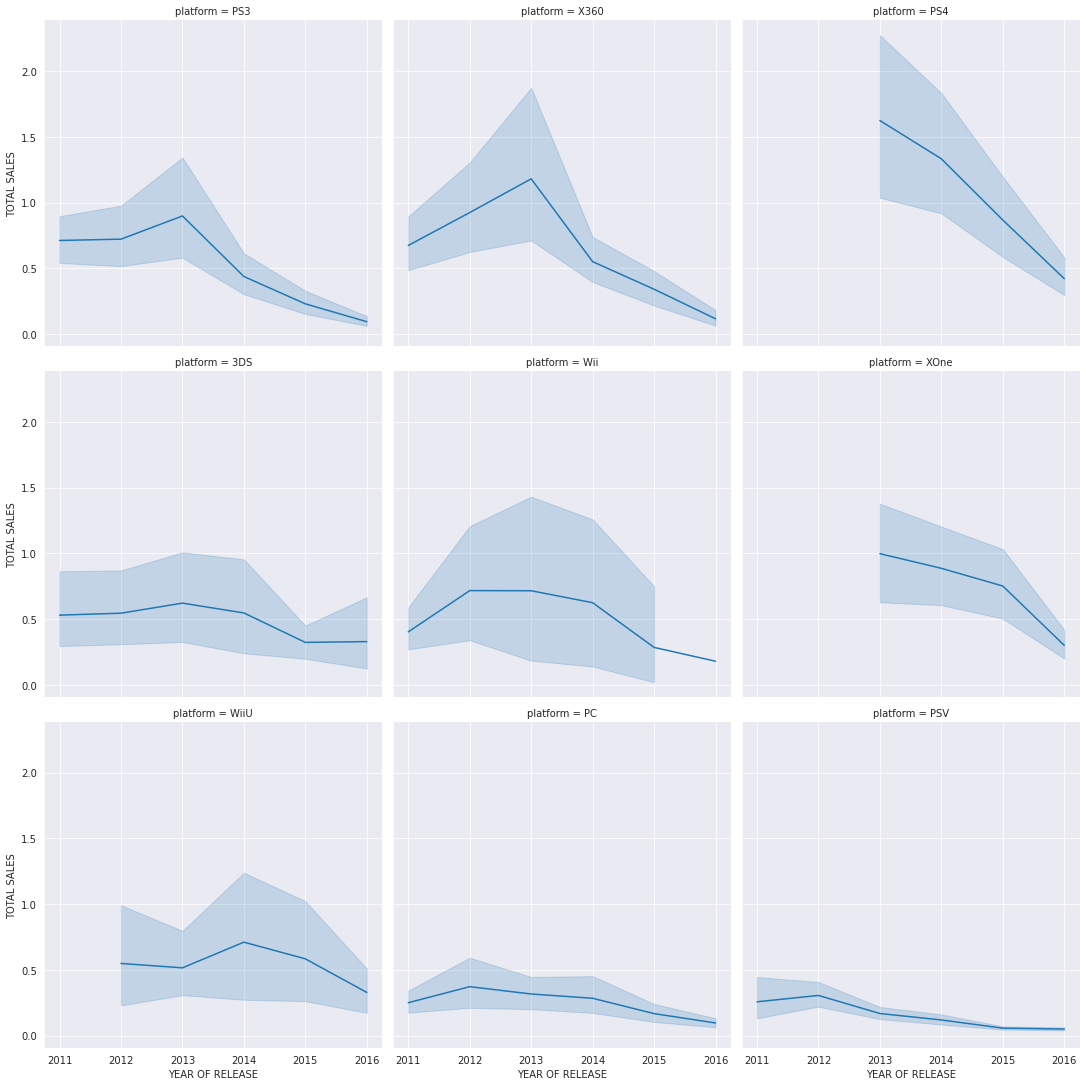

In [67]:
#Plotting linear graphs of the total sales in years per platforms.
print('PROGNOSIS 2017 (LAST 6 YEARS)')
print('Total sales linear plot per years of release per platforms.')
relplot = sns.relplot(x='year_of_release', y='total_sales', data=prognosis_2017, kind='line', col='platform', col_wrap=3)
relplot.set_xlabels('YEAR OF RELEASE')
relplot.set_ylabels('TOTAL SALES')
plt.show()

REGULARPLOT OF TOTAL SALES PER PLATFORMS AND YEARS. LAST 6 YEARS.

PROGNOSIS 2017 (LAST 6 YEARS)


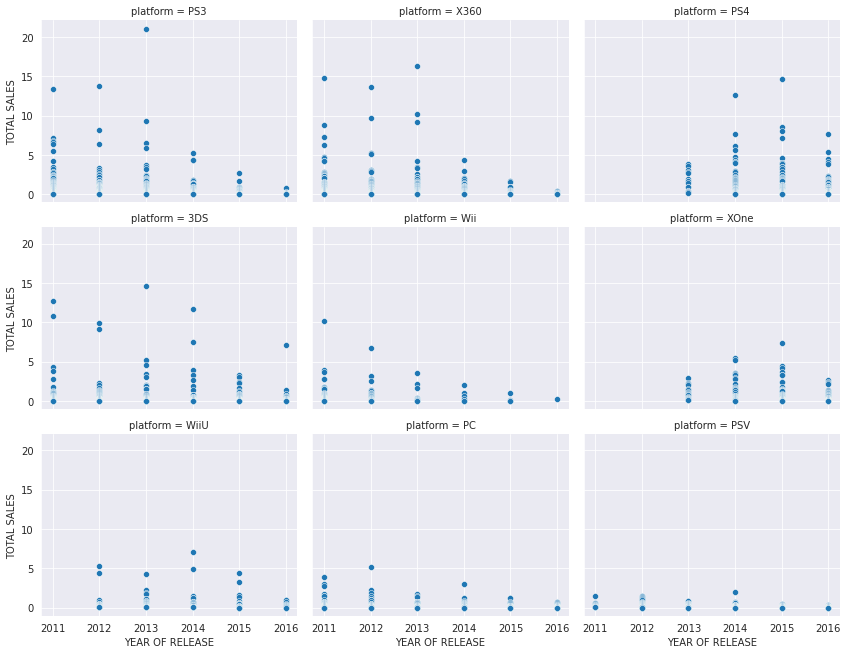

In [68]:
#Building scatterplots from the data.
print('PROGNOSIS 2017 (LAST 6 YEARS)')
scatterplots = sns.FacetGrid(prognosis_2017, col='platform', col_wrap=3, aspect=1.3)
scatterplots.map_dataframe(sns.scatterplot, x='year_of_release', y='total_sales')
scatterplots.set_axis_labels('YEAR OF RELEASE', 'TOTAL SALES')
plt.show()

SCATTER PLOT OF TOTAL SALES PER YEAR OF RELEASE PER PLATFORM.

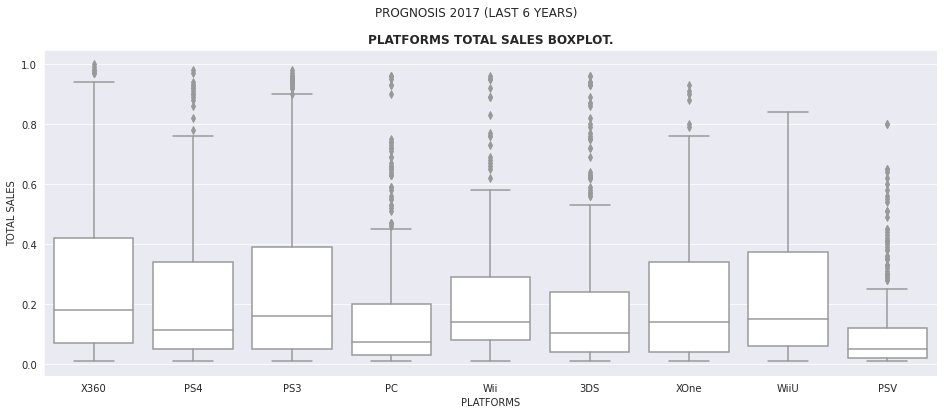

In [69]:
#Building boxplots to show total sales divided by year of release per platforms.
prognosis_2017_boxplot = prognosis_2017.query('total_sales < 1')
plt.figure(figsize = (16,6))
sns.boxplot(data = prognosis_2017_boxplot, x = 'platform', y = 'total_sales', color='white')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS)')
plt.title('PLATFORMS TOTAL SALES BOXPLOT.', weight='bold')
plt.xlabel('PLATFORMS')
plt.ylabel('TOTAL SALES')
plt.show()

TOTAL SALES PER PLATFORMS. BOXPLOT. (LAST 6 YEARS)
- X360, PS3, Wii have the higher median sales among platforms.
- PSV the lowest one.

In [70]:
print('PROGNOSIS 2017 (LAST 6 YEARS)')
print('')
grouped_prog = prognosis_2017.groupby('platform')['total_sales'].sum()
display(grouped_prog)

PROGNOSIS 2017 (LAST 6 YEARS)



platform
3DS     258.68
PC       99.33
PS3     448.64
PS4     314.14
PSV      53.81
Wii      96.66
WiiU     82.19
X360    383.97
XOne    159.32
Name: total_sales, dtype: float64

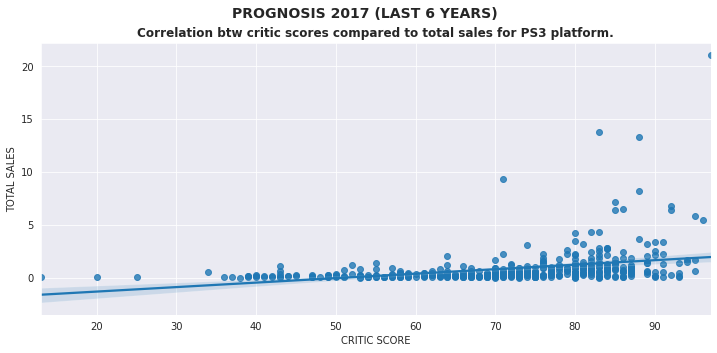

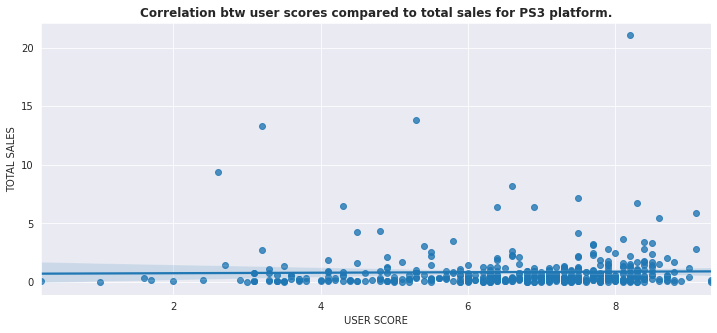

In [71]:
#Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. 
#Since the much profitable platform was PS3 in those 6 years, I am going to analyze this one.
plt.figure(figsize=(12,5))
sns.regplot( x = 'critic_score', y='total_sales', data=ps3_prog)
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS)', size=14, weight='bold')
plt.title('Correlation btw critic scores compared to total sales for PS3 platform.', size = 12, weight='bold')
plt.xlabel('CRITIC SCORE')
plt.ylabel('TOTAL SALES')
plt.show()
plt.figure(figsize=(12,5))
sns.regplot( x = 'user_score', y='total_sales', data=ps3_prog)
plt.title('Correlation btw user scores compared to total sales for PS3 platform.', size=12, weight='bold')
plt.xlabel('USER SCORE')
plt.ylabel('TOTAL SALES')
plt.show()

CORRELATION BETWEEN CRITIC SCORE & USER SCORE TO TOTAL SALES. PS3 PLATFORM. LAST 6 YEARS.
- Critic score and total sales are directly and positively correlated.
- User score and total sales are correlated if you look at the concentration of values, but many games with low user scores have   high total sales the same.

In [72]:
#Compare sales of the same games broken down by platforms.

games_on_platforms = prognosis_2017.groupby(['name', 'platform'])['total_sales'].agg({'sum'})

display(games_on_platforms)

games_on_platforms = games_on_platforms.reset_index()

games_on_platforms_count_plat = games_on_platforms.groupby('name').count()
games_on_platforms_count_plat = games_on_platforms_count_plat.drop(columns='sum')
games_on_platforms_count_plat.columns= ['count_platforms']
games_on_platforms_count_plat.reset_index()
display(games_on_platforms_count_plat)

games_on_platforms = games_on_platforms.merge(games_on_platforms_count_plat, on='name')

display(games_on_platforms)

,,sum
name,platform,
Beyblade Burst,3DS,0.03
Fire Emblem Fates,3DS,1.67
Frozen: Olaf's Quest,3DS,0.59
Haikyu!! Cross Team Match!,3DS,0.04
Tales of Xillia 2,PS3,0.84
...,...,...
htoL#NiQ: The Firefly Diary,PSV,0.01
inFAMOUS 2,PS3,1.82
inFAMOUS: Second Son,PS4,2.79


,count_platforms
name,
Beyblade Burst,1
Fire Emblem Fates,1
Frozen: Olaf's Quest,1
Haikyu!! Cross Team Match!,1
Tales of Xillia 2,1
...,...
de Blob 2,3
htoL#NiQ: The Firefly Diary,1
inFAMOUS 2,1


,name,platform,sum,count_platforms
0,Beyblade Burst,3DS,0.03,1
1,Fire Emblem Fates,3DS,1.67,1
2,Frozen: Olaf's Quest,3DS,0.59,1
3,Haikyu!! Cross Team Match!,3DS,0.04,1
4,Tales of Xillia 2,PS3,0.84,1
...,...,...,...,...
3562,htoL#NiQ: The Firefly Diary,PSV,0.01,1
3563,inFAMOUS 2,PS3,1.82,1
3564,inFAMOUS: Second Son,PS4,2.79,1
3565,uDraw Studio: Instant Artist,Wii,0.17,2


In [73]:
games_on_more_platforms = (games_on_platforms.query('count_platforms > 1'))

print('The number of unique games in the dateset is:', games_on_more_platforms['name'].nunique())

games_on_more_platforms.columns=(['name','platform','total_sales','platforms_count'])
      
display(games_on_more_platforms)

print(games_on_more_platforms.query('name == "Grand Theft Auto V"'))

The number of unique games in the dateset is: 750


,name,platform,total_sales,platforms_count
10,2014 FIFA World Cup Brazil,PS3,0.61,2
11,2014 FIFA World Cup Brazil,X360,0.43,2
13,3rd Super Robot Wars Z Jigoku Hen,PS3,0.23,2
14,3rd Super Robot Wars Z Jigoku Hen,PSV,0.19,2
15,3rd Super Robot Wars Z: Tengoku-Hen,PS3,0.15,2
...,...,...,...,...
3559,de Blob 2,PS3,0.21,3
3560,de Blob 2,Wii,0.19,3
3561,de Blob 2,X360,0.15,3
3565,uDraw Studio: Instant Artist,Wii,0.17,2


                    name platform  total_sales  platforms_count
1178  Grand Theft Auto V       PC         1.17                5
1179  Grand Theft Auto V      PS3        21.05                5
1180  Grand Theft Auto V      PS4        12.62                5
1181  Grand Theft Auto V     X360        16.27                5
1182  Grand Theft Auto V     XOne         5.47                5


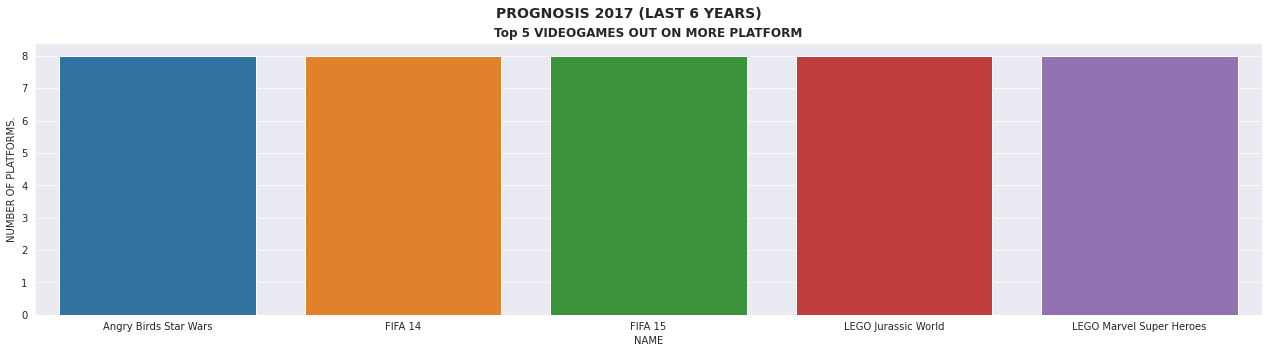

In [74]:
#Looking at top 5 videogames sold on more platforms in prognosis_2017 (last 6 years)
top_5_games_prog = Counter(games_on_more_platforms['name'].dropna().tolist()).most_common(5)
videogame_name = [name[0] for name in top_5_games_prog]
platform_counts = [name[1] for name in top_5_games_prog]

fig,ax = plt.subplots(figsize=(22,5))
sns.barplot(x=videogame_name,y=platform_counts,ax=ax)
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS)', size=14, weight='bold')
plt.title('Top 5 VIDEOGAMES OUT ON MORE PLATFORM', size=12, weight='bold')
plt.xlabel('NAME')
plt.ylabel('NUMBER OF PLATFORMS.')
plt.show()

In [75]:
print(games_on_more_platforms.query('name == "Angry Birds Star Wars"'))
print(games_on_more_platforms.query('name == "FIFA 14"'))
print(games_on_more_platforms.query('name == "FIFA 15"'))
print(games_on_more_platforms.query('name == "LEGO Jurassic World"'))
print(games_on_more_platforms.query('name == "LEGO Marvel Super Heroes"'))

                      name platform  total_sales  platforms_count
108  Angry Birds Star Wars      3DS         0.33                8
109  Angry Birds Star Wars      PS3         0.29                8
110  Angry Birds Star Wars      PS4         0.22                8
111  Angry Birds Star Wars      PSV         0.08                8
112  Angry Birds Star Wars      Wii         0.26                8
113  Angry Birds Star Wars     WiiU         0.10                8
114  Angry Birds Star Wars     X360         0.28                8
115  Angry Birds Star Wars     XOne         0.17                8
        name platform  total_sales  platforms_count
947  FIFA 14      3DS         0.23                8
948  FIFA 14       PC         0.40                8
949  FIFA 14      PS3         6.46                8
950  FIFA 14      PS4         3.01                8
951  FIFA 14      PSV         0.41                8
952  FIFA 14      Wii         0.38                8
953  FIFA 14     X360         4.22        

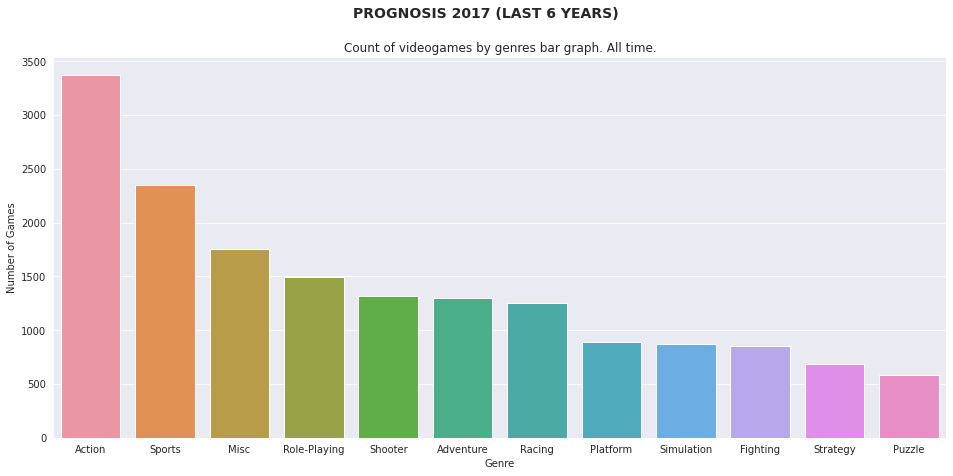

In [76]:
# Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?
### Looking at all the genres (the only excluded by my graph was (Unknow with only one record.)
genre = Counter(games['genre'].tolist()).most_common(12)
genre_name = [name[0] for name in genre]
genre_counts = [name[1] for name in genre]

fig,ax = plt.subplots(figsize=(16,7))
sns.barplot(x=genre_name,y=genre_counts,ax=ax)
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS)', size=14, weight='bold')
plt.title('Count of videogames by genres bar graph. All time.')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

COUNT OF VIDEOGAMES BY GENRES BAR GRAPH. ALL TIME.
- Action leads the released games charts by genres.
- Sport and Misc second and third place.
- Strategy and Puzzle are in the last positions.

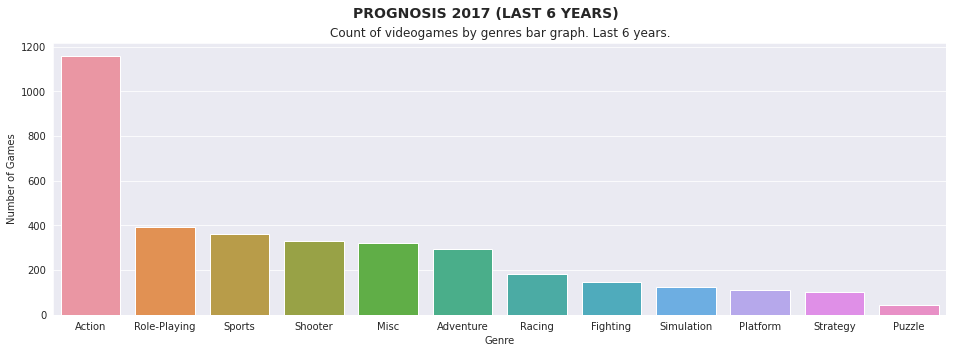

In [77]:
genre = Counter(prognosis_2017['genre'].tolist()).most_common(12)
genre_name = [name[0] for name in genre]
genre_counts = [name[1] for name in genre]

fig,ax = plt.subplots(figsize=(16,5))
sns.barplot(x=genre_name,y=genre_counts,ax=ax)
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS)', size=14, weight='bold')
plt.title('Count of videogames by genres bar graph. Last 6 years.')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

COUNT OF VIDEOGAMES BY GENRES BAR GRAPH. LAST 6 YEARS.
- Action leads the chart.
- Shooters games gained the second position in the chart.
- Sports and Role-Playing are on third and fourth position.
- Strategy and puzzle are at the end of the classify.

Total_sales grouped by genre:
The five largest values are:
genre
Action          549.35
Shooter         402.92
Sports          233.15
Role-Playing    227.28
Misc            130.74
Name: total_sales, dtype: float64



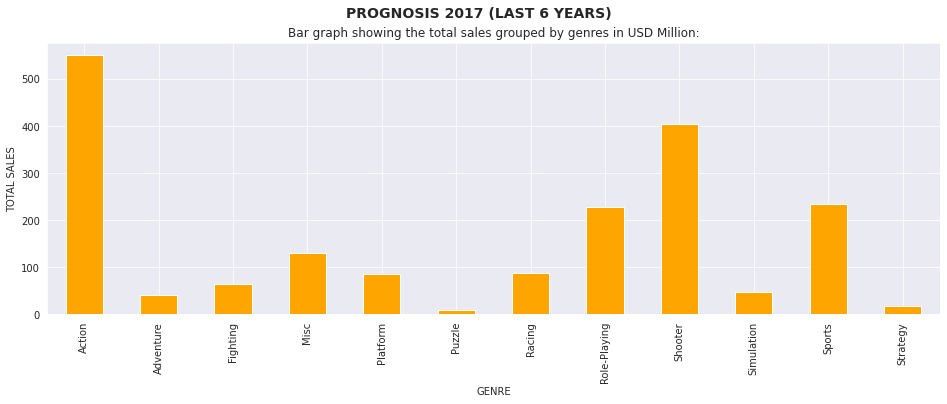

In [78]:
print('Total_sales grouped by genre:')
total_sales_bar_prog = (prognosis_2017.groupby('genre')['total_sales'].sum())
print('The five largest values are:')
print(total_sales_bar_prog.nlargest(5))
print('')
plt.figure(figsize=(16,5))
total_sales_bar_prog.plot(kind='bar', color='orange')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS)', size=14, weight='bold')
plt.title('Bar graph showing the total sales grouped by genres in USD Million:')
plt.xlabel('GENRE')
plt.ylabel('TOTAL SALES')
plt.show()

TOTAL SALES DIVIDED BY GENRE LAST 6 YEARS.

# Step 3. Analyze the data
# PROGNOSIS FOR 2017

I decided to built my first prognosis for 2017, I choose to include in this dataset all the platforms that had at least one sells in 2016 and removed all the records within 6 years. To better say, I left all the records from 2011 to 2016 for each platforms still sold. The resulting database is composed by 3568 records.

WICH ONE ARE LEADING SALES?
FIRST BAR GRAPH:
- PS3 leads sales of the last 6 years. Following we have Xbox 360 and PC.
SECOND BAR GRAPH (COMPLEX BAR GRAPH):
- Here is easely possible understand that PS3 ruled the market till 2014, in 2015 and 2016 PS4 does.
THIRD BAR GRAPH (POLYGONAL):
- Same as descript before in polygonal form.
FOURTH GRAPH (DISPLOT ABOUT PLATFORMS IN LAST 6 YEARS):
- Here is really easy to understand that XBOX 360, PC, WiiU, 3DS, PS3 have a negative trend compared to XOne, PSV and PS4, that have a positive one.
FIFTH GRAPH (LINEAR PLOT):
- With this graph I wanted to underline the total sales per platforms in different years. From this graph we can understand that 2012 was the better year for PC and PSV sales. 2013 was the best year for PS3, XBOX360 and Wii. 2014 was the best year for WiiU and PS4 while 2015 was the year of XBOX One.
SIXTH GRAPH (SCATTERPLOT FACET GRID):
- A quick look to the general distribution of the data in analysis.
SEVENTH GRAPH (BOX PLOT):
- As we can see, XBOX360, PS3 and WiiU had the greater medians in total sales.

With those data we can even confirm wath we so in the boxplot:
3DS     258.68
PC       99.33
PS3     448.64
PS4     314.14
PSV      53.81
Wii      96.66
WiiU     82.19
X360    383.97
XOne    159.32

EIGHTH GRAPH (SCATTERPLOT):
- I choose to built the correletion between user and critic score with total sales basing my graphs on PS3 since was the much more profitable platform in the choosed period. As we can see, in critic score we have a direct proportion btw the two values, when there's an higher critic score, sales goes to the stars. For user score we cannot say the same, doesn't look like those values are directly propotional between them.

NINTH GRAPH(TOP 5 VIDEOGAMES ON MORE PLATFORMS):
- Starting from prognosis_2017 database I obtained only the games counted on many platforms. Since was to me not possible to print a graph with 750 unique values. I decided to investigate only 6 Games: Grand Theft Auto V (PS3 sales leader), Angry Birds Star Wars, FIFA 14, FIFA 15, LEGO Jurassic World and LEGO Marvel Super Heroes. here there's an example: 

1177  Grand Theft Auto V      PC         1.17                 5
1179  Grand Theft Auto V      PS3        21.05                5
1180  Grand Theft Auto V      PS4        12.62                5
1181  Grand Theft Auto V     X360        16.27                5
1182  Grand Theft Auto V     XOne         5.47                5

- From those values is easy to confirm that PS3 XBOX360 and following PS4 leads the sales market.
- Something else that we can notice from queries is that in FIFA 15, differently from FIFA 14, PS4 leads sales and not PS3, this to confirm the growing phase of PS4 and the shrinking from PS3 in the last 2 years.

TENTH GRAPH (BAR GRAPH, COUNT OF VIDEOGAMES BY GENRES, ALL TIME)
- We can take here a general look to the much attractive genres of all time. Action leads clearly our chart. Following Sports, Misc, Role-Playing, with Shooter's on 5th position.

ELEVENTH GRAPH (BAR GRAPH, COUNT OF VIDEOGAMES BY GENRES, PROGNOSIS 2017)
- We can here compare what we saw precedently with the trend from last 6 years. As we can see, Action is still the leader of the chart, while Shoteers games gained many positions and are currently on second position. Sports games lose one position in favor of Shooter. While Misc lost 4 positions. In last years, Racing attested its self on the fifth position. The tail of this chart, didn't changed at all.

We can confirm the graph looking at the top 5 total sales of prognosis:
Action          485.76
Shooter         358.45
Sports          200.06
Role-Playing    152.36
Platform         81.15

# PROGNOSIS 2017 X (LAST 3 YEARS).

In [79]:
#Building a prognosis_2017_x.
#Keeping only relevant data for the analysi.
#Keeping only platforms still sold in 2016.
prognosis_2017_x = games.query('platform == "3DS" or platform == "PC" or platform == "PS3" or platform == "PS4" or platform == "PSV" or platform == "Wii" or platform == "WiiU" or platform == "X360" or platform == "XOne"')
#Keeping only the last 3 years data.
prognosis_2017_x = prognosis_2017_x.query('year_of_release >= 2014')
display(prognosis_2017_x)                

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.296875,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.300781,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16703,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16706,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


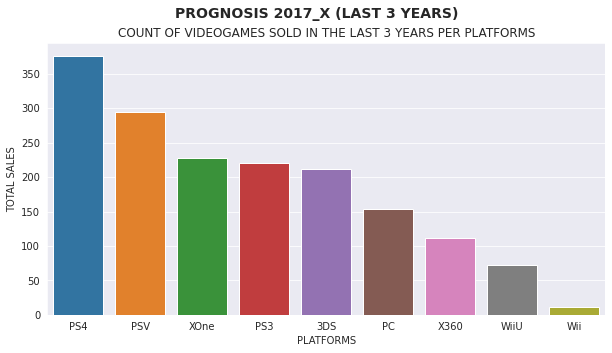

In [80]:
#Looking at every platform sold in the last three years. Determining wich are leading sales.
prognosis_x_platforms = Counter(prognosis_2017_x['platform'].tolist()).most_common(9)
platform_name_prog = [name[0] for name in prognosis_x_platforms]
platform_counts_prog = [name[1] for name in prognosis_x_platforms]

fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x=platform_name_prog,y=platform_counts_prog,ax=ax)
plt.suptitle('PROGNOSIS 2017_X (LAST 3 YEARS)', size=14, weight='bold')
plt.title('COUNT OF VIDEOGAMES SOLD IN THE LAST 3 YEARS PER PLATFORMS')
plt.xlabel('PLATFORMS')
plt.ylabel('TOTAL SALES')
plt.show()

COUNT OF VIDEOGAMES SOLD IN THE LAST 3 YEARS PER PLATFORMS
- PS4 is the absolute leader of sales, in the last 3 years.
- Following we have XOne and PS3 in the top 3.

DIFFERENCE BETWEEN PROGNOSIS:
- As we can see the main differences between the two prognosis is the advent of PS4 and XOne
- Now they are the leaders of the market replacing PS3 and X360.

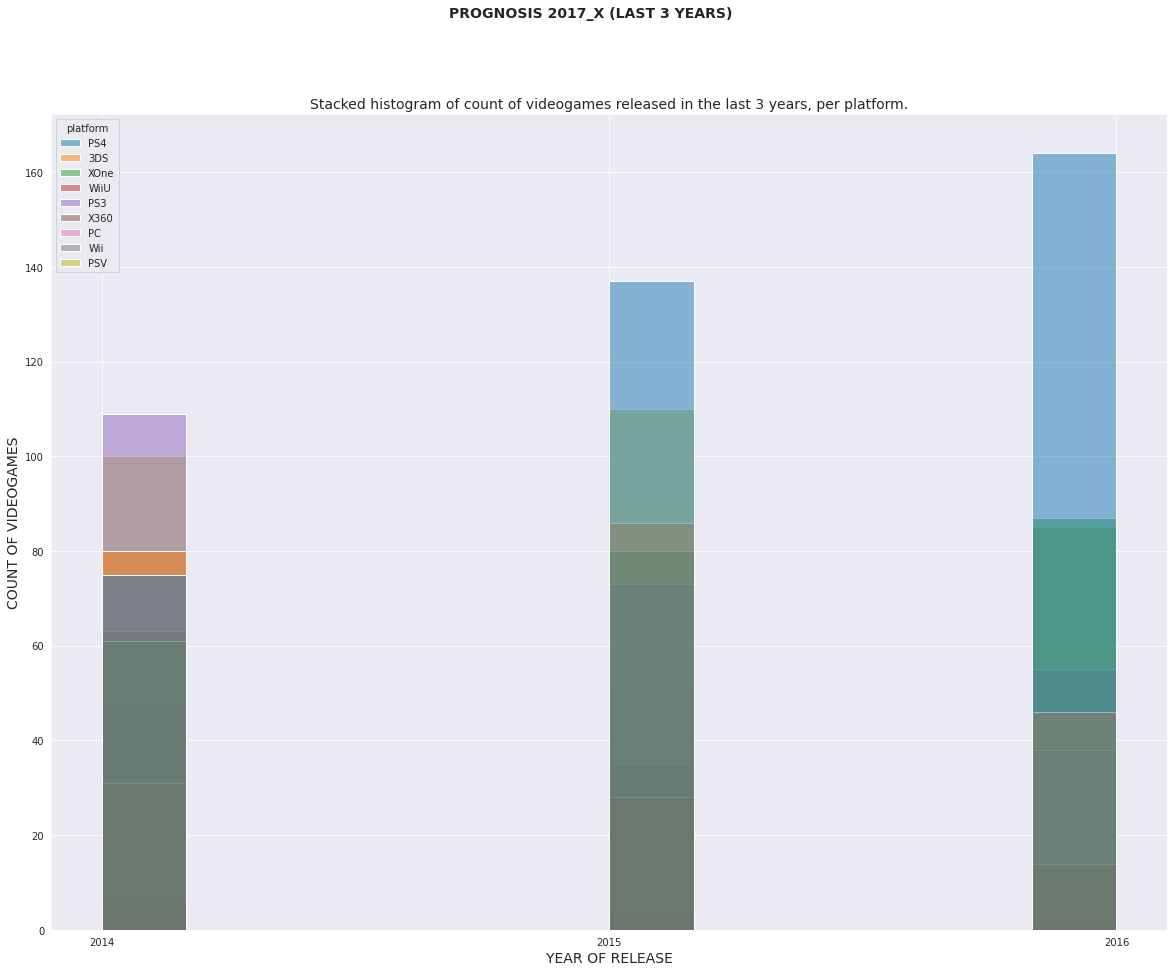

In [81]:
import matplotlib.ticker
#Plotting histogram of the prognosis_2017_x database. (last 3 years)
plt.figure(figsize=(20,15))
plt.suptitle('PROGNOSIS 2017_X (LAST 3 YEARS)', size=14, weight='bold')
plt.title('Stacked histogram of count of videogames released in the last 3 years, per platform.', size=14)
sns.set_style('darkgrid')
sns.histplot(x='year_of_release', data= prognosis_2017_x, hue='platform')
plt.xlabel('YEAR OF RELEASE', size=14)
plt.ylabel('COUNT OF VIDEOGAMES',  size=14)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

COUNT OF VIDEOGAMES RELEASED IN THE LAST 3 YEARS PER PLATFORMS. STACKED HISTOGRAM
- PS3 leads the 2014.
- While PS4 leads the 2015 and 2016 market.

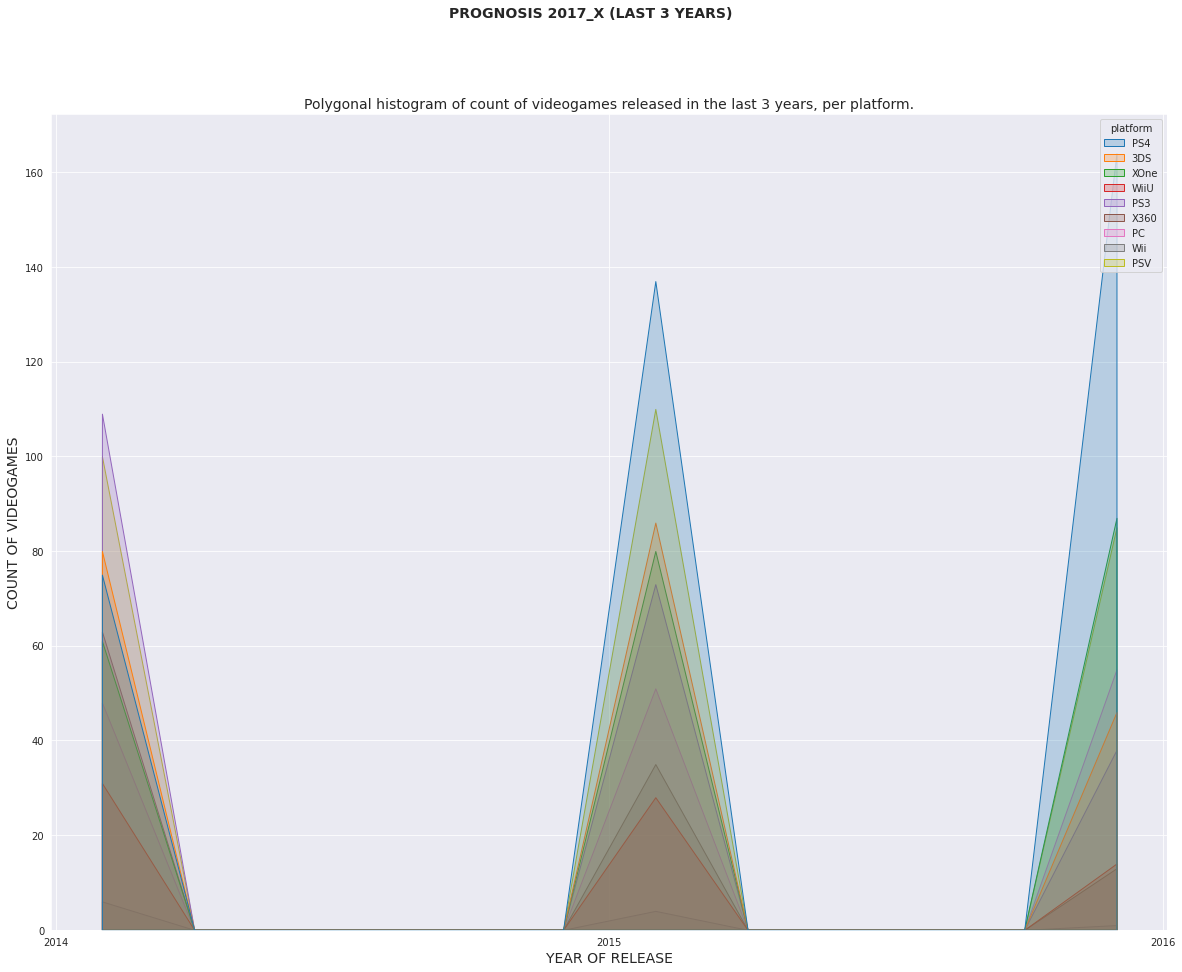

In [82]:
#Histogram with polygonal figures of prognosis_2017_x (last 3 years)
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
sns.histplot(x='year_of_release', data= prognosis_2017_x, hue='platform', element='poly')
plt.suptitle('PROGNOSIS 2017_X (LAST 3 YEARS)', size=14, weight='bold')
plt.title('Polygonal histogram of count of videogames released in the last 3 years, per platform.', size=14)
plt.xlabel('YEAR OF RELEASE', size=14)
plt.ylabel('COUNT OF VIDEOGAMES',  size=14)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

COUNT OF VIDEOGAMES RELEASED IN THE LAST 3 YEARS PER PLATFORMS. POLYGONAL HISTOGRAM.
- PS3 leads the 2014.
- While PS4 leads the 2015 and 2016 market.

In [83]:
#Plotting histograms for each platform. Break down by year of release and total sales. (9 hist in total).
#Creating datasets to store videogames sold for each platform in last 6 years.
ps3_prog_x = prognosis_2017_x.query('platform == "PS3"')
three_ds_prog_x = prognosis_2017_x.query('platform == "3DS"')
x360_prog_x = prognosis_2017_x.query('platform == "X360"')
psv_prog_x = prognosis_2017_x.query('platform == "PSV"')
pc_prog_x = prognosis_2017_x.query('platform == "PC"')
ps4_prog_x = prognosis_2017_x.query('platform == "PS4"')
xone_prog_x = prognosis_2017_x.query('platform == "XOne"')
wii_prog_x = prognosis_2017_x.query('platform == "Wii"')
wiiu_prog_x = prognosis_2017_x.query('platform == "WiiU"')

PROGNOSIS 2017_X (LAST 3 YEARS)


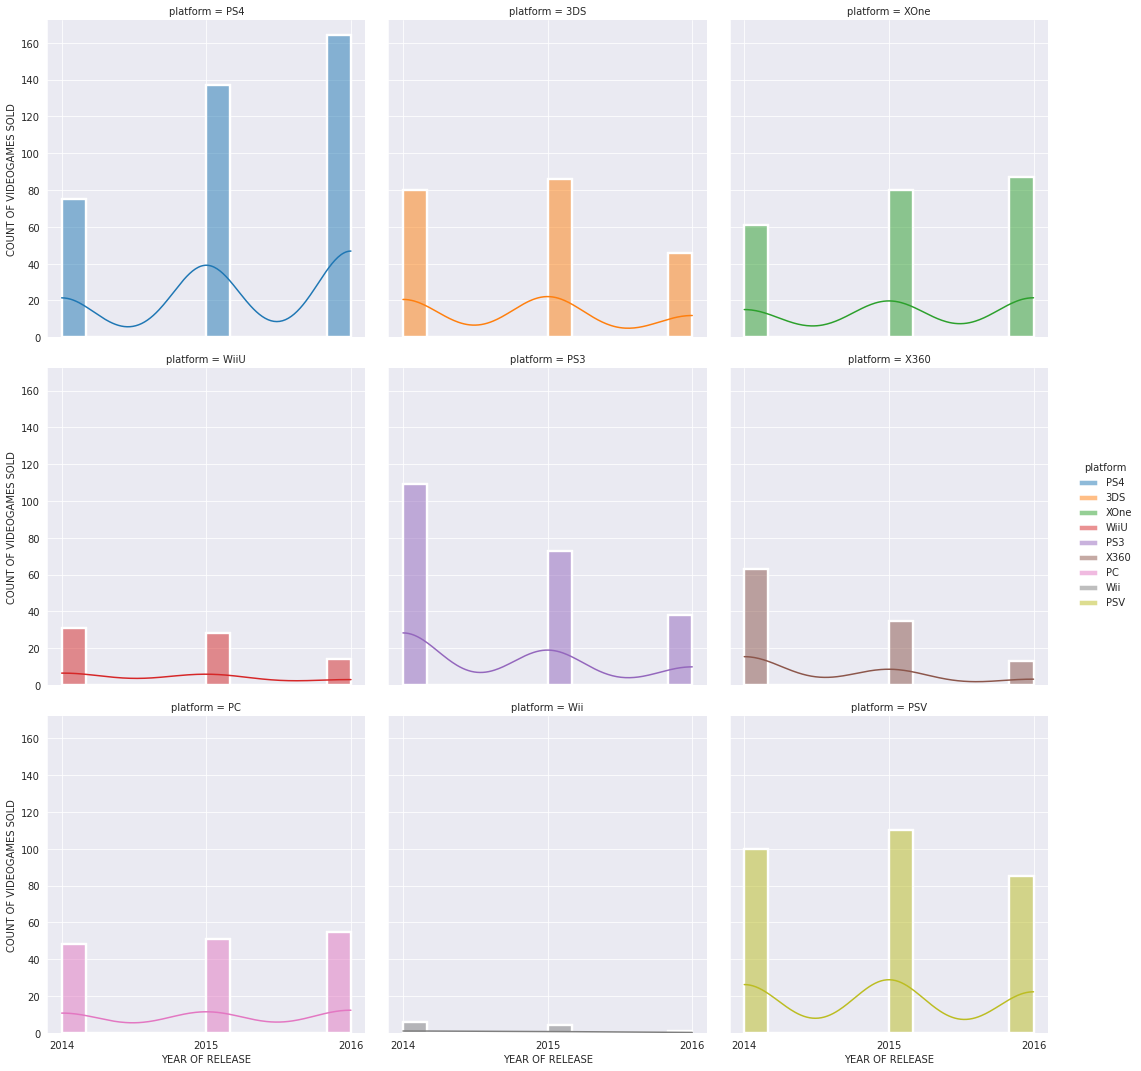

In [84]:
#Representing distribution plot for each platform about the solds in the last six years.
print('PROGNOSIS 2017_X (LAST 3 YEARS)')
displot_x = sns.displot(x='year_of_release', data=prognosis_2017_x, hue='platform', col='platform', col_wrap = 3, kde=True, lw=2.5)
displot_x.set_xlabels('YEAR OF RELEASE')
displot_x.set_ylabels('COUNT OF VIDEOGAMES SOLD')
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

DISPLOT OF PLATFORM PER YEAR. LAST 3 YEARS.
- PS4,and XOne have a positive trend 
- PSV and PC a stable trend.
- PS3, XBOX 360, 3DS, Wii, WiiU and PCs have a negative trend.

In [85]:
#Showing the skews of each platform for prognosis_2017_x (last 3 years)
print('PROGNOSIS 2017_X (LAST 3 YEARS)')
print('')
print('')
print("The Skewness of distribution plot for the PS3 is: %f" % ps3_prog_x['year_of_release'].skew())
print("The Skewness of distribution plot for the XBOX 360 is: %f" % x360_prog_x['year_of_release'].skew())
print("The Skewness of distribution plot for the PS4 is: %f" % ps4_prog_x['year_of_release'].skew())
print("The Skewness of distribution plot for the 3DS is: %f" % three_ds_prog_x['year_of_release'].skew())
print("The Skewness of distribution plot for the Wii is: %f" % wii_prog_x['year_of_release'].skew())
print("The Skewness of distribution plot for the XBOX ONE is: %f" % xone_prog_x['year_of_release'].skew())
print("The Skewness of distribution plot for the WiiU is: %f" % wiiu_prog_x['year_of_release'].skew())
print("The Skewness of distribution plot for the PC is: %f" % pc_prog_x['year_of_release'].skew())
print("The Skewness of distribution plot for the PS Vita is: %f" % psv_prog_x['year_of_release'].skew())
print('')
print('POSITIVE VALUES == RIGHT SKEWED (NEGATIVE TREND)')
print('NEGATIVE VALUES == LEFT SKEWED (POSITIVE TREND)')
print('')
print('In the last three years PS3, XBOX 360, 3DS, Wii, WiiU and PS Vita, have a negative trend.')
print('While PS4, XBOX ONE AND PC have a positive trend.')
print('')
print('The noticeble difference we see between the two prognosis is that considering only the last 3 years')
print('PC has a positive trend while PS Vita is in decline.')

PROGNOSIS 2017_X (LAST 3 YEARS)


The Skewness of distribution plot for the PS3 is: 0.610807
The Skewness of distribution plot for the XBOX 360 is: 0.885206
The Skewness of distribution plot for the PS4 is: -0.428081
The Skewness of distribution plot for the 3DS is: 0.275589
The Skewness of distribution plot for the Wii is: 0.932331
The Skewness of distribution plot for the XBOX ONE is: -0.208465
The Skewness of distribution plot for the WiiU is: 0.417910
The Skewness of distribution plot for the PC is: -0.084509
The Skewness of distribution plot for the PS Vita is: 0.090730

POSITIVE VALUES == RIGHT SKEWED (NEGATIVE TREND)
NEGATIVE VALUES == LEFT SKEWED (POSITIVE TREND)

In the last three years PS3, XBOX 360, 3DS, Wii, WiiU and PS Vita, have a negative trend.
While PS4, XBOX ONE AND PC have a positive trend.

The noticeble difference we see between the two prognosis is that considering only the last 3 years
PC has a positive trend while PS Vita is in decline.


PROGNOSIS 2017_X (LAST 3 YEARS)
Total sales linearplot per years of release per platforms.


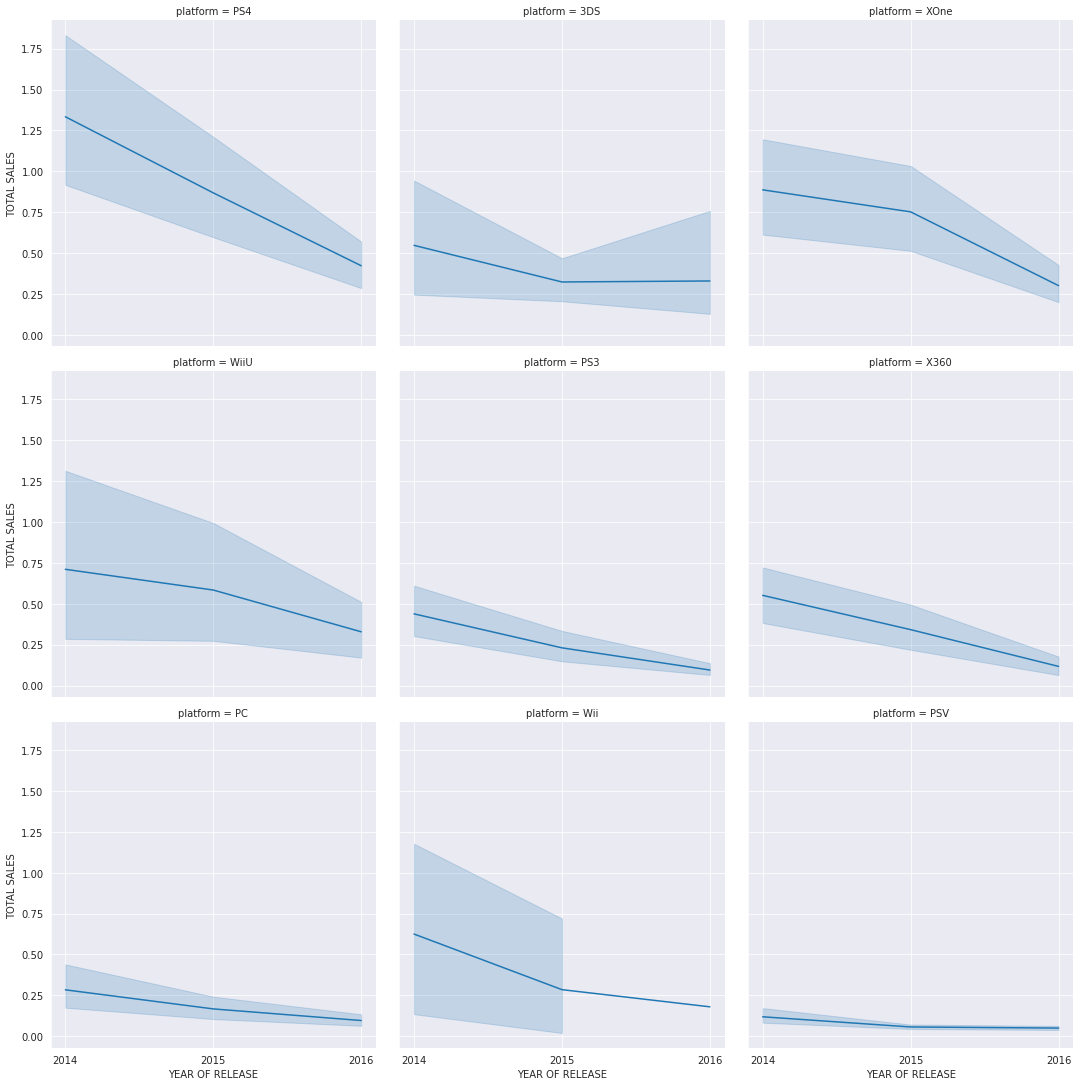

In [86]:
#Plotting linear graphs of the total sales in years per platforms.
print('PROGNOSIS 2017_X (LAST 3 YEARS)')
print('Total sales linearplot per years of release per platforms.')
relplot = sns.relplot(x='year_of_release', y='total_sales', data=prognosis_2017_x, kind='line', col='platform', col_wrap=3)
relplot.set_xlabels('YEAR OF RELEASE')
relplot.set_ylabels('TOTAL SALES')
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

LINEAR PLOT OF TOTAL SALES PER YEAR OF RELEASE PER PLATFORMS. LAST 3 YEARS

PROGNOSIS 2017_X (LAST 3 YEARS)
Total sales per years of release scatterplot per platforms.


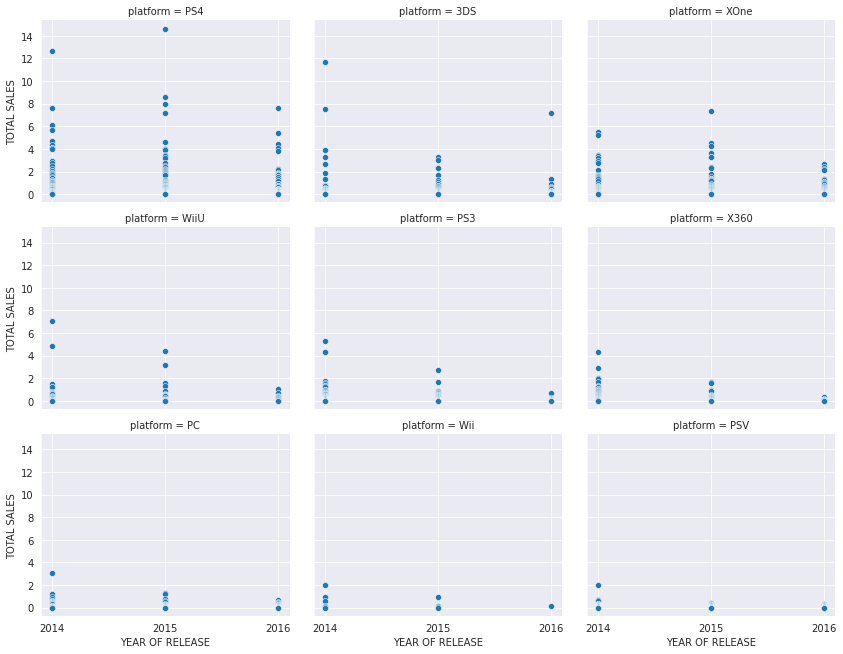

In [87]:
#Building scatterplots from the data.
print('PROGNOSIS 2017_X (LAST 3 YEARS)')
print('Total sales per years of release scatterplot per platforms.')
scatterplots_x = sns.FacetGrid(prognosis_2017_x, col='platform', col_wrap=3, aspect=1.3)
scatterplots_x.map_dataframe(sns.scatterplot, x='year_of_release', y='total_sales')
scatterplots_x.set_axis_labels('YEAR OF RELEASE', 'TOTAL SALES')
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

SCATTER PLOT OF TOTAL SALES PER YEAR OF RELEASE. LAST 3 YEARS.

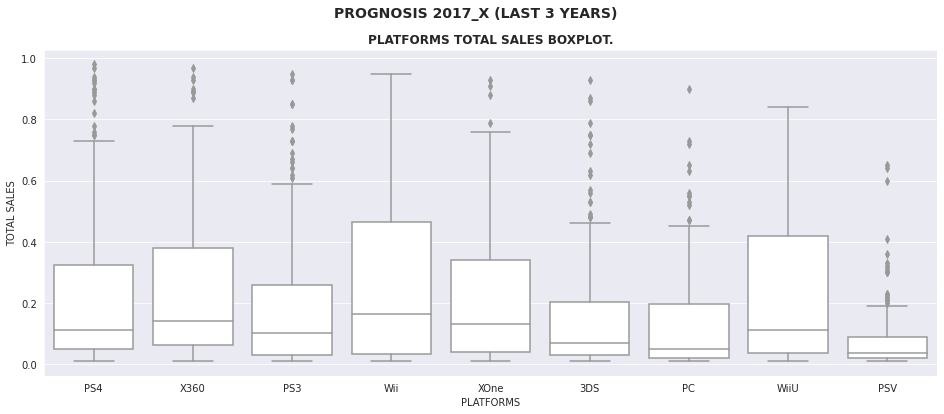

In [88]:
#Building boxplots to show total sales divided by year of release per platforms.
prognosis_2017_x_boxplot = prognosis_2017_x.query('total_sales < 1')
plt.figure(figsize = (16,6))
sns.boxplot(data = prognosis_2017_x_boxplot, x = 'platform', y = 'total_sales', color='white')
plt.suptitle('PROGNOSIS 2017_X (LAST 3 YEARS)', size=14, weight='bold')
plt.title('PLATFORMS TOTAL SALES BOXPLOT.', weight='bold')
plt.xlabel('PLATFORMS')
plt.ylabel('TOTAL SALES')
plt.show()

TOTAL SALES PER PLATFORMS. BOXPLOT. (LAST 3 YEARS)
- X360, Wii and WiiU have thehigher median sales among platforms.
- PSV the lowest one.

In [89]:
grouped_prog_x = prognosis_2017_x.groupby('platform')['total_sales'].median()
print('Median of sales per platforms last 3 years.')
print('')
display(grouped_prog_x)

Median of sales per platforms last 3 years.



platform
3DS     0.090
PC      0.060
PS3     0.110
PS4     0.185
PSV     0.040
Wii     0.180
WiiU    0.190
X360    0.180
XOne    0.205
Name: total_sales, dtype: float64

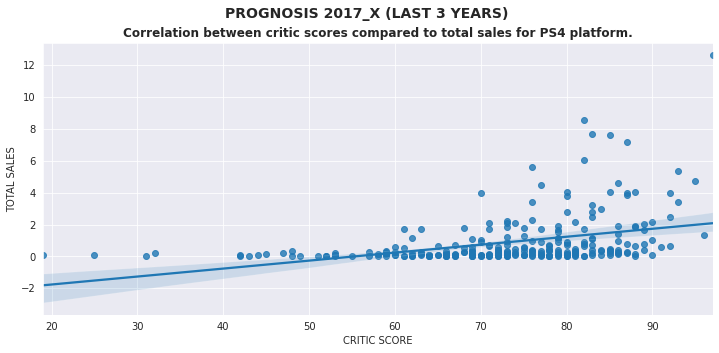

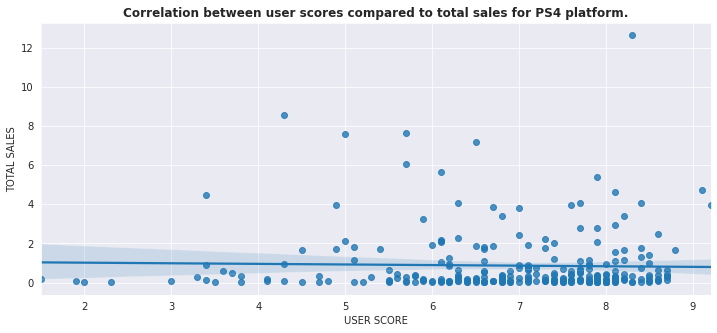

In [90]:
#Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. 
#Since the much profitable platform was PS4 in those 3 years, I am going to analyze this one.
plt.figure(figsize=(12,5))
plt.suptitle('PROGNOSIS 2017_X (LAST 3 YEARS)', size=14, weight='bold')
sns.regplot( x = 'critic_score', y='total_sales', data=ps4_prog_x)
plt.title('Correlation between critic scores compared to total sales for PS4 platform.', size=12, weight='bold')
plt.xlabel('CRITIC SCORE')
plt.ylabel('TOTAL SALES')
plt.show()
plt.figure(figsize=(12,5))
sns.regplot( x = 'user_score', y='total_sales', data=ps4_prog_x)
plt.title('Correlation between user scores compared to total sales for PS4 platform.', size=12, weight='bold')
plt.xlabel('USER SCORE')
plt.ylabel('TOTAL SALES')
plt.show()

CORRELATION BETWEEN CRITIC SCORE & USER SCORE TO TOTAL SALES. PS4 PLATFORM. LAST 3 YEARS.
- Critic score and total sales are directly and positively correlated.
- User score and total sales are correlated if you look at the concentration of values, but many games with low user scores have   high total sales the same.

In [91]:
#Compare sales of the same games broken down by platforms.

games_on_platforms_x = prognosis_2017_x.groupby(['name', 'platform'])['total_sales'].agg({'sum'})

display(games_on_platforms_x)

games_on_platforms_x = games_on_platforms_x.reset_index()

games_on_platforms_count_plat_x = games_on_platforms_x.groupby('name').count()
games_on_platforms_count_plat_x = games_on_platforms_count_plat_x.drop(columns='sum')
games_on_platforms_count_plat_x.columns= ['count_platforms']
games_on_platforms_count_plat_x.reset_index()
display(games_on_platforms_count_plat_x)

games_on_platforms_x = games_on_platforms_x.merge(games_on_platforms_count_plat_x, on='name')

display(games_on_platforms_x)

sum
name                        platform      
 Beyblade Burst             3DS       0.03
 Fire Emblem Fates          3DS       1.67
 Haikyu!! Cross Team Match! 3DS       0.04
12-Sai. Honto no Kimochi    3DS       0.07
12-Sai. Koisuru Diary       3DS       0.05
...                                    ...
ZombiU                      XOne      0.01
Zombie Army Trilogy         PS4       0.20
                            XOne      0.11
htoL#NiQ: The Firefly Diary PSV       0.01
inFAMOUS: Second Son        PS4       2.79

[1680 rows x 1 columns]

,count_platforms
name,
Beyblade Burst,1
Fire Emblem Fates,1
Haikyu!! Cross Team Match!,1
12-Sai. Honto no Kimochi,1
12-Sai. Koisuru Diary,1
...,...
Zettai Kaikyuu Gakuen: Eden with Roses and Phantasm,1
ZombiU,2
Zombie Army Trilogy,2


,name,platform,sum,count_platforms
0,Beyblade Burst,3DS,0.03,1
1,Fire Emblem Fates,3DS,1.67,1
2,Haikyu!! Cross Team Match!,3DS,0.04,1
3,12-Sai. Honto no Kimochi,3DS,0.07,1
4,12-Sai. Koisuru Diary,3DS,0.05,1
...,...,...,...,...
1675,ZombiU,XOne,0.01,2
1676,Zombie Army Trilogy,PS4,0.20,2
1677,Zombie Army Trilogy,XOne,0.11,2
1678,htoL#NiQ: The Firefly Diary,PSV,0.01,1


In [92]:
games_on_more_platforms_x = (games_on_platforms_x.query('count_platforms > 1'))

print('The number of unique games in the dateset is:', games_on_more_platforms_x['name'].nunique())

games_on_more_platforms_x.columns=(['name','platform','total_sales','platforms_count'])
      
display(games_on_more_platforms_x)

print(games_on_more_platforms_x.query('name == "Grand Theft Auto V"'))

The number of unique games in the dateset is: 366


,name,platform,total_sales,platforms_count
5,2014 FIFA World Cup Brazil,PS3,0.61,2
6,2014 FIFA World Cup Brazil,X360,0.43,2
8,3rd Super Robot Wars Z Jigoku Hen,PS3,0.23,2
9,3rd Super Robot Wars Z Jigoku Hen,PSV,0.19,2
10,3rd Super Robot Wars Z: Tengoku-Hen,PS3,0.15,2
...,...,...,...,...
1672,Zero Escape: Zero Time Dilemma,PSV,0.06,2
1674,ZombiU,PS4,0.06,2
1675,ZombiU,XOne,0.01,2
1676,Zombie Army Trilogy,PS4,0.20,2


                   name platform  total_sales  platforms_count
549  Grand Theft Auto V       PC         1.17                3
550  Grand Theft Auto V      PS4        12.62                3
551  Grand Theft Auto V     XOne         5.47                3


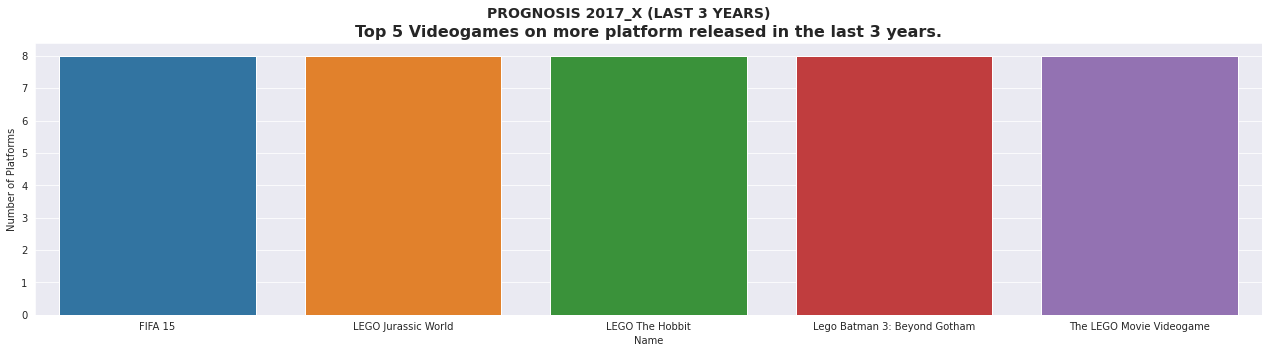

In [93]:
#Looking at top 5 videogames sold on more platforms in prognosis_2017_x (last 3 years)
top_5_games_prog_x = Counter(games_on_more_platforms_x['name'].tolist()).most_common(5)
videogame_name_x = [name[0] for name in top_5_games_prog_x]
platform_counts_x = [name[1] for name in top_5_games_prog_x]

fig,ax = plt.subplots(figsize=(22,5))
sns.barplot(x=videogame_name_x,y=platform_counts_x,ax=ax)
plt.suptitle('PROGNOSIS 2017_X (LAST 3 YEARS)', size=14, weight='bold')
plt.title('Top 5 Videogames on more platform released in the last 3 years.', size=16, weight='bold')
plt.xlabel('Name')
plt.ylabel('Number of Platforms')
plt.show()

TOP 5 VIDEOGAMES RELEASED IN THE LAST 3 YEARS ON MORE PLATFORMS.

In [94]:
print(games_on_more_platforms_x.query('name == "FIFA 15"'))
print(games_on_more_platforms_x.query('name == "LEGO Jurassic World"'))
print(games_on_more_platforms_x.query('name == "Lego Batman 3: Beyond Gotham"'))
print(games_on_more_platforms_x.query('name == "The LEGO Movie Videogame"'))

        name platform  total_sales  platforms_count
432  FIFA 15      3DS         0.46                8
433  FIFA 15       PC         0.29                8
434  FIFA 15      PS3         4.28                8
435  FIFA 15      PS4         6.08                8
436  FIFA 15      PSV         0.60                8
437  FIFA 15      Wii         0.56                8
438  FIFA 15     X360         2.92                8
439  FIFA 15     XOne         2.18                8
                    name platform  total_sales  platforms_count
710  LEGO Jurassic World      3DS         0.62                8
711  LEGO Jurassic World       PC         0.04                8
712  LEGO Jurassic World      PS3         0.85                8
713  LEGO Jurassic World      PS4         0.90                8
714  LEGO Jurassic World      PSV         0.23                8
715  LEGO Jurassic World     WiiU         0.52                8
716  LEGO Jurassic World     X360         0.87                8
717  LEGO Jurassic W

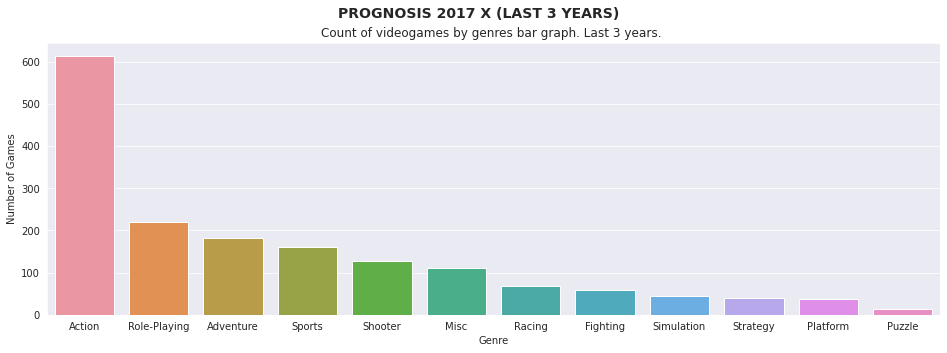

In [95]:
genre_x = Counter(prognosis_2017_x['genre'].tolist()).most_common(12)
genre_name_x = [name[0] for name in genre_x]
genre_counts_x = [name[1] for name in genre_x]

fig,ax = plt.subplots(figsize=(16,5))
sns.barplot(x=genre_name_x,y=genre_counts_x,ax=ax)
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS)', size = 14, weight = 'bold')
plt.title('Count of videogames by genres bar graph. Last 3 years. ')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

COUNT OF VIDEOGAMES BY GENRES. LAST 3 YEARS.
- Action genre was released 600 time in the 3 years.
- Role-Playing and Adventure are on second/third position

Total_sales grouped by genre:
The five largest values are:
genre
Action          199.51
Shooter         170.94
Sports          109.39
Role-Playing    101.44
Misc             37.53
Name: total_sales, dtype: float64




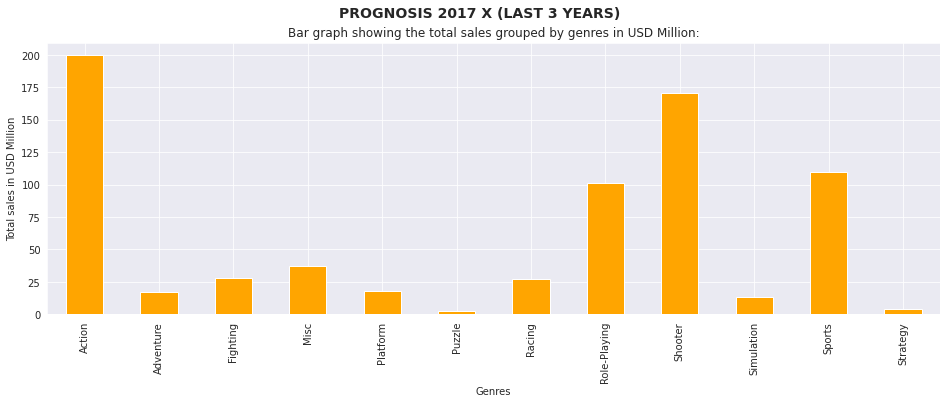

In [96]:
print('Total_sales grouped by genre:')
total_sales_bar_prog_x = (prognosis_2017_x.groupby('genre')['total_sales'].sum())
print('The five largest values are:')
print(total_sales_bar_prog_x.nlargest(5))
print('')
print('')
plt.figure(figsize=(16,5))
total_sales_bar_prog_x.plot(kind='bar', color='orange')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS)', size=14, weight='bold')
plt.title('Bar graph showing the total sales grouped by genres in USD Million:')
plt.xlabel('Genres')
plt.ylabel('Total sales in USD Million')
plt.show()

TOTAL VIDEOGAMES SALES GROUPED BY GENRES. LAST 3 YEARS.
- Action genre earned 200 USD Millions in the last 3 years.
- Shooters attest themself on second position with 170 USD Millions earned.
- Role-Playing on third position.
- Even if Adventure released many games, they did not earned that much.

# Step 3. Analyze the data
# PROGNOSIS X FOR 2017

I decided to built my second prognosis for 2017, I choose to include in this dataset all the platforms that had at least one sell in 2016 and removed all the records within 3 years. To better say, I left all the records from 2014 to 2016 for each platforms still sold. The resulting database is composed by 1680 records.

WICH ONE ARE LEADING SALES?
FIRST BAR GRAPH:
- PS4 leads sales of the last 3 years. Following we have PSV and XOne.
SECOND BAR GRAPH (COMPLEX BAR GRAPH):
- Here is easely possible understand that PS3 ruled the market till 2014, in 2015 and 2016 PS4 does.
THIRD BAR GRAPH (POLYGONAL):
- Same as descript before in polygonal form.
FOURTH GRAPH (DISPLOT ABOUT PLATFORMS IN LAST 3 YEARS):
- Here is really easy to understand that XBOX 360 (0.885206), Wii (0.932331), WiiU (0.417910), 3DS (0.275589), PS3 (0.610807) have a negative trend compared to PC (-0.084509) and PSV (0.090730) that have a stable trend, XOne (-0.208465) and PS4(-0.428081), have a positive one.

- POSITIVE VALUES == RIGHT SKEWED (NEGATIVE TREND)
- NEGATIVE VALUES == LEFT SKEWED (POSITIVE TREND)

FIFTH GRAPH (LINEAR PLOT):
- The sales for everyplatform is declining (That's why in 2019/2020 arrived new generation consoles.)

SIXTH GRAPH (SCATTERPLOT FACET GRID):
- A quick look to the general distribution of the data in analysis.

SEVENTH GRAPH (BOX PLOT):
- As we can see: 3DS, Wii and WiiU had the greater medians in total sales.

With those data we can even confirm wath we so in the boxplot (median total_sales)
3DS     0.24
PC      0.10
PS3     0.18
PS4     0.29
PSV     0.11
Wii     0.37
WiiU    0.37
X360    0.23
XOne    0.24

EIGHTH GRAPH (SCATTERPLOT):
- I choose to built the correletion between user and critic score with total sales basing my graphs on PS4 since was the much more profitable platform in the choosed period. As we can see, in critic score we have a direct proportion btw the two values, when there's an higher critic score, sales goes to the stars. For user score we cannot say the same, doesn't look like those values are directly propotional between them.

NINTH GRAPH(TOP 5 VIDEOGAMES ON MORE PLATFORMS):
- Starting from prognosis_2017_x database I obtained only the games counted on many platforms. Since was to me not possible to display a graph with 366 unique values. I decided to investigate only 5 Games: Grand Theft Auto V, FIFA 15, LEGO Jurassic World and LEGO Batman 3:Beyond Gotham and The LEGO Movie Videogame. here there's an example: 

549  Grand Theft Auto V       PC         1.17                3
550  Grand Theft Auto V      PS4        12.62                3
551  Grand Theft Auto V     XOne         5.47                3

- From those values is easy to confirm that PS4 and following XOne leads the sales market.

TENTH GRAPH (BAR GRAPH, COUNT OF VIDEOGAMES BY GENRES, PROGNOSIS 2017 X)
- We can take here a general look to the much attractive genres of the last 3 years. As always, Action leads clearly our chart. Following Sports, Role-Playing and Shooters with Racing on 5 position.

ELEVENTH GRAPH (BAR GRAPH, TOTAL SALES OF VIDEOGAMES BY GENRES, PROGNOSIS 2017 X)
- We can take here a general look to the much profitable genres of the last 3 years. As always, Action leads clearly our chart. Following Shooter, Sports and Role-Playing with Racing on 5 position.

We can confirm the graph looking at the top 5 total sales of prognosis:
Action          485.76
Shooter         358.45
Sports          200.06
Role-Playing    152.36
Platform         81.15

# STEP 4. Create a user profile for each region (Prognosis 2017, last 6 years)

North America sales grouped by platforms:
The five most sold platoforms in North America:
platform
X360    228.89
PS3     169.19
PS4     108.74
XOne     93.12
3DS      83.21
Name: na_sales, dtype: float64

Plotting the graph showing the North America sales grouped by platform in USD Million:



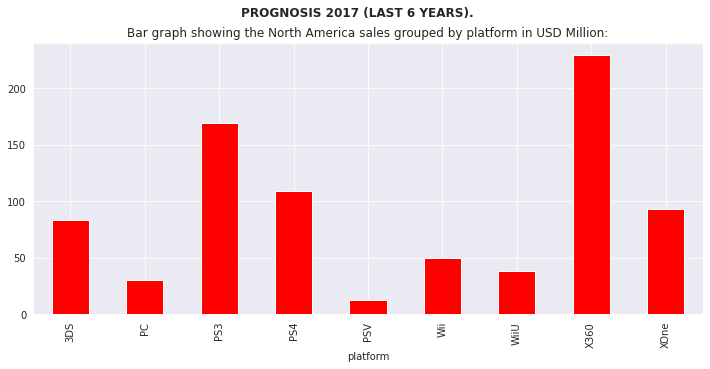

In [97]:
na = prognosis_2017
na = na.drop(columns=['eu_sales','jp_sales','other_sales','total_sales'])
eu = prognosis_2017
eu = eu.drop(columns=['na_sales','jp_sales','other_sales','total_sales'])
jp = prognosis_2017
jp = jp.drop(columns=['eu_sales','na_sales','other_sales','total_sales'])
ot = prognosis_2017
ot = ot.drop(columns=['eu_sales','jp_sales','na_sales','total_sales'])

print('North America sales grouped by platforms:')
na_sales_bar_prog_plat = (na.groupby('platform')['na_sales'].sum())
print('The five most sold platoforms in North America:')
print(na_sales_bar_prog_plat.nlargest(5))
print('')
print('Plotting the graph showing the North America sales grouped by platform in USD Million:')
print('')
plt.figure(figsize=(12,5))
na_sales_bar_prog_plat.plot(kind='bar', color='red')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS).', weight='bold')
plt.title('Bar graph showing the North America sales grouped by platform in USD Million:')
plt.show()

NORTH AMERICA TOTAL SALES GROUPED BY PLATFORM (LAST 6 YEARS.)

Europe sales grouped by genre:
The five most sold platform in Europe:
platform
PS3     164.65
PS4     141.09
X360    118.22
3DS      61.48
PC       57.66
Name: eu_sales, dtype: float64

Plotting the graph showing the Europa sales grouped by platform in USD Million:



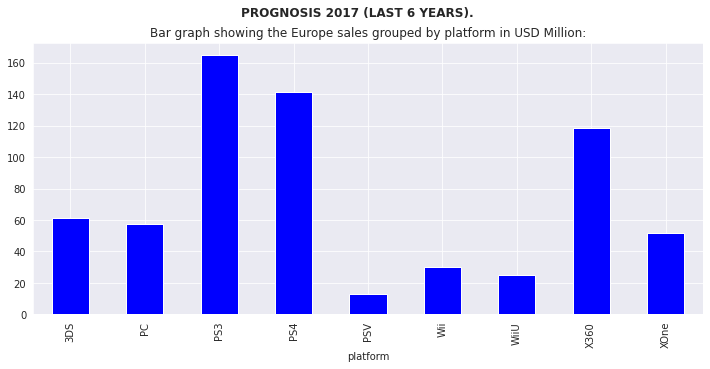

In [98]:
print('Europe sales grouped by platforms:')
eu_sales_bar_prog_plat = (eu.groupby('platform')['eu_sales'].sum())
print('The five most sold platform in Europe:')
print(eu_sales_bar_prog_plat.nlargest(5))
print('')
print('Plotting the graph showing the Europa sales grouped by platform in USD Million:')
print('')
plt.figure(figsize=(12,5))
eu_sales_bar_prog_plat.plot(kind='bar', color='blue')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS).', weight='bold')
plt.title('Bar graph showing the Europe sales grouped by platform in USD Million:')
plt.show()

EUROPA TOTAL SALES GROUPED BY PLATFORM (LAST 6 YEARS.)

Japan sales grouped by genre:
The five most sold platforms in Japan:
platform
3DS     100.65
PS3      49.44
PSV      21.84
PS4      15.96
WiiU     13.01
Name: jp_sales, dtype: float64

Plotting the graph showing the Japan sales grouped by platform in USD Million:



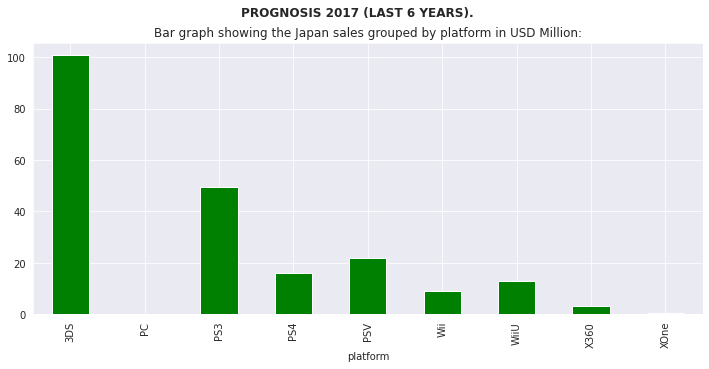

In [99]:
print('Japan sales grouped by platforms:')
jp_sales_bar_prog_plat = (jp.groupby('platform')['jp_sales'].sum())
print('The five most sold platforms in Japan:')
print(jp_sales_bar_prog_plat.nlargest(5))
print('')
print('Plotting the graph showing the Japan sales grouped by platform in USD Million:')
print('')
plt.figure(figsize=(12,5))
jp_sales_bar_prog_plat.plot(kind='bar', color='green')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS).', weight='bold')
plt.title('Bar graph showing the Japan sales grouped by platform in USD Million:')
plt.show()

JAPAN TOTAL SALES GROUPED BY PLATFORM (LAST 6 YEARS.)

"Rest of the world" sales grouped by genre:
The five most sold platforms in the rest of the world:
platform
PS3     65.36
PS4     48.35
X360    33.46
XOne    14.27
3DS     13.34
Name: other_sales, dtype: float64



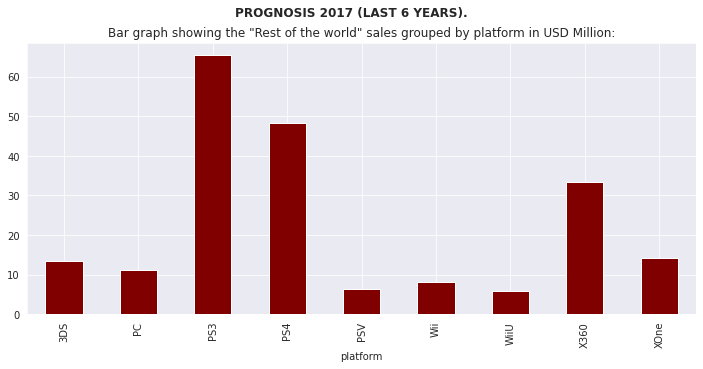

In [100]:
print('"Rest of the world" sales grouped by platforms:')
ot_sales_bar_prog_plat = (ot.groupby('platform')['other_sales'].sum())
print('The five most sold platforms in the rest of the world:')
print(ot_sales_bar_prog_plat.nlargest(5))
print('')
plt.figure(figsize=(12,5))
ot_sales_bar_prog_plat.plot(kind='bar', color='maroon')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS).', weight='bold')
plt.title('Bar graph showing the "Rest of the world" sales grouped by platform in USD Million:')
plt.show()

REST OF THE WORLD TOTAL SALES GROUPED BY PLATFORM (LAST 6 YEARS.)

Total_sales grouped by genre:
The five most sold generes in North America:
genre
Action          229.05
Shooter         194.37
Sports          107.48
Role-Playing     80.17
Misc             66.53
Name: na_sales, dtype: float64

Plotting the graph showing the North America sales grouped by genres in USD Million:



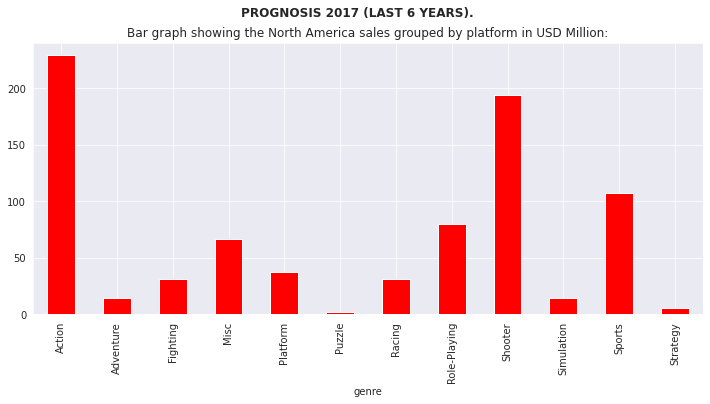

In [101]:
print('Total_sales grouped by genre:')
na_sales_bar_prog_genres = (na.groupby('genre')['na_sales'].sum())
print('The five most sold generes in North America:')
print(na_sales_bar_prog_genres.nlargest(5))
print('')
print('Plotting the graph showing the North America sales grouped by genres in USD Million:')
print('')
plt.figure(figsize=(12,5))
na_sales_bar_prog_genres.plot(kind='bar', color='red')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS).', weight='bold')
plt.title('Bar graph showing the North America sales grouped by platform in USD Million:')
plt.show()

NORTH AMERICA TOTAL SALES GROUPED BY GENRE (LAST 6 YEARS.)

Total_sales grouped by genre:
The five most sold generes in Europe:
genre
Action          198.60
Shooter         148.03
Sports           88.12
Role-Playing     60.48
Racing           40.91
Name: eu_sales, dtype: float64

Plotting the graph showing the Europa sales grouped by genres in USD Million:



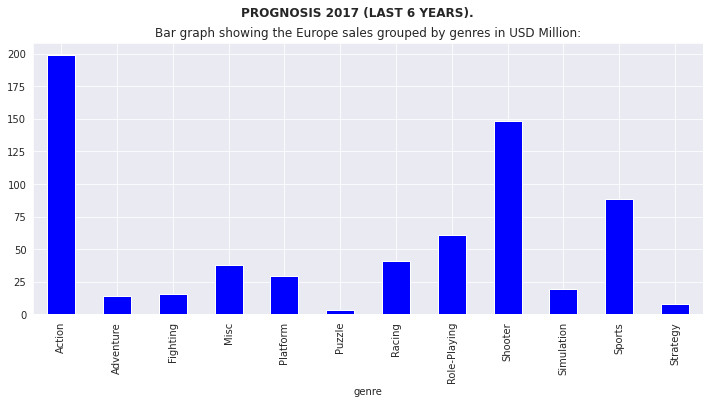

In [102]:
print('Total_sales grouped by genre:')
eu_sales_bar_prog_genres = (eu.groupby('genre')['eu_sales'].sum())
print('The five most sold generes in Europe:')
print(eu_sales_bar_prog_genres.nlargest(5))
print('')
print('Plotting the graph showing the Europa sales grouped by genres in USD Million:')
print('')
plt.figure(figsize=(12,5))
eu_sales_bar_prog_genres.plot(kind='bar', color='blue')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS).', weight='bold')
plt.title('Bar graph showing the Europe sales grouped by genres in USD Million:')
plt.show()

EUROPA TOTAL SALES GROUPED BY GENRE (LAST 6 YEARS.)

Total_sales grouped by genre:
The five most sold generes in Japan:
genre
Role-Playing    67.48
Action          57.85
Misc            14.88
Shooter         11.98
Platform        11.72
Name: jp_sales, dtype: float64



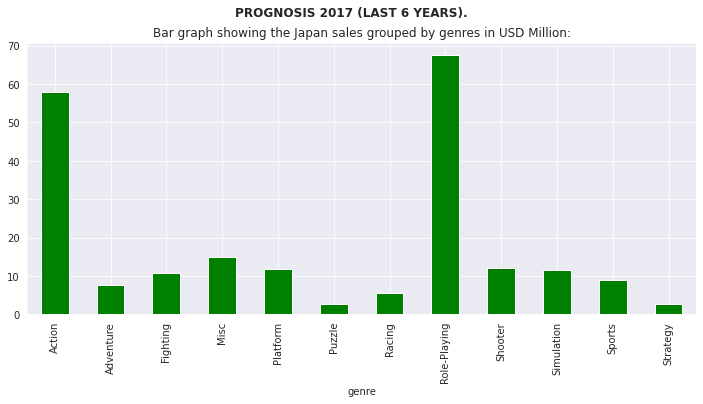

In [103]:
print('Total_sales grouped by genre:')
jp_sales_bar_prog_genres = (jp.groupby('genre')['jp_sales'].sum())
print('The five most sold generes in Japan:')
print(jp_sales_bar_prog_genres.nlargest(5))
print('')
plt.figure(figsize=(12,5))
jp_sales_bar_prog_genres.plot(kind='bar', color='green')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS).', weight='bold')
plt.title('Bar graph showing the Japan sales grouped by genres in USD Million:')
plt.show()

JAPAN TOTAL SALES GROUPED BY GENRE (LAST 6 YEARS.)

Total_sales grouped by genre:
The five most sold generes in the rest of the world:
genre
Action          63.85
Shooter         48.54
Sports          28.54
Role-Playing    19.15
Misc            11.83
Name: other_sales, dtype: float64



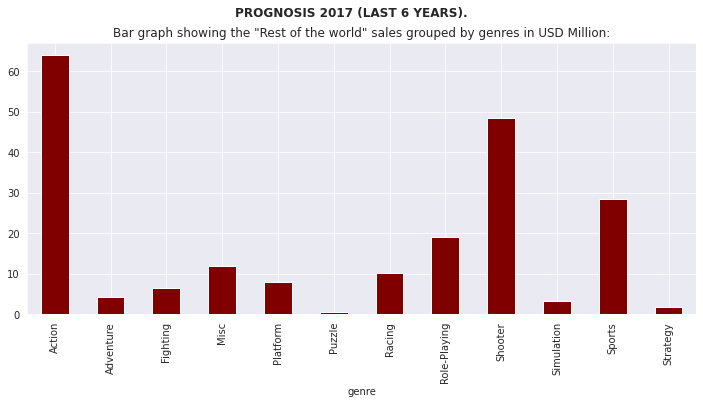

In [104]:
print('Total_sales grouped by genre:')
ot_sales_bar_prog = (ot.groupby('genre')['other_sales'].sum())
print('The five most sold generes in the rest of the world:')
print(ot_sales_bar_prog.nlargest(5))
print('')
plt.figure(figsize=(12,5))
ot_sales_bar_prog.plot(kind='bar', color='maroon')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS).', weight='bold')
plt.title('Bar graph showing the "Rest of the world" sales grouped by genres in USD Million:')
plt.show()

REST OF THE WORLD TOTAL SALES GROUPED BY GENRE (LAST 6 YEARS.)

North America sales grouped by ESBR rating.
The five most sold platoforms in North America:
rating
M       320.25
E       164.54
E10+    118.71
T       116.02
RP        0.00
Name: na_sales, dtype: float64



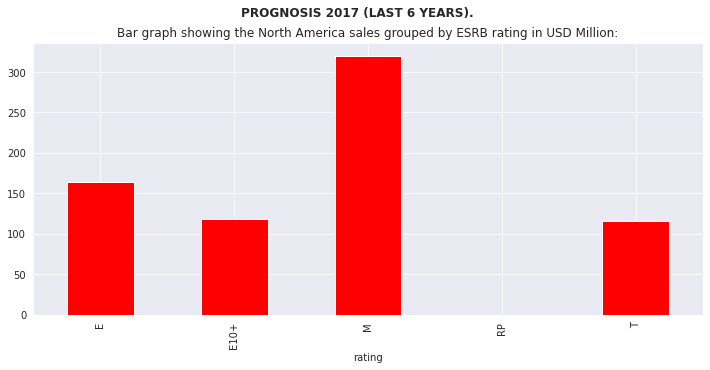

In [105]:
#Do ESRB ratings affect sales in individual regions? (PROGNOSIS 2017)
print('North America sales grouped by ESBR rating.')
na_sales_bar_prog_esrb = (na.groupby('rating')['na_sales'].sum())
print('The five most sold platoforms in North America:')
print(na_sales_bar_prog_esrb.nlargest(5))
print('')
plt.figure(figsize=(12,5))
na_sales_bar_prog_esrb.plot(kind='bar', color='red')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS).', weight='bold')
plt.title('Bar graph showing the North America sales grouped by ESRB rating in USD Million:')
plt.show()

NORTH AMERICA TOTAL SALES GROUPED BY RATING (LAST 6 YEARS.)

Europa sales grouped by ESRB rating.
The five most sold ESBR ratings in Europe:
rating
M       263.57
E       139.94
T        89.08
E10+     80.13
RP        0.07
Name: eu_sales, dtype: float64



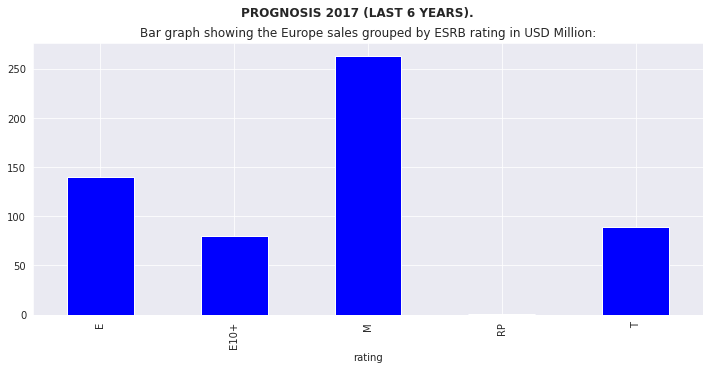

In [106]:
print('Europa sales grouped by ESRB rating.')
eu_sales_bar_esrb = (eu.groupby('rating')['eu_sales'].sum())
print('The five most sold ESBR ratings in Europe:')
print(eu_sales_bar_esrb.nlargest(5))
print('')
plt.figure(figsize=(12,5))
eu_sales_bar_esrb.plot(kind='bar', color='blue')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS).', weight='bold')
plt.title('Bar graph showing the Europe sales grouped by ESRB rating in USD Million:')
plt.show()

EUROPA TOTAL SALES GROUPED BY RATING (LAST 6 YEARS.)

Japan sales grouped by ESRB rating.
The five most sold ESBR rating in Japan:
rating
T       37.37
E       35.98
M       27.18
E10+    11.34
RP       0.00
Name: jp_sales, dtype: float64



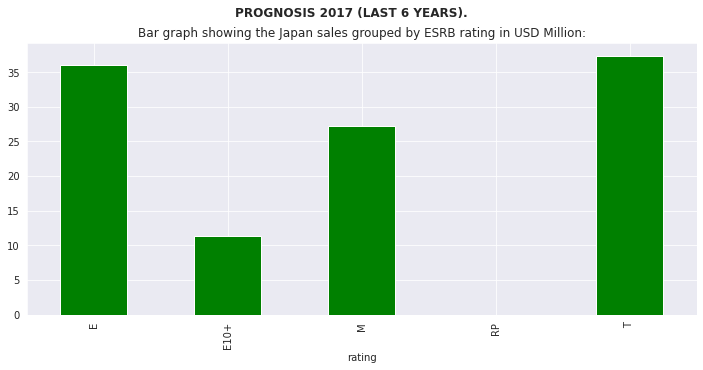

In [107]:
print('Japan sales grouped by ESRB rating.')
jp_sales_bar_esrb = (jp.groupby('rating')['jp_sales'].sum())
print('The five most sold ESBR rating in Japan:')
print(jp_sales_bar_esrb.nlargest(5))
print('')
plt.figure(figsize=(12,5))
jp_sales_bar_esrb.plot(kind='bar', color='green')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS).', weight='bold')
plt.title('Bar graph showing the Japan sales grouped by ESRB rating in USD Million:')
plt.show()

JAPAN TOTAL SALES GROUPED BY RATING (LAST 6 YEARS.)

"Rest of the world" grouped by ESRB rating.
The five most sold ESBR rating in the "Rest of the world":
rating
M       86.12
E       40.10
T       30.24
E10+    24.35
RP       0.01
Name: other_sales, dtype: float64



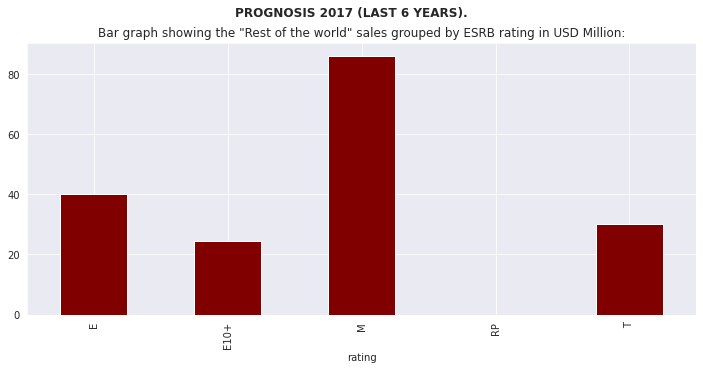

In [108]:
print('"Rest of the world" grouped by ESRB rating.')
ot_sales_bar_esrb = (ot.groupby('rating')['other_sales'].sum())
print('The five most sold ESBR rating in the "Rest of the world":')
print(ot_sales_bar_esrb.nlargest(5))
print('')
plt.figure(figsize=(12,5))
ot_sales_bar_esrb.plot(kind='bar', color='maroon')
plt.suptitle('PROGNOSIS 2017 (LAST 6 YEARS).', weight='bold')
plt.title('Bar graph showing the "Rest of the world" sales grouped by ESRB rating in USD Million:')
plt.show()

REST OF THE WORLD TOTAL SALES GROUPED BY RATING (LAST 6 YEARS.)

# CREATE A USER PROFILE FOR EACH REGIONS. PROGNOSIS 2017

CREATED 4 PROFILES FOR DIFFERENT REGIONS (I choose to add in my analysis even the rest of the world [other_sales]).

Results for PLATFORMS TOP 5:

NA =    X360    228.89
        PS3     169.19
        PS4     108.74
        XOne     93.12
        3DS      83.21
        
EU =    PS3     164.65
        PS4     141.09
        X360    118.22
        3DS      61.48
        PC       57.66 
        
JP =    3DS     100.65
        PS3      49.44
        PSV      21.84
        PS4      15.96
        WiiU     13.01
        
OT =    PS3     65.36
        PS4     48.35
        X360    33.46
        XOne    14.27
        3DS     13.34
        
- It's really easy to notice major differences per area in the world. XBOX leads sales in America, while 3DS does in Japan, for the rest of the world and Europa, PS leads, followed by PS4.

Results for GENRES TOP 5:

NA =    Action          229.05
        Shooter         194.37
        Sports          107.48
        Role-Playing     80.17
        Misc             66.53
        
EU =    Action          198.60
        Shooter         148.03
        Sports           88.12
        Role-Playing     60.48
        Racing           40.91
        
JP =    Role-Playing    67.48
        Action          57.85
        Misc            14.88
        Shooter         11.98
        Platform        11.72         
        
OT =    Action          63.85
        Shooter         48.54
        Sports          28.54
        Role-Playing    19.15
        Misc            11.83
        
- About genres, we see that the whole world has the same tastes for genres, except for Japan, where Role-Playing games leads the   market while shooters are not liked as the rest of the world.

Results for RATINGS TOP 5:

NA =    M       320.25
        E       164.54
        E10+    118.71
        T       116.02
        RP        0.00
        
EU =    M       263.57
        E       139.94
        T        89.08
        E10+     80.13
        RP        0.07
        
JP =    T       37.37
        E       35.98
        M       27.18
        E10+    11.34
        RP       0.00         
        
OT =    M       86.12
        E       40.10
        T       30.24
        E10+    24.35
        RP       0.01
        
- Studying ratings, we can confirm the genres preferences in the world. NA, EU and OT leads by Mature and Everyone, while Japan is lead by Teens games. (Cause obvsly Nintendo is the sales leader in Japan and many Nintendo games are made for teens.

# STEP 4. Create a user profile for each region (Prognosis 2017_x, last 3 years)

North America sales grouped by platforms:
The five most sold platoforms in North America:
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.06
Name: na_sales, dtype: float64



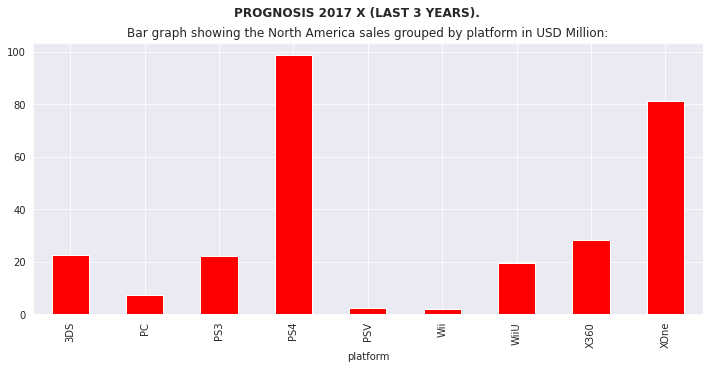

In [109]:
na_x = prognosis_2017_x
na_x = na_x.drop(columns=['eu_sales','jp_sales','other_sales','total_sales'])
eu_x = prognosis_2017_x
eu_x = eu_x.drop(columns=['na_sales','jp_sales','other_sales','total_sales'])
jp_x = prognosis_2017_x
jp_x = jp_x.drop(columns=['eu_sales','na_sales','other_sales','total_sales'])
ot_x = prognosis_2017_x
ot_x = ot_x.drop(columns=['eu_sales','jp_sales','na_sales','total_sales'])

print('North America sales grouped by platforms:')
na_sales_bar_prog_plat_x = (na_x.groupby('platform')['na_sales'].sum())
print('The five most sold platoforms in North America:')
print(na_sales_bar_prog_plat_x.nlargest(5))
print('')
plt.figure(figsize=(12,5))
na_sales_bar_prog_plat_x.plot(kind='bar', color='red')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS).', weight='bold')
plt.title('Bar graph showing the North America sales grouped by platform in USD Million:')
plt.show()

NORTH AMERICA TOTAL SALES GROUPED BY PLATFORM (LAST 3 YEARS.)

Europe sales grouped by genre:
The five most sold platform in Europe:
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       18.27
3DS      16.12
Name: eu_sales, dtype: float64



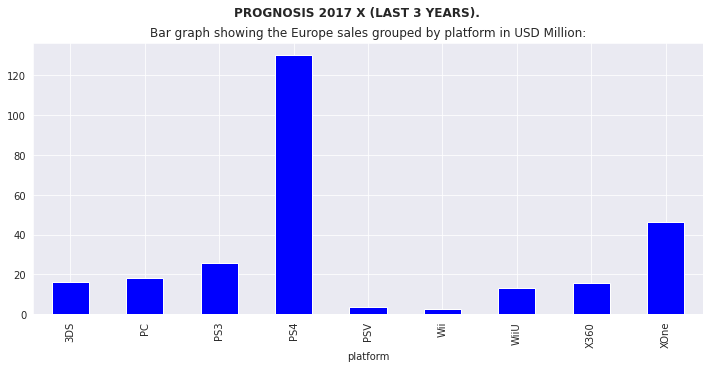

In [110]:
print('Europe sales grouped by genre:')
eu_sales_bar_prog_plat_x = (eu_x.groupby('platform')['eu_sales'].sum())
print('The five most sold platform in Europe:')
print(eu_sales_bar_prog_plat_x.nlargest(5))
print('')
plt.figure(figsize=(12,5))
eu_sales_bar_prog_plat_x.plot(kind='bar', color='blue')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS).', weight='bold')
plt.title('Bar graph showing the Europe sales grouped by platform in USD Million:')
plt.show()

EUROPA TOTAL SALES GROUPED BY PLATFORM (LAST 3 YEARS.)

Japan sales grouped by genre:
The five most sold platforms in Japan:
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

Plotting the graph showing the Japan sales grouped by platform in USD Million:



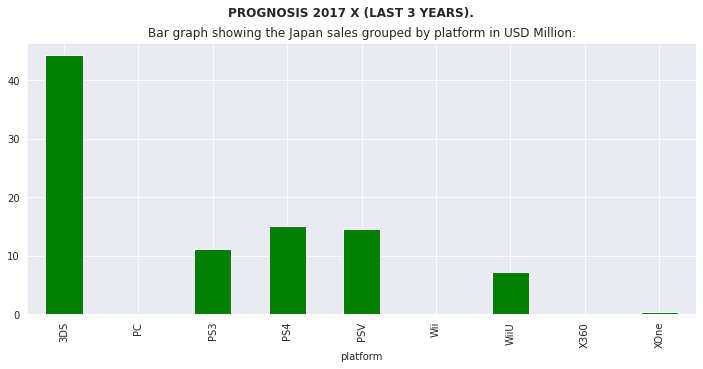

In [111]:
print('Japan sales grouped by genre:')
jp_sales_bar_prog_plat_x = (jp_x.groupby('platform')['jp_sales'].sum())
print('The five most sold platforms in Japan:')
print(jp_sales_bar_prog_plat_x.nlargest(5))
print('')
print('Plotting the graph showing the Japan sales grouped by platform in USD Million:')
print('')
plt.figure(figsize=(12,5))
jp_sales_bar_prog_plat_x.plot(kind='bar', color='green')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS).', weight='bold')
plt.title('Bar graph showing the Japan sales grouped by platform in USD Million:')
plt.show()

JAPAN TOTAL SALES GROUPED BY PLATFORM (LAST 3 YEARS.)

"Rest of the world" sales grouped by genre:
The five most sold platforms in the rest of the world:
platform
PS4     44.48
XOne    12.52
PS3      9.37
X360     4.35
3DS      3.68
Name: other_sales, dtype: float64

Plotting the graph showing the "rest of the world" sales platforms by genres in USD Million:



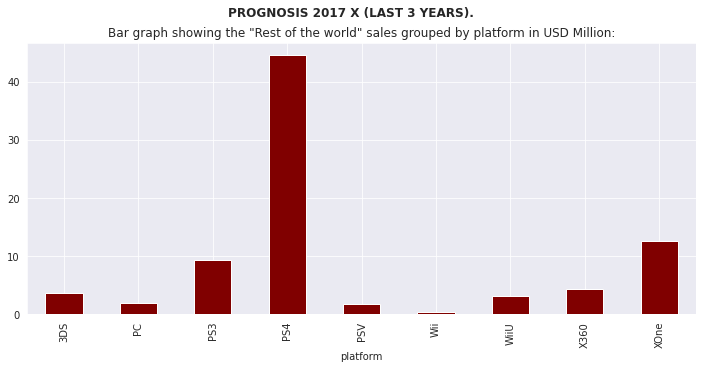

In [112]:
print('"Rest of the world" sales grouped by genre:')
ot_sales_bar_prog_plat_x = (ot_x.groupby('platform')['other_sales'].sum())
print('The five most sold platforms in the rest of the world:')
print(ot_sales_bar_prog_plat_x.nlargest(5))
print('')
print('Plotting the graph showing the "rest of the world" sales platforms by genres in USD Million:')
print('')
plt.figure(figsize=(12,5))
ot_sales_bar_prog_plat_x.plot(kind='bar', color='maroon')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS).', weight='bold')
plt.title('Bar graph showing the "Rest of the world" sales grouped by platform in USD Million:')
plt.show()

REST OF THE WORLD TOTAL SALES GROUPED BY PLATFORM (LAST 3 YEARS.)

Total_sales grouped by genre:
The five most sold generes in North America:
genre
Shooter         79.02
Action          72.59
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64



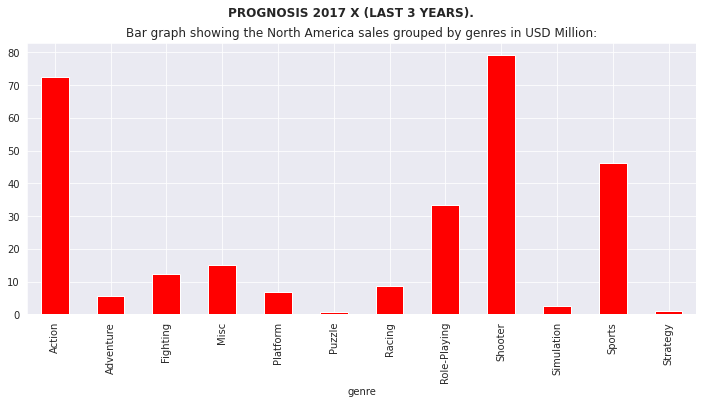

In [113]:
print('Total_sales grouped by genre:')
na_sales_bar_prog_genres_x = (na_x.groupby('genre')['na_sales'].sum())
print('The five most sold generes in North America:')
print(na_sales_bar_prog_genres_x.nlargest(5))
print('')
plt.figure(figsize=(12,5))
na_sales_bar_prog_genres_x.plot(kind='bar', color='red')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS).', weight='bold')
plt.title('Bar graph showing the North America sales grouped by genres in USD Million:')
plt.show()

NORTH AMERICA TOTAL SALES GROUPED BY GENRE (LAST 3 YEARS.)

Total_sales grouped by genre:
The five most sold generes in Europe:
genre
Action          74.93
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

Plotting the graph showing the Europa sales grouped by genres in USD Million:



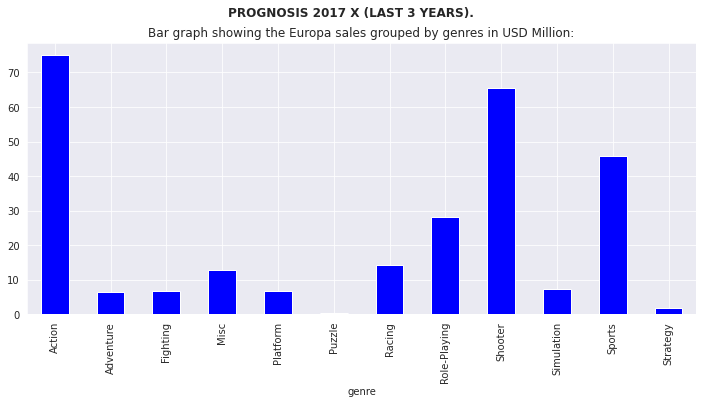

In [114]:
print('Total_sales grouped by genre:')
eu_sales_bar_prog_genres_x = (eu_x.groupby('genre')['eu_sales'].sum())
print('The five most sold generes in Europe:')
print(eu_sales_bar_prog_genres_x.nlargest(5))
print('')
print('Plotting the graph showing the Europa sales grouped by genres in USD Million:')
print('')
plt.figure(figsize=(12,5))
eu_sales_bar_prog_genres_x.plot(kind='bar', color='blue')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS).', weight='bold')
plt.title('Bar graph showing the Europa sales grouped by genres in USD Million:')
plt.show()

EUROPA TOTAL SALES GROUPED BY GENRE (LAST 3 YEARS.)

Total_sales grouped by genre:
The five most sold generes in Japan:
genre
Role-Playing    31.16
Action          29.38
Fighting         6.37
Misc             5.59
Shooter          4.87
Name: jp_sales, dtype: float64

Plotting the graph showing the Japan sales grouped by genres in USD Million:



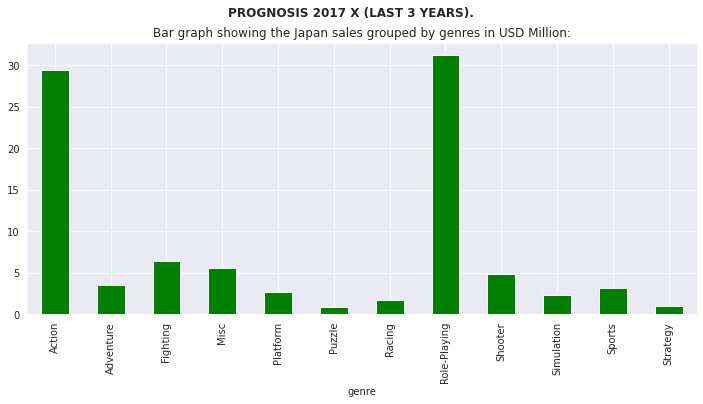

In [115]:
print('Total_sales grouped by genre:')
jp_sales_bar_prog_genres_x = (jp_x.groupby('genre')['jp_sales'].sum())
print('The five most sold generes in Japan:')
print(jp_sales_bar_prog_genres_x.nlargest(5))
print('')
print('Plotting the graph showing the Japan sales grouped by genres in USD Million:')
print('')
plt.figure(figsize=(12,5))
jp_sales_bar_prog_genres_x.plot(kind='bar', color='green')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS).', weight='bold')
plt.title('Bar graph showing the Japan sales grouped by genres in USD Million:')
plt.show()

JAPAN TOTAL SALES GROUPED BY GENRE (LAST 3 YEARS.)

Total_sales grouped by genre:
The five most sold generes in the rest of the world:
genre
Action          22.61
Shooter         21.53
Sports          14.36
Role-Playing     8.64
Misc             4.03
Name: other_sales, dtype: float64

Plotting the graph showing the "rest of the world" sales grouped by genres in USD Million:



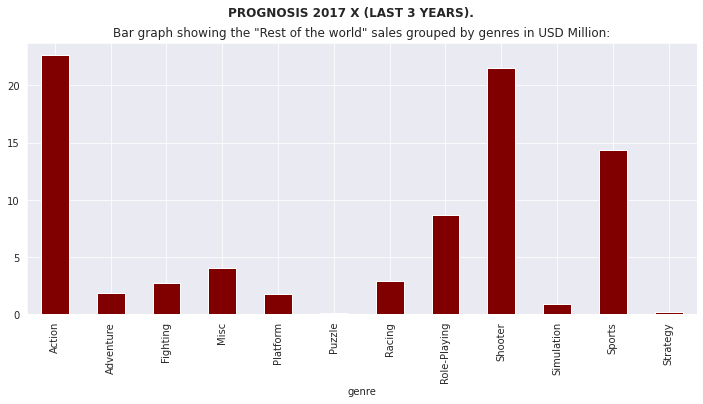

In [116]:
print('Total_sales grouped by genre:')
ot_sales_bar_prog_x = (ot_x.groupby('genre')['other_sales'].sum())
print('The five most sold generes in the rest of the world:')
print(ot_sales_bar_prog_x.nlargest(5))
print('')
print('Plotting the graph showing the "rest of the world" sales grouped by genres in USD Million:')
print('')
plt.figure(figsize=(12,5))
ot_sales_bar_prog_x.plot(kind='bar', color='maroon')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS).', weight='bold')
plt.title('Bar graph showing the "Rest of the world" sales grouped by genres in USD Million:')
plt.show()

REST OF THE WORLD TOTAL SALES GROUPED BY GENRE (LAST 3 YEARS.)

North America sales grouped by ESBR rating.
The five most sold platoforms in North America:
rating
M       104.32
E        50.76
T        40.28
E10+     34.61
RP        0.00
Name: na_sales, dtype: float64



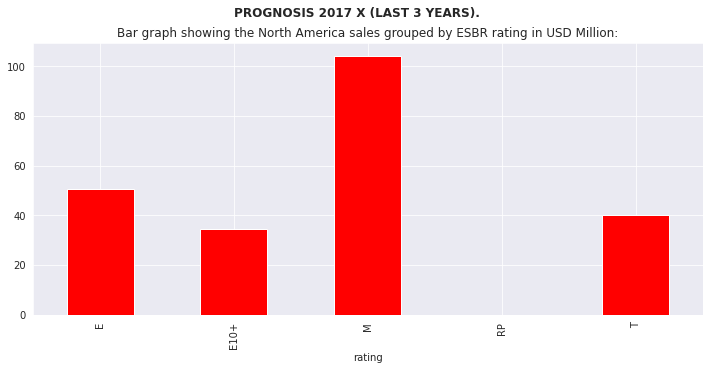

In [117]:
#Do ESRB ratings affect sales in individual regions? (PROGNOSIS 2017 X)
print('North America sales grouped by ESBR rating.')
na_sales_bar_prog_esrb_x = (na_x.groupby('rating')['na_sales'].sum())
print('The five most sold platoforms in North America:')
print(na_sales_bar_prog_esrb_x.nlargest(5))
print('')
plt.figure(figsize=(12,5))
na_sales_bar_prog_esrb_x.plot(kind='bar', color='red')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS).', weight='bold')
plt.title('Bar graph showing the North America sales grouped by ESBR rating in USD Million:')
plt.show()

NORTH AMERICA TOTAL SALES GROUPED BY RATING (LAST 3 YEARS.)

Europa sales grouped by ESRB rating.
The five most sold ESBR ratings in Europe:
rating
M       102.10
E        58.27
T        35.33
E10+     27.57
RP        0.04
Name: eu_sales, dtype: float64

Plotting the graph showing the Europa sales grouped by ESBR rating in USD Million:



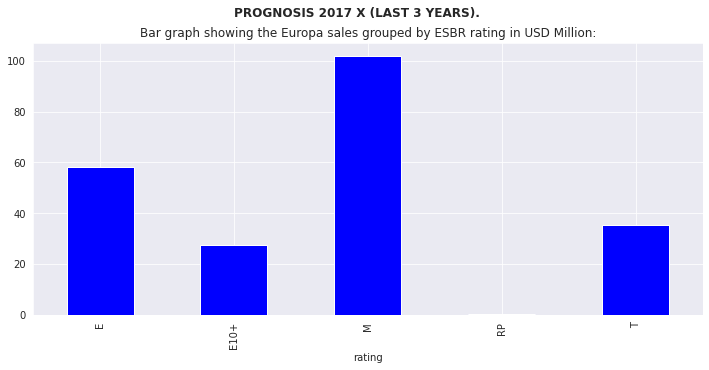

In [118]:
print('Europa sales grouped by ESRB rating.')
eu_sales_bar_esrb_x = (eu_x.groupby('rating')['eu_sales'].sum())
print('The five most sold ESBR ratings in Europe:')
print(eu_sales_bar_esrb_x.nlargest(5))
print('')
print('Plotting the graph showing the Europa sales grouped by ESBR rating in USD Million:')
print('')
plt.figure(figsize=(12,5))
eu_sales_bar_esrb_x.plot(kind='bar', color='blue')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS).', weight='bold')
plt.title('Bar graph showing the Europa sales grouped by ESBR rating in USD Million:')
plt.show()

EUROPA TOTAL SALES GROUPED BY RATING (LAST 3 YEARS.)

Japan sales grouped by ESRB rating.
The five most sold ESBR rating in Japan:
rating
T       16.23
E        8.98
M        8.61
E10+     4.77
RP       0.00
Name: jp_sales, dtype: float64

Plotting the graph showing the Japan sales grouped by ESBR RATING in USD Million:



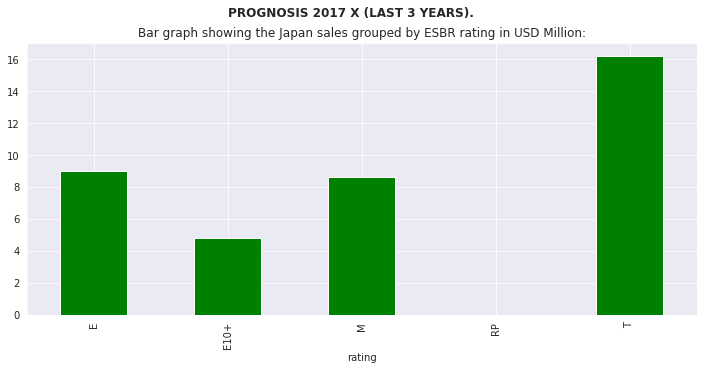

In [119]:
print('Japan sales grouped by ESRB rating.')
jp_sales_bar_esrb_x = (jp_x.groupby('rating')['jp_sales'].sum())
print('The five most sold ESBR rating in Japan:')
print(jp_sales_bar_esrb_x.nlargest(5))
print('')
print('Plotting the graph showing the Japan sales grouped by ESBR RATING in USD Million:')
print('')
plt.figure(figsize=(12,5))
jp_sales_bar_esrb_x.plot(kind='bar', color='green')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS).', weight='bold')
plt.title('Bar graph showing the Japan sales grouped by ESBR rating in USD Million:')
plt.show()

JAPAN TOTAL SALES GROUPED BY RATING (LAST 3 YEARS.)

"Rest of the world" grouped by ESRB rating.
The five most sold ESBR rating in the "Rest of the world":
rating
M       31.50
E       15.41
T       11.76
E10+     8.24
RP       0.00
Name: other_sales, dtype: float64

Plotting the graph showing the "Rest of the world" sales grouped by ESBR RATING in USD Million:



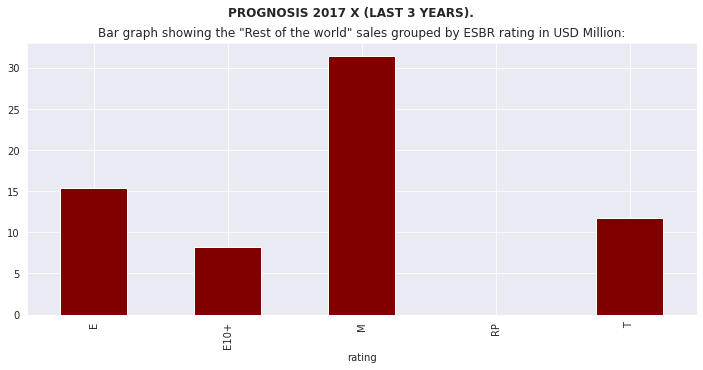

In [120]:
print('"Rest of the world" grouped by ESRB rating.')
ot_sales_bar_esrb_x = (ot_x.groupby('rating')['other_sales'].sum())
print('The five most sold ESBR rating in the "Rest of the world":')
print(ot_sales_bar_esrb_x.nlargest(5))
print('')
print('Plotting the graph showing the "Rest of the world" sales grouped by ESBR RATING in USD Million:')
print('')
plt.figure(figsize=(12,5))
ot_sales_bar_esrb_x.plot(kind='bar', color='maroon')
plt.suptitle('PROGNOSIS 2017 X (LAST 3 YEARS).', weight='bold')
plt.title('Bar graph showing the "Rest of the world" sales grouped by ESBR rating in USD Million:')
plt.show()

REST OF THE WORLD TOTAL SALES GROUPED BY RATING (LAST 3 YEARS.)

# CREATE A USER PROFILE FOR EACH REGIONS. PROGNOSIS 2017 X

CREATED 4 PROFILES FOR DIFFERENT REGIONS (I choose to add in my analysis even the rest of the world [other_sales]).

Results for PLATFORMS TOP 5:

NA =    PS4     81.02
        XOne    69.22
        X360    24.58
        PS3     17.60
        WiiU    15.44
        
EU =    PS4     109.60
        XOne     39.67
        PS3      20.32
        PC       15.06
        X360     13.58
        
JP =    3DS     11.31
        PS4      9.31
        WiiU     5.78
        PS3      5.70
        PSV      5.36
        
OT =    PS4     37.02
        XOne    10.68
        PS3      7.47
        X360     3.80
        WiiU     2.57
        
- It's really easy to notice major differences per area in the world. PS4 leads sales in America, Europe and "Rest of the world" while 3DS does in Japan. XOne is the second for every part of the world except for Japan where is not sold at all.

- It's interesting to notice, comparing the two prognosis done, that XBOX lost his leadership on the North America market in favor of PS.

Results for GENRES TOP 5:

NA =    Action          64.26
        Shooter         60.18
        Sports          45.90
        Role-Playing    23.39
        Misc             8.56
        
EU =    Action          67.38
        Shooter         49.40
        Sports          45.41
        Role-Playing    21.42
        Racing          11.62
        
JP =    Role-Playing    11.98
        Action           9.73
        Shooter          4.17
        Platform         2.55
        Fighting         2.20      
        
OT =    Action          20.23
        Shooter         15.96
        Sports          14.28
        Role-Playing     6.76
        Racing           2.36
        
- About genres, we see that the whole world has the same tastes for genres (Action mostly), except for Japan, where Role-Playing games leads.

- It's interesting to notice, comparing the two prognosis done, that Shooters in the last years are becoming popular even in Japan. (Attesting them self on the 3rd position).

Results for RATINGS TOP 5:

NA =    M       104.20
        E        50.17
        T        40.06
        E10+     34.05
        RP        0.00
        
EU =    M       101.91
        E        57.88
        T        35.07
        E10+     26.90
        RP        0.04
        
JP =    T       15.64
        E        8.98
        M        8.59
        E10+     4.61
        RP       0.00        
        
OT =    M       31.47
        E       15.32
        T       11.69
        E10+     8.10
        RP       0.00
        
- Studying ratings NA, EU and OT leads by Mature and Everyone, while Japan is lead by Teens games. (This because Nintendo is the sales leader in Japan and many Nintendo games are made for teens.

# Step 5. Test the following hypotheses. (PROGNOSIS 2017)

In [121]:
avg_platform = prognosis_2017['user_score'].groupby(prognosis_2017['platform']).mean()
avg_platform = avg_platform.reset_index()
print(avg_platform.query('platform == "PC" or platform == "X360"'))

  platform  user_score
1       PC    6.464844
7     X360    6.332031


In [122]:
prognosis_2017 = prognosis_2017.dropna()

N0 = The two stastical population (PC user_score and X360 user_score) have the same mean.

NA = There's significant difference of mean revenue for the plans.

In [123]:
from scipy import stats as st

N0_prog = prognosis_2017[prognosis_2017['platform'] == 'PC']
NA_prog = prognosis_2017[prognosis_2017['platform'] == 'X360']

alpha = .1                                                
                               
results1 = st.ttest_ind(N0_prog['user_score'], 
                        NA_prog['user_score'],
                          equal_var = False)

print(results1)

pvalue = results1.pvalue / 2

Ttest_indResult(statistic=0.030979485836127564, pvalue=0.9752963498574307)


In [124]:
print('pvalue is :', pvalue)

if (pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

pvalue is : 0.9752963498574307
We can't reject the null hypothesis


In [125]:
avg_platform = prognosis_2017['user_score'].groupby(prognosis_2017['genre']).mean()
avg_platform = avg_platform.reset_index()
print(avg_platform.query('genre == "Action" or genre == "Sports"'))

     genre  user_score
0   Action    6.851562
10  Sports    5.703125


N0 = The two stastical population (Action user_score and Sports user_score) have the same mean.

NA = There's significant difference of mean revenue for the plans.

In [126]:
from scipy import stats as st

N0_prog = prognosis_2017[prognosis_2017['genre'] == 'Action']
NA_prog = prognosis_2017[prognosis_2017['genre'] == 'Sports']

alpha = .1                                                  
                               
results1 = st.ttest_ind(N0_prog['user_score'], 
                        NA_prog['user_score'],
                          equal_var = False)

print(results1)
pvalue= result1.pvalue / 2

Ttest_indResult(statistic=9.977360713648226, pvalue=5.4512011276559645e-21)


In [127]:
print('pvalue is :', pvalue)

if (pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

pvalue is : 5.4512011276559645e-21
We reject the null hypothesis


# TESTING HYPOTESIS. PROGNOSIS 2017

FIRST HYPOTESIS : PC(user_score) and XBOX360(user_score) have the same mean 

PC    6.466667
X360    6.331156

I expect to don't reject the hypotesis.

N0 = The mean is the same 
NA = The mean is different

after calculating the pvalue is : 0.9836668496145793
We can't reject the null hypothesis. Successful.



SECOND HYPOTESIS: Action(user_score) and Sports(user_score) have the same mean.

Action    6.850635
Sports    5.704264

Since one point of difference is more then 0.1 of the scale we are taking in consideration, I expect to reject the hypotesis.

N0= The mean is the same
NA= The mean is different

after calculating the pvalue is : 6.314739877208425e-21
We reject the null hypothesis as expected.


THOUGHS ON CRITICAL VALUE.
My critical value or alpha was defined in 0.1 this because the range of critic score goes from 1 to 10. 0.1 of 10 is 1 point. 
If value differs of one point (on 10) we cannot define the values as similar.

# Step 5. Test the following hypotheses. (PROGNOSIS 2017 X)

In [128]:
avg_platform_x = prognosis_2017_x['user_score'].groupby(prognosis_2017_x['platform']).mean()
avg_platform_x = avg_platform_x.reset_index()
print(avg_platform_x.query('platform == "PC" or platform == "X360"'))

  platform  user_score
1       PC    6.332031
7     X360    5.867188


In [129]:
prognosis_2017_x = prognosis_2017_x.dropna()

N0 = The two stastical population (PC user_score and X360 user_score) have the same mean.

NA = There's significant difference of mean revenue for the plans.

In [130]:
from scipy import stats as st

N0_prog_x = prognosis_2017_x[prognosis_2017_x['platform'] == 'PC']
NA_prog_x = prognosis_2017_x[prognosis_2017_x['platform'] == 'X360']

alpha = .1                                                
                               
results1_x = st.ttest_ind(N0_prog_x['user_score'], 
                        NA_prog_x['user_score'],
                          equal_var = False)

print(results1_x)

pvalue = results1_x.pvalue/2

Ttest_indResult(statistic=1.657519610736345, pvalue=0.09910156144174445)


In [131]:
print('pvalue is :', pvalue)

if (pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

pvalue is : 0.09910156144174445
We reject the null hypothesis


In [132]:
avg_platform_x = prognosis_2017_x['user_score'].groupby(prognosis_2017_x['genre']).mean()
avg_platform_x = avg_platform_x.reset_index()
print(avg_platform_x.query('genre == "Action" or genre == "Sports"'))

     genre  user_score
0   Action    6.847656
10  Sports    5.300781


N0 = The two stastical population (Action user_score and Sports user_score) have the same mean.

NA = There's significant difference of mean revenue for the plans.

In [133]:
from scipy import stats as st

N0_prog_x = prognosis_2017_x[prognosis_2017_x['genre'] == 'Action']
NA_prog_x = prognosis_2017_x[prognosis_2017_x['genre'] == 'Sports']

alpha = .1                                                  
                               
results1_x = st.ttest_ind(N0_prog_x['user_score'], 
                        NA_prog_x['user_score'],
                          equal_var = False)

print(results1_x)

pvalue = results1_x.pvalue / 2

Ttest_indResult(statistic=8.772034604250434, pvalue=8.567877788521523e-16)


In [134]:
print('pvalue is :', pvalue)

if (pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

pvalue is : 8.567877788521523e-16
We reject the null hypothesis


# TESTING HYPOTESIS. PROGNOSIS 2017 X

FIRST HYPOTESIS : PC(user_score) and XBOX360(user_score) have the same mean 

PC    6.292969
X360    5.878906

N0 = The mean is the same 
NA = The mean is different

I expect to reject the hypotesis.

after calculating the pvalue is : 0.9836668496145793
We can't reject the null hypothesis. Successful.



SECOND HYPOTESIS: Action(user_score) and Sports(user_score) have the same mean.

Action    6.847656
Sports    5.300781

N0= The mean is the same
NA= The mean is different

I expect to reject the hypotesis.

after calculating the pvalue is : 6.314739877208425e-21
We reject the null hypothesis as expected.


THOUGHS ON CRITICAL VALUE.
My critical value or alpha was defined in 0.1 this because the range of critic score goes from 1 to 10. 0.1 of 10 is 1 point. 
If value differs of one point (on 10) we cannot define the values as similar.

# GENERAL CONCLUSION.

We had an initial dataset composed by 16715 records and 11 columns. (Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score, Rating). We had to analyze data in order to make a prognosis on the 2017 year.

After studying at general information and re-ording data, replacing missing values (where needed) and changing the datatypes to gain space and time on the execution of the program, I started my analysis of data. 

From this, resulted that before 1994 not really many games were released, after that date, instead, were released thousand of videogames. Till reaching in 2008 and 2009 the max values of count. From 2010 further, the count decreased, this could be caused from the time of videogames productions, that increase because standards for videogames increased a lot as well. To respect those standard and the cost of production, now the industry counts much more on quality videogames instead of the quantity.

Then I looked to the much profitable platforms in the history, finding that DS and PS2 leads the chart.

With the heatmap I was able to find and confirm that the mean period for consoles to grow and fade goes in a range between (6 and 12 years, dependently by how "lucky" the console was).

I started to build my prognosis for 2017 and I decided to make two of them: one considering data from 2011 to 2016 and another from 2014 to 2016 in order to be able to compare even them. 

From PROGNOSIS 2017 (2011/2016) resulted that:

PS3, XBOX360, PC leads the market. But looking at our first prognosis we were already able to understand that PS3 and Xbox 360 were fading in advance of PS4 and XOne.

We understood and confirm that about genres, shooters are becoming always more popular.

From PROGNOSIS 2017 X (2014/2016) resulted that:

PS4, PS Vita, XOne are currently leading the market.

About genres here we confirmed that Shooters games are becoming always more profitable and we were able to discover the great increase they had in last years (expecially for Japan market) where before they were not considered at all.

Another really great discover done, was the lose of market shares of the Xbox in North America, were before it was a leader. Now Playstation rule all the video-games world. (This is really interesting data).

In the end of the project, we tested our hypotesis.

From PROGNOSIS 2017 (2011/2016) resulted that:

PC user_score and X360 user_score had the same mean and we don't rejected our hypotesis.

Action user_score and Sports user_score didn't had the same mean and we rejected the hypotesis.

From PROGNOSIS 2017 X (2014/2016) resulted that:

PC user_score and X360 user_score didn't had the same mean and we rejected our hypotesis.

Action user_score and Sports user_score didn't had the same mean and we rejected the hypotesis.